## Plotting ERA5 Data

In [2]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# Open the NetCDF file
ds = xr.open_dataset('/home/pcuser/hef/era5_data/a75b0cf7dd4e88d2dd2e966e05a762d7/data_1.nc')  # Replace with your NetCDF file path


# Inspect the available variables in the dataset
print(ds)

# Assume 'tp' is the total precipitation variable and 'time' is the time variable
tp = ds['tp']  # Replace 'tp' if your variable has a different name
time = ds['valid_time']

# Specify the known grid point coordinates
lat_target = 46.8  # Latitude of the point you want
lon_target = 10.8  # Longitude of the point you want

# Get the latitudes and longitudes as numpy arrays
lat = ds['latitude'].values  # or ds['lat'] depending on your dataset
lon = ds['longitude'].values  # or ds['lon'] depending on your dataset

# Find the indices for the specified grid point (exact match)
lat_idx = (lat == lat_target).argmax()  # Find the index for the exact latitude
lon_idx = (lon == lon_target).argmax()  # Find the index for the exact longitude

# Extract data for the specified grid point (using the indices)
tp_data = tp[:, lat_idx, lon_idx].values  # Time x grid point (lat, lon)
time_data = time.values  # Time values

# Convert to pandas DataFrame for easier handling
df = pd.DataFrame({'time': time_data, 'tp': tp_data})
df['time'] = pd.to_datetime(df['time'])  # Ensure datetime format
df.set_index('time', inplace=True)  # Set as index

# Display the DataFrame
print(df)

<xarray.Dataset> Size: 53kB
Dimensions:     (valid_time: 878, latitude: 3, longitude: 3)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 7kB 1952-01-01T06:00:00 ... 2025-...
  * latitude    (latitude) float64 24B 47.0 46.75 46.5
  * longitude   (longitude) float64 24B 10.5 10.75 11.0
    expver      (valid_time) <U4 14kB ...
Data variables:
    tp          (valid_time, latitude, longitude) float32 32kB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
                           tp
time                         
1952-01-01 06:00:00  0.003281
1952-02-01 06:00:00  0.003853
1952-03-01 06:00:00  0.004408
1952-04-01 06:00:00  0.001707
1952-05-01 06:00:00  0.002251
...                       ...
2024-10-01 06:00:00  0.004002
2024-11-0

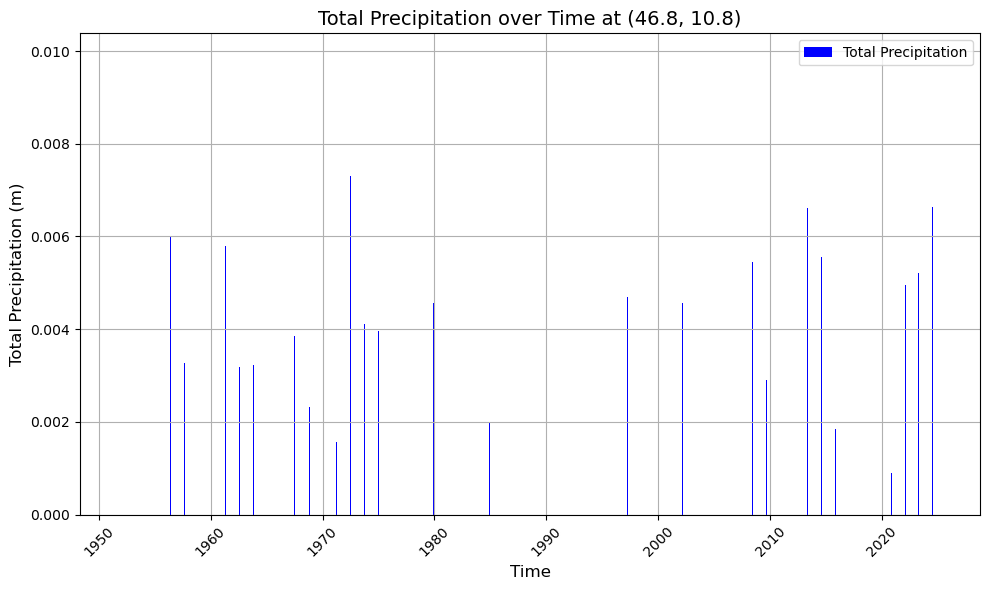

In [10]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(df['time'], df['tp'], label='Total Precipitation', color='b')
plt.title('Total Precipitation over Time at (46.8, 10.8)', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Total Precipitation (m)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

## I could add up to look at yearly precip.
What is yearly......
I should also look at Rainers suggestion - Late spring precip?? Add precip from March - June
Then plot a scatter plot eachother and find an R value.



                        tp_mm
time                         
1952-01-01 06:00:00  3.280640
1952-02-01 06:00:00  3.852844
1952-03-01 06:00:00  4.407883
1952-04-01 06:00:00  1.707077
1952-05-01 06:00:00  2.250671
                tp_mm
time                 
1952-12-31  47.470093
1953-12-31  32.042503
1954-12-31  48.169136
1955-12-31  41.004181
1956-12-31  43.169975


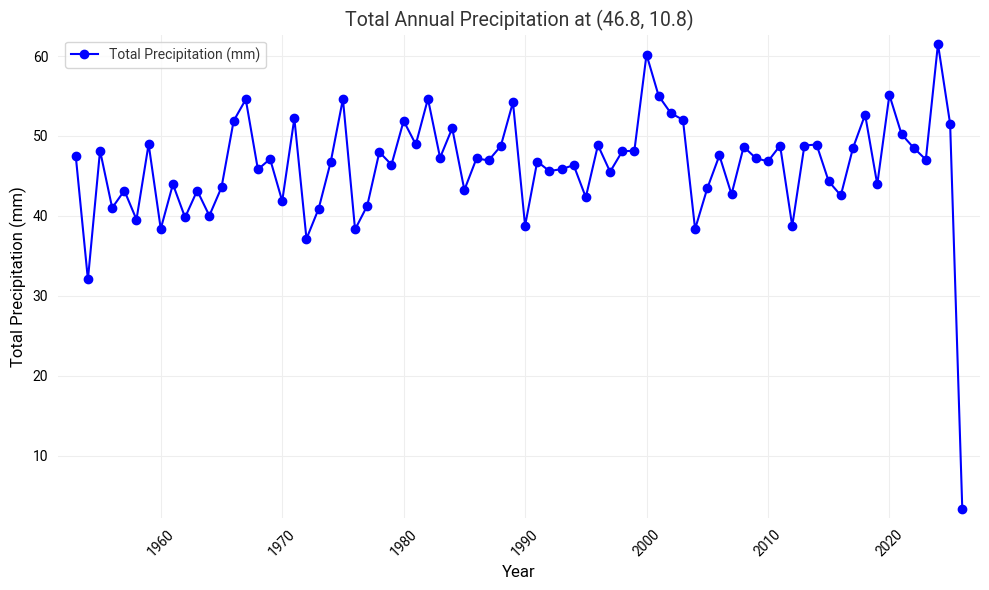

In [6]:
##Making sure this looks like the data from ERA explorer

import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# Open the NetCDF file
ds = xr.open_dataset('/home/pcuser/hef/era5_data/a75b0cf7dd4e88d2dd2e966e05a762d7/data_1.nc')

# Extract precipitation and time
tp = ds['tp']
time = ds['valid_time']

# Specify grid point
lat_target = 46.8
lon_target = 10.8
lat_idx = (ds['latitude'].values == lat_target).argmax()
lon_idx = (ds['longitude'].values == lon_target).argmax()
tp_data = tp[:, lat_idx, lon_idx].values
time_data = time.values

# Convert precipitation to mm
tp_data_mm = tp_data * 1000

# Create DataFrame **only once**
df = pd.DataFrame({'time': time_data, 'tp_mm': tp_data_mm})
df['time'] = pd.to_datetime(df['time'])  # Ensure datetime format
df.set_index('time', inplace=True)  # Set time as index

print(df.head())

# Resample for **hydrological year (Sep–Aug)**
df_annual = df.resample('YE').sum()
print(df_annual.head())

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_annual.index, df_annual['tp_mm'], marker='o', linestyle='-', label='Total Precipitation (mm)', color='b')
plt.title('Total Annual Precipitation at (46.8, 10.8)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Precipitation (mm)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


/tmp/ipykernel_71/2854183780.py:29: FutureWarning: 'A-AUG' is deprecated and will be removed in a future version, please use 'YE-AUG' instead.
  df_annual = df.resample('A-AUG').sum()


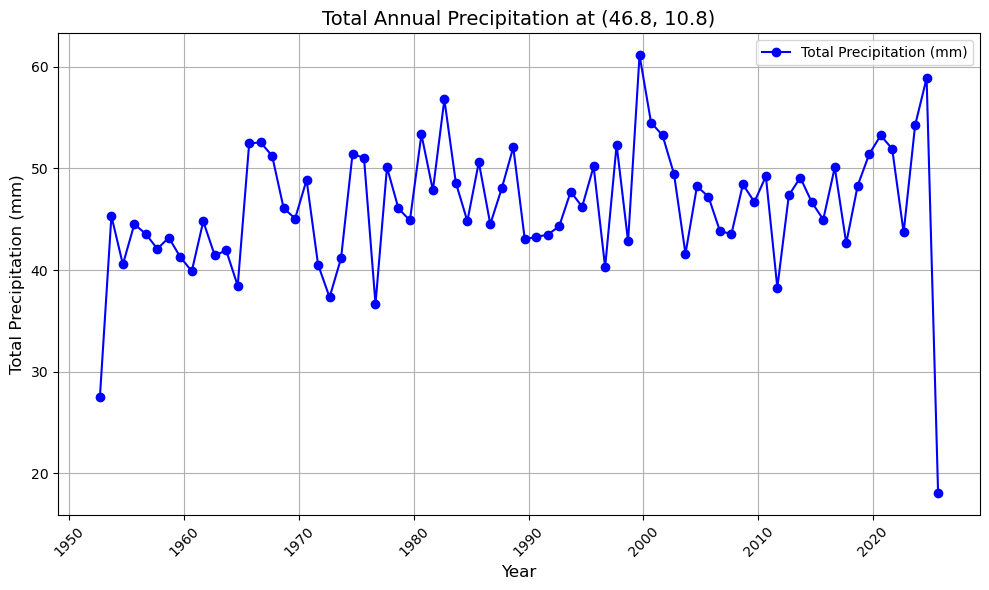

In [37]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# Open the NetCDF file
ds = xr.open_dataset('/home/pcuser/hef/era5_data/a75b0cf7dd4e88d2dd2e966e05a762d7/data_1.nc')

# Extract precipitation and time
tp = ds['tp']
time = ds['valid_time']

# Specify grid point
lat_target = 46.8
lon_target = 10.8
lat_idx = (ds['latitude'].values == lat_target).argmax()
lon_idx = (ds['longitude'].values == lon_target).argmax()
tp_data = tp[:, lat_idx, lon_idx].values
time_data = time.values

# Convert precipitation to mm
tp_data_mm = tp_data * 1000

# Create DataFrame **only once**
df = pd.DataFrame({'time': time_data, 'tp_mm': tp_data_mm})
df['time'] = pd.to_datetime(df['time'])  # Ensure datetime format
df.set_index('time', inplace=True)  # Set time as index

# Resample for **hydrological year (Sep–Aug)**
df_annual = df.resample('A-AUG').sum()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_annual.index, df_annual['tp_mm'], marker='o', linestyle='-', label='Total Precipitation (mm)', color='b')
plt.title('Total Annual Precipitation at (46.8, 10.8)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Precipitation (mm)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## This will surely be underdone doesn't seem high enough.
Hydrological year - should I use Sep 1 or October 1? and 2023/2024 is the 2024 calendar year


                        tp_mm  calendar_year
time                                        
1952-01-01 06:00:00  3.280640           1952
1952-02-01 06:00:00  3.852844           1952
1952-03-01 06:00:00  4.407883           1952
1952-04-01 06:00:00  1.707077           1952
1952-05-01 06:00:00  2.250671           1952
...                       ...            ...
2024-10-01 06:00:00  4.001617           2025
2024-11-01 06:00:00  1.742363           2025
2024-12-01 06:00:00  2.933502           2025
2025-01-01 06:00:00  2.578735           2025
2025-02-01 06:00:00  0.799179           2025

[878 rows x 2 columns]
                tp_mm  calendar_year
time                                
1952-09-01  45.307159         1953.0
1953-09-01  40.555000         1954.0
1954-09-01  44.517517         1955.0
1955-09-01  43.534279         1956.0
1956-09-01  42.084694         1957.0
...               ...            ...
2020-09-01  51.921844         2021.0
2021-09-01  43.693542         2022.0
2022-09-01  54.233551

/tmp/ipykernel_1777/11313401.py:43: FutureWarning: 'AS-SEP' is deprecated and will be removed in a future version, please use 'YS-SEP' instead.
  df_hydrological = df['1952-09-01':].resample('AS-SEP').agg({


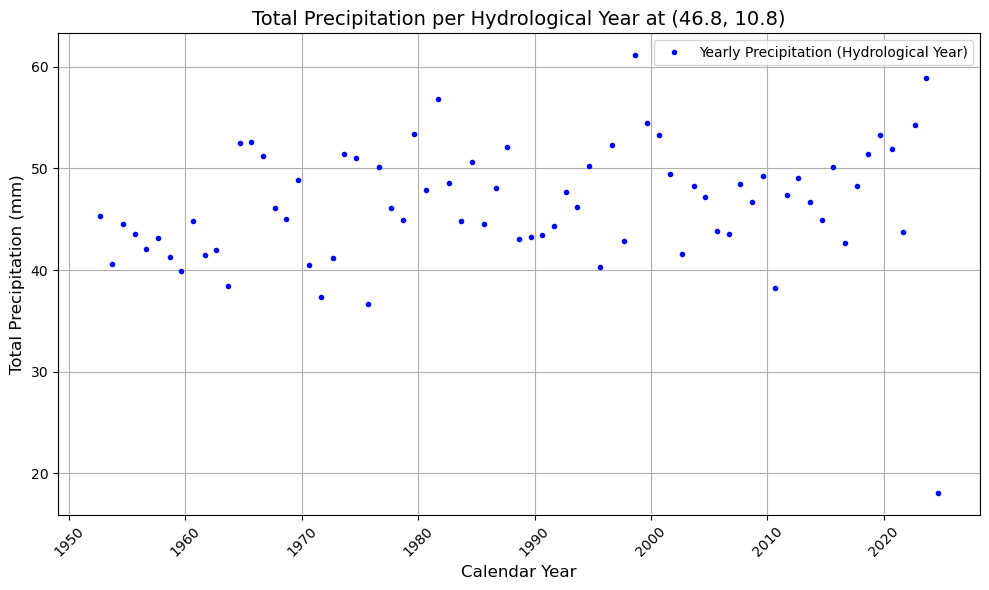

In [57]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# Open the NetCDF file
ds = xr.open_dataset('/home/pcuser/hef/era5_data/a75b0cf7dd4e88d2dd2e966e05a762d7/data_1.nc')  # Replace with your NetCDF file path

# Get the latitude and longitude values (using exact match for 46.8, 10.8)
lat_target = 46.8
lon_target = 10.8

# Get the latitudes and longitudes as numpy arrays
lat = ds['latitude'].values
lon = ds['longitude'].values

# Find the indices for the exact match
lat_idx = (lat == lat_target).argmax()  # Find the index for the exact latitude
lon_idx = (lon == lon_target).argmax()  # Find the index for the exact longitude

# Extract the time and precipitation (tp) data for the specified grid point
time_data = ds['valid_time'].values
tp_data = ds['tp'][:, lat_idx, lon_idx].values

# Convert the time data to pandas datetime format (if necessary)
time_data = pd.to_datetime(time_data)

# Convert total precipitation from meters to millimeters
tp_data_mm = tp_data * 1000  # Convert meters to millimeters

# Create a pandas DataFrame for easier handling
df = pd.DataFrame({'time': time_data, 'tp_mm': tp_data_mm})

# Set the time as the index
df.set_index('time', inplace=True)

# If you need to create a 'hydrological_year' column, make sure it's there
df['calendar_year'] = df.index.year + (df.index.month >= 9)


print(df)

# Now, you can use resample with the 'AS-SEP' frequency to group by hydrological years
df_hydrological = df['1952-09-01':].resample('AS-SEP').agg({
    'tp_mm': 'sum',  # Sum precipitation for the hydrological year
    'calendar_year': 'mean'  # This will just return the year value (doesn't change much)
})

print(df_hydrological)


# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df_hydrological.index, df_hydrological['tp_mm'], '.', label='Yearly Precipitation (Hydrological Year)', color='b')
plt.title('Total Precipitation per Hydrological Year at (46.8, 10.8)', fontsize=14)
plt.xlabel('Calendar Year', fontsize=12)
plt.ylabel('Total Precipitation (mm)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

## Spring precip

/tmp/ipykernel_1777/407556580.py:43: FutureWarning: 'AS-SEP' is deprecated and will be removed in a future version, please use 'YS-SEP' instead.
  df_spring_precip = df_march_june['1952-09-01':].resample('AS-SEP').agg({


                tp_mm  calendar_year
time                                
1952-09-01  11.831284         1953.0
1953-09-01  15.554428         1954.0
1954-09-01  12.605667         1955.0
1955-09-01  17.619133         1956.0
1956-09-01  11.845589         1957.0
...               ...            ...
2019-09-01  16.706467         2020.0
2020-09-01  15.217781         2021.0
2021-09-01  14.548302         2022.0
2022-09-01  21.258354         2023.0
2023-09-01  20.429611         2024.0

[72 rows x 2 columns]


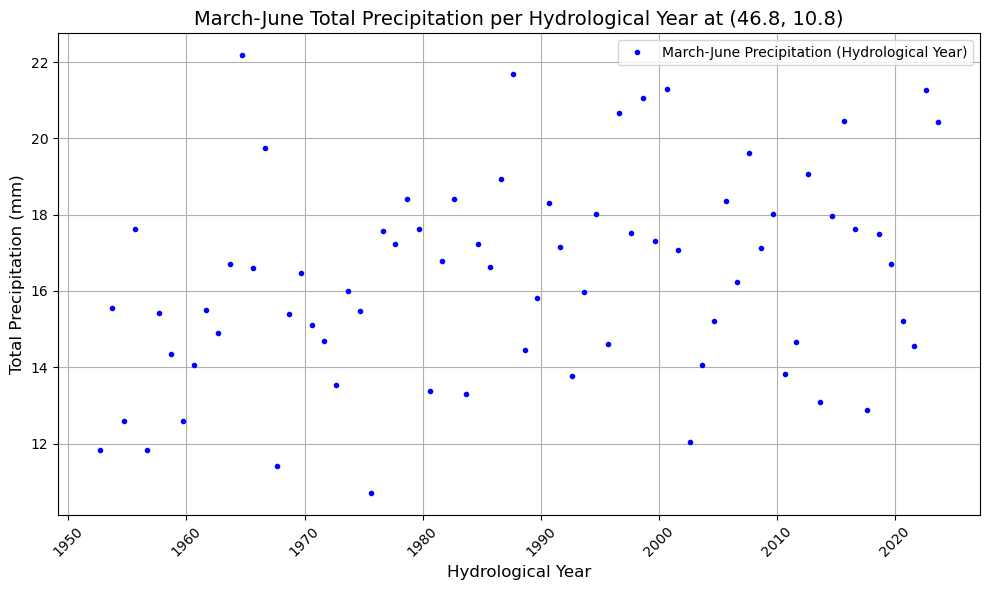

In [60]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# Open the NetCDF file
ds = xr.open_dataset('/home/pcuser/hef/era5_data/a75b0cf7dd4e88d2dd2e966e05a762d7/data_1.nc')  # Replace with your NetCDF file path

# Get the latitude and longitude values (using exact match for 46.8, 10.8)
lat_target = 46.8
lon_target = 10.8

# Get the latitudes and longitudes as numpy arrays
lat = ds['latitude'].values
lon = ds['longitude'].values

# Find the indices for the exact match
lat_idx = (lat == lat_target).argmax()  # Find the index for the exact latitude
lon_idx = (lon == lon_target).argmax()  # Find the index for the exact longitude

# Extract the time and precipitation (tp) data for the specified grid point
time_data = ds['valid_time'].values
tp_data = ds['tp'][:, lat_idx, lon_idx].values

# Convert the time data to pandas datetime format (if necessary)
time_data = pd.to_datetime(time_data)

# Convert total precipitation from meters to millimeters
tp_data_mm = tp_data * 1000  # Convert meters to millimeters

# Create a pandas DataFrame for easier handling
df = pd.DataFrame({'time': time_data, 'tp_mm': tp_data_mm})

# Set the time as the index
df.set_index('time', inplace=True)

# Define hydrological year
df['calendar_year'] = df.index.year + (df.index.month >= 9)

# Filter for March-June precipitation
df_march_june = df[df.index.month.isin([3, 4, 5, 6])]

# Resample by hydrological year
df_spring_precip = df_march_june['1952-09-01':].resample('AS-SEP').agg({
    'tp_mm': 'sum',  # Sum precipitation for March-June
    'calendar_year': 'mean'  # Ensure correct hydrological year labeling
})

print(df_spring_precip)

# Plot the March-June precipitation totals for each hydrological year
plt.figure(figsize=(10, 6))
plt.plot(df_spring_precip.index, df_spring_precip['tp_mm'], '.', label='March-June Precipitation (Hydrological Year)', color='b')
plt.title('March-June Total Precipitation per Hydrological Year at (46.8, 10.8)', fontsize=14)
plt.xlabel('Hydrological Year', fontsize=12)
plt.ylabel('Total Precipitation (mm)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

In [64]:
df_hef_MB = pd.read_pickle("hef_MB.pkl")

print(df_hef_MB.head())
print(df_spring_precip.head())


# Merge on the hydrological year
df_merged = pd.merge(df_hef_MB, df_spring_precip, on="calendar_year", how="inner")


  hydrological year  calendar_year  mean specific mass balance  \
0         1953/1954           1954                        -286   
1         1954/1955           1955                          76   
2         1955/1956           1956                        -275   
3         1956/1957           1957                        -189   
4         1957/1958           1958                        -981   

  climatic mass balance  winter mass balance winter mass balance B06  \
0                   NaN                  NaN                     NaN   
1                   NaN                  NaN                     NaN   
2                   NaN                  NaN                     NaN   
3                   NaN                  NaN                     NaN   
4                   NaN                  NaN                     NaN   

  comment B06  winter mass balance K99  
0         NaN                    392.0  
1         NaN                    657.0  
2         NaN                    498.0  
3     

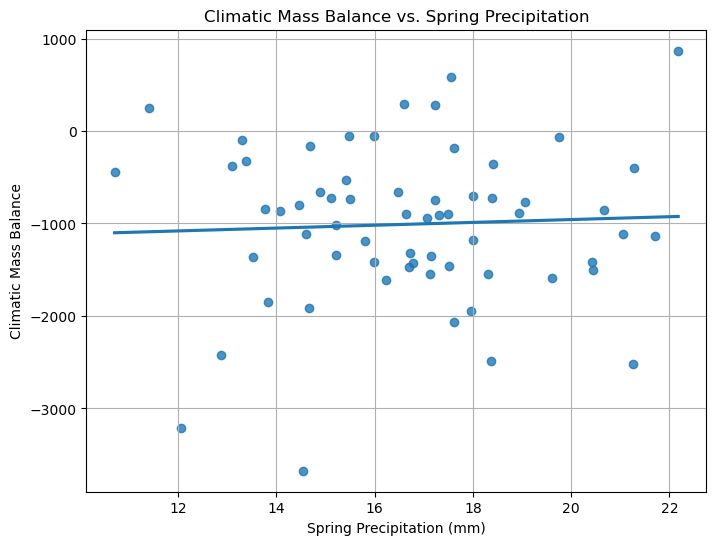

Correlation coefficient: 0.047


In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(8, 6))
sns.regplot(x=df_merged["tp_mm"], y=df_merged["climatic mass balance"], ci=None)  # ci=None removes confidence interval
plt.xlabel("Spring Precipitation (mm)")
plt.ylabel("Climatic Mass Balance")
plt.title("Climatic Mass Balance vs. Spring Precipitation")
plt.grid(True)
plt.show()

# Calculate correlation
correlation = df_merged["tp_mm"].corr(df_merged["climatic mass balance"])
print(f"Correlation coefficient: {correlation:.3f}")


Okay not much of a correlation
What about LATE spring... May/June?


  hydrological year  calendar_year  mean specific mass balance  \
0         1953/1954           1954                        -286   
1         1954/1955           1955                          76   
2         1955/1956           1956                        -275   
3         1956/1957           1957                        -189   
4         1957/1958           1958                        -981   

  climatic mass balance  winter mass balance winter mass balance B06  \
0                   NaN                  NaN                     NaN   
1                   NaN                  NaN                     NaN   
2                   NaN                  NaN                     NaN   
3                   NaN                  NaN                     NaN   
4                   NaN                  NaN                     NaN   

  comment B06  winter mass balance K99  
0         NaN                    392.0  
1         NaN                    657.0  
2         NaN                    498.0  
3     

/tmp/ipykernel_1777/2606853150.py:43: FutureWarning: 'AS-SEP' is deprecated and will be removed in a future version, please use 'YS-SEP' instead.
  df_may_precip = df_may['1952-09-01':].resample('AS-SEP').agg({


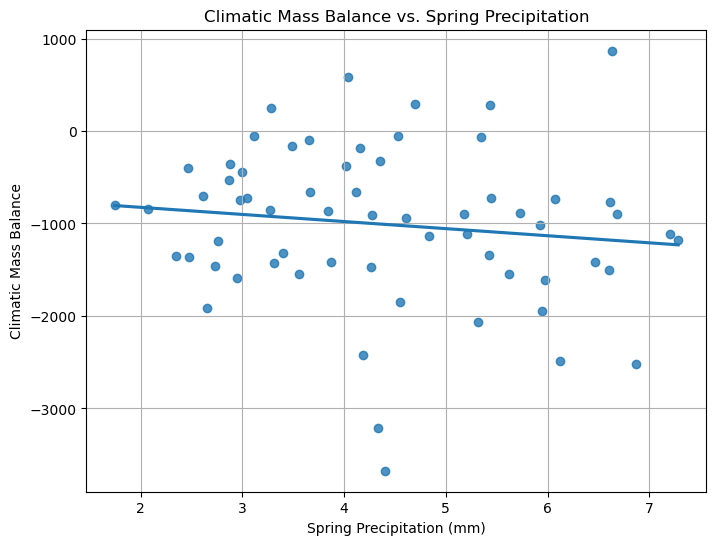

Correlation coefficient: -0.131


In [68]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# Open the NetCDF file
ds = xr.open_dataset('/home/pcuser/hef/era5_data/a75b0cf7dd4e88d2dd2e966e05a762d7/data_1.nc')  # Replace with your NetCDF file path

# Get the latitude and longitude values (using exact match for 46.8, 10.8)
lat_target = 46.8
lon_target = 10.8

# Get the latitudes and longitudes as numpy arrays
lat = ds['latitude'].values
lon = ds['longitude'].values

# Find the indices for the exact match
lat_idx = (lat == lat_target).argmax()  # Find the index for the exact latitude
lon_idx = (lon == lon_target).argmax()  # Find the index for the exact longitude

# Extract the time and precipitation (tp) data for the specified grid point
time_data = ds['valid_time'].values
tp_data = ds['tp'][:, lat_idx, lon_idx].values

# Convert the time data to pandas datetime format (if necessary)
time_data = pd.to_datetime(time_data)

# Convert total precipitation from meters to millimeters
tp_data_mm = tp_data * 1000  # Convert meters to millimeters

# Create a pandas DataFrame for easier handling
df = pd.DataFrame({'time': time_data, 'tp_mm': tp_data_mm})

# Set the time as the index
df.set_index('time', inplace=True)

# Define hydrological year
df['calendar_year'] = df.index.year + (df.index.month >= 9)

# Filter for March-June precipitation
df_may = df[df.index.month.isin([5])]

# Resample by hydrological year
df_may_precip = df_may['1952-09-01':].resample('AS-SEP').agg({
    'tp_mm': 'sum',  # Sum precipitation for March-June
    'calendar_year': 'mean'  # Ensure correct hydrological year labeling
})


df_hef_MB = pd.read_pickle("hef_MB.pkl")

print(df_hef_MB.head())
print(df_may_precip.head())


# Merge on the hydrological year
df_merged = pd.merge(df_hef_MB, df_may, on="calendar_year", how="inner")

# Scatter plot
plt.figure(figsize=(8, 6))
sns.regplot(x=df_merged["tp_mm"], y=df_merged["climatic mass balance"], ci=None)  # ci=None removes confidence interval
plt.xlabel("Spring Precipitation (mm)")
plt.ylabel("Climatic Mass Balance")
plt.title("Climatic Mass Balance vs. Spring Precipitation")
plt.grid(True)
plt.show()

# Calculate correlation
correlation = df_merged["tp_mm"].corr(df_merged["climatic mass balance"])
print(f"Correlation coefficient: {correlation:.3f}")


## Not really a correlation... I am going to iterate through each month and make plots... perhaps I should look to HISTALP or a weather station at this point? 

/tmp/ipykernel_1777/3379610790.py:41: FutureWarning: 'AS-SEP' is deprecated and will be removed in a future version, please use 'YS-SEP' instead.
  df_month_precip = df_month.resample('AS-SEP').agg({


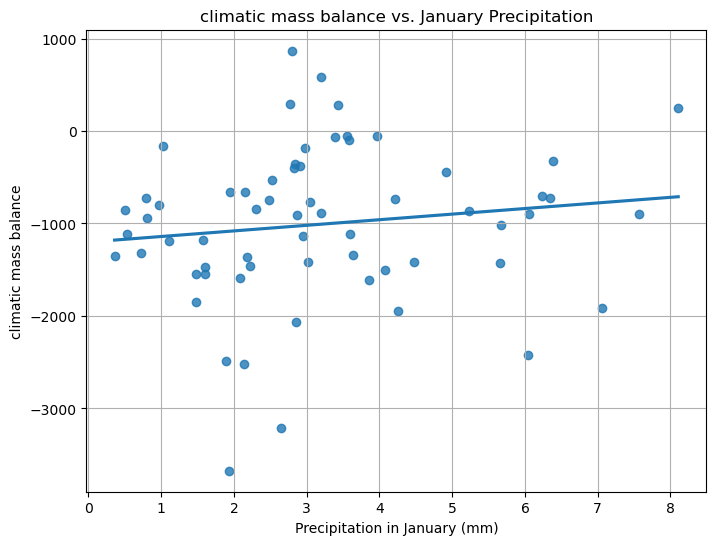

/tmp/ipykernel_1777/3379610790.py:41: FutureWarning: 'AS-SEP' is deprecated and will be removed in a future version, please use 'YS-SEP' instead.
  df_month_precip = df_month.resample('AS-SEP').agg({


Correlation between climatic mass balance and January precipitation: 0.132


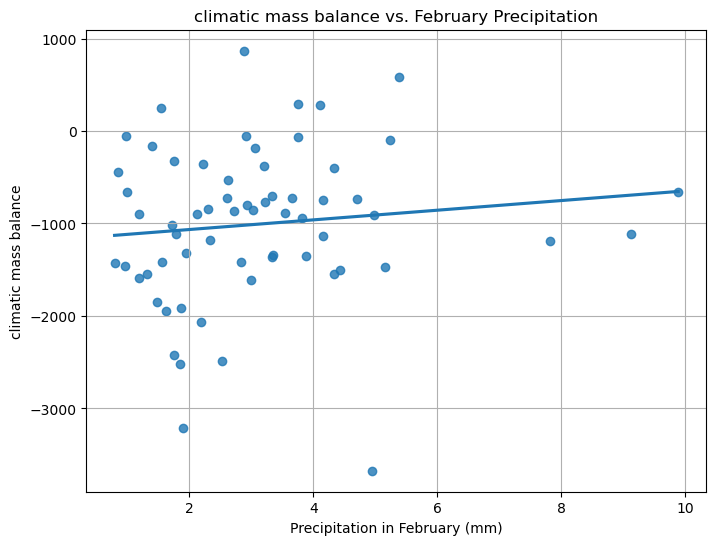

Correlation between climatic mass balance and February precipitation: 0.112


/tmp/ipykernel_1777/3379610790.py:41: FutureWarning: 'AS-SEP' is deprecated and will be removed in a future version, please use 'YS-SEP' instead.
  df_month_precip = df_month.resample('AS-SEP').agg({


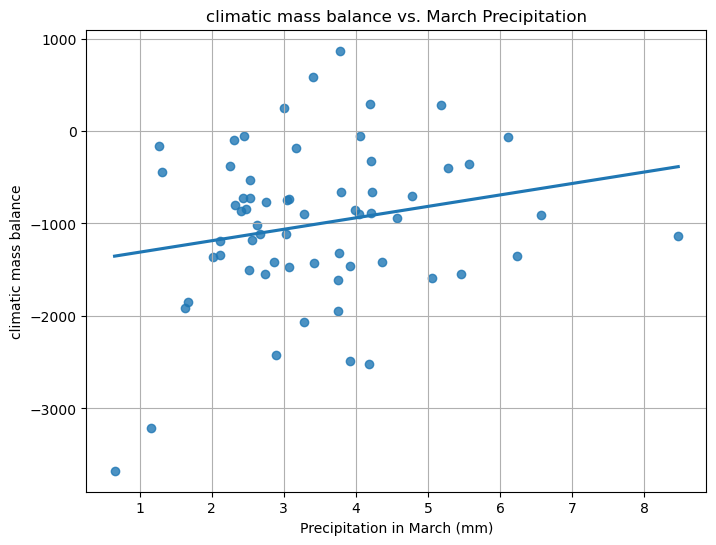

Correlation between climatic mass balance and March precipitation: 0.209


/tmp/ipykernel_1777/3379610790.py:41: FutureWarning: 'AS-SEP' is deprecated and will be removed in a future version, please use 'YS-SEP' instead.
  df_month_precip = df_month.resample('AS-SEP').agg({


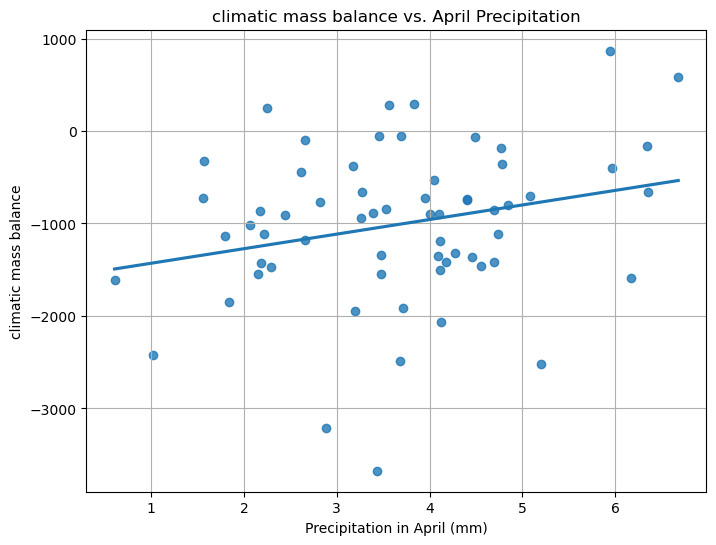

Correlation between climatic mass balance and April precipitation: 0.251


/tmp/ipykernel_1777/3379610790.py:41: FutureWarning: 'AS-SEP' is deprecated and will be removed in a future version, please use 'YS-SEP' instead.
  df_month_precip = df_month.resample('AS-SEP').agg({


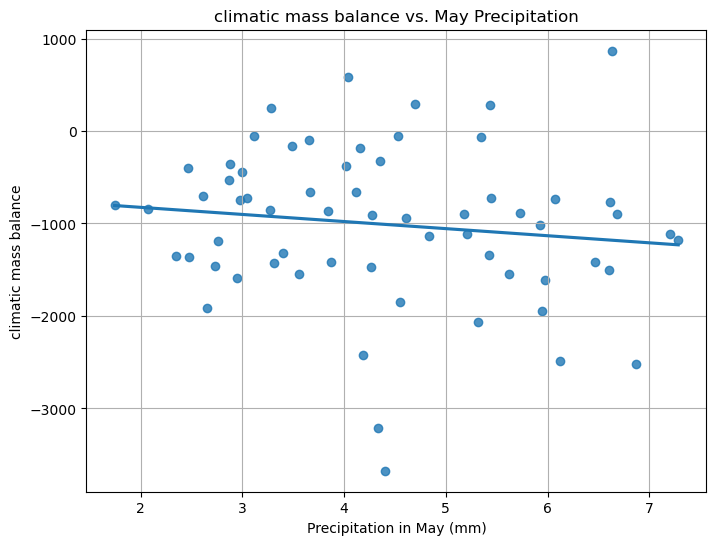

Correlation between climatic mass balance and May precipitation: -0.131


/tmp/ipykernel_1777/3379610790.py:41: FutureWarning: 'AS-SEP' is deprecated and will be removed in a future version, please use 'YS-SEP' instead.
  df_month_precip = df_month.resample('AS-SEP').agg({


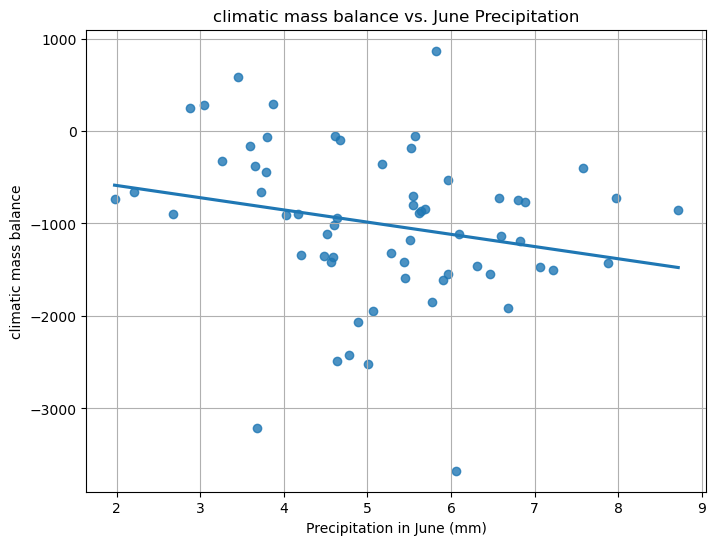

Correlation between climatic mass balance and June precipitation: -0.225


/tmp/ipykernel_1777/3379610790.py:41: FutureWarning: 'AS-SEP' is deprecated and will be removed in a future version, please use 'YS-SEP' instead.
  df_month_precip = df_month.resample('AS-SEP').agg({


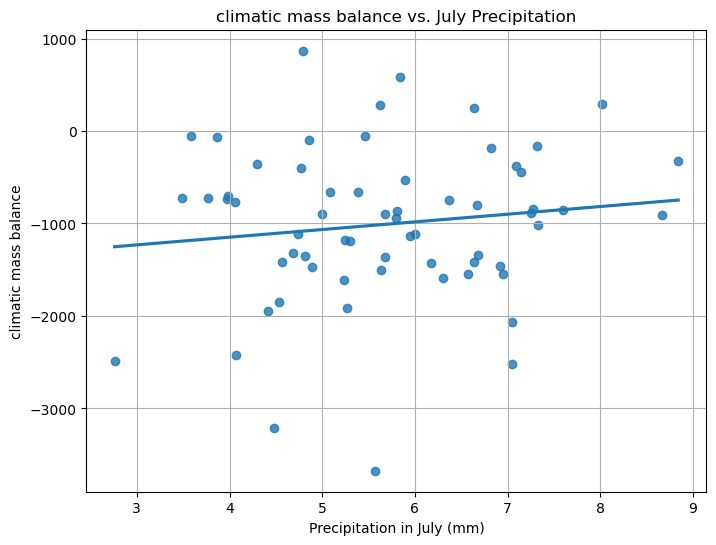

Correlation between climatic mass balance and July precipitation: 0.129


/tmp/ipykernel_1777/3379610790.py:41: FutureWarning: 'AS-SEP' is deprecated and will be removed in a future version, please use 'YS-SEP' instead.
  df_month_precip = df_month.resample('AS-SEP').agg({


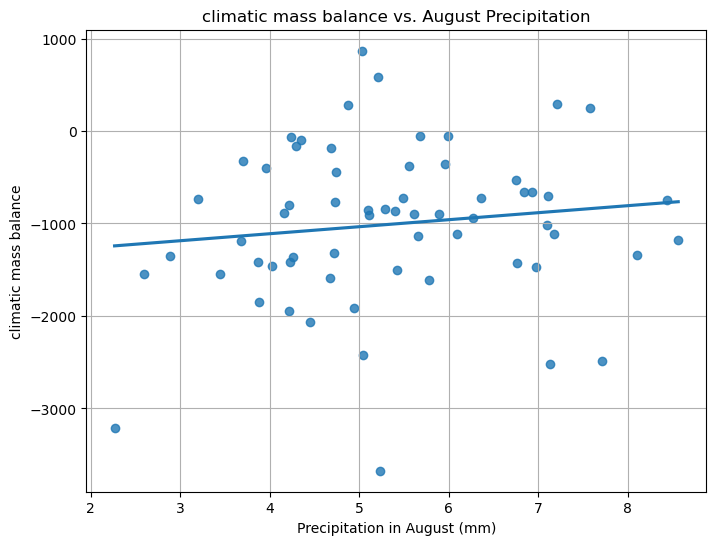

Correlation between climatic mass balance and August precipitation: 0.129


/tmp/ipykernel_1777/3379610790.py:41: FutureWarning: 'AS-SEP' is deprecated and will be removed in a future version, please use 'YS-SEP' instead.
  df_month_precip = df_month.resample('AS-SEP').agg({


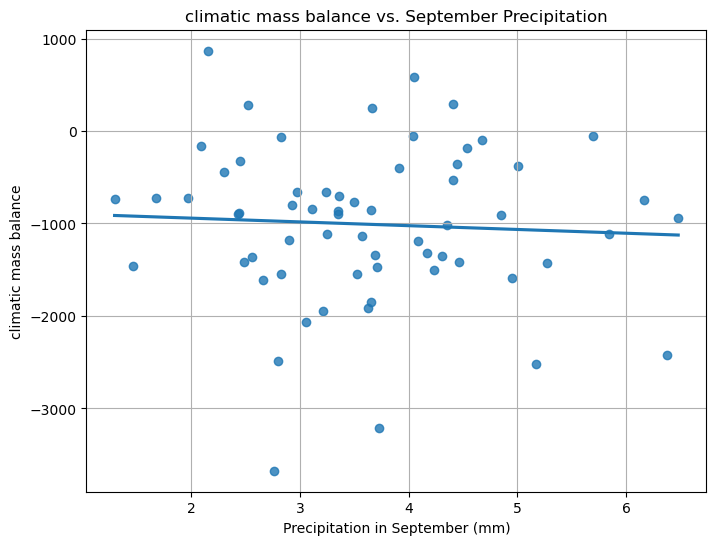

Correlation between climatic mass balance and September precipitation: -0.057


/tmp/ipykernel_1777/3379610790.py:41: FutureWarning: 'AS-SEP' is deprecated and will be removed in a future version, please use 'YS-SEP' instead.
  df_month_precip = df_month.resample('AS-SEP').agg({


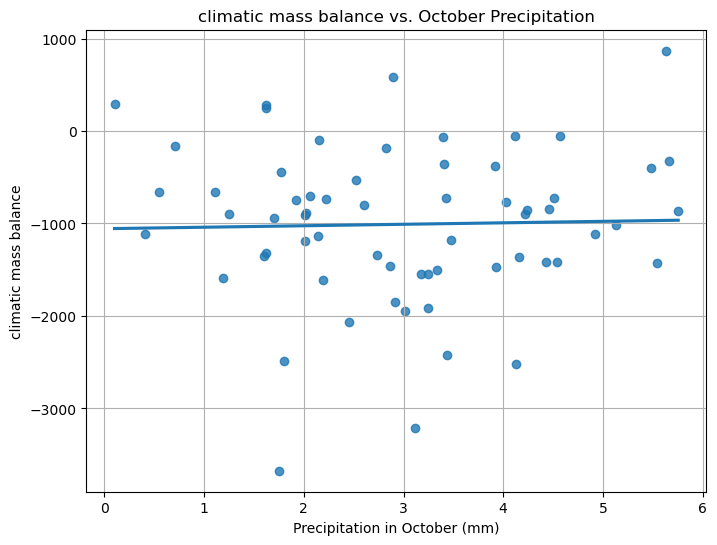

Correlation between climatic mass balance and October precipitation: 0.027


/tmp/ipykernel_1777/3379610790.py:41: FutureWarning: 'AS-SEP' is deprecated and will be removed in a future version, please use 'YS-SEP' instead.
  df_month_precip = df_month.resample('AS-SEP').agg({


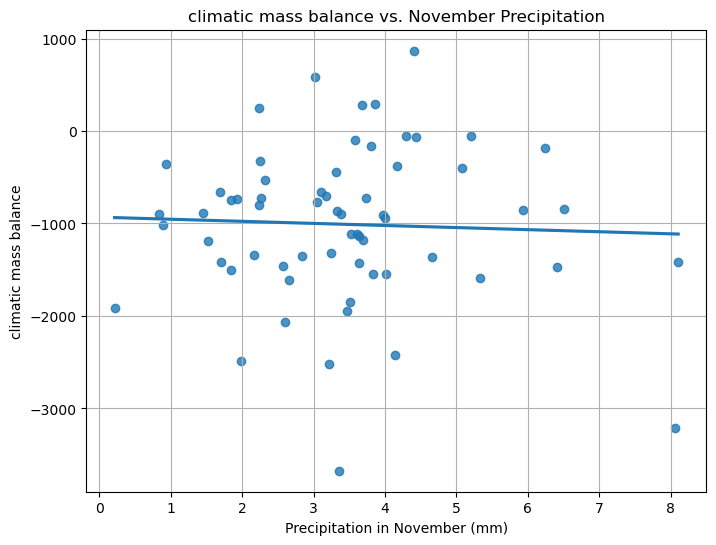

Correlation between climatic mass balance and November precipitation: -0.043


/tmp/ipykernel_1777/3379610790.py:41: FutureWarning: 'AS-SEP' is deprecated and will be removed in a future version, please use 'YS-SEP' instead.
  df_month_precip = df_month.resample('AS-SEP').agg({


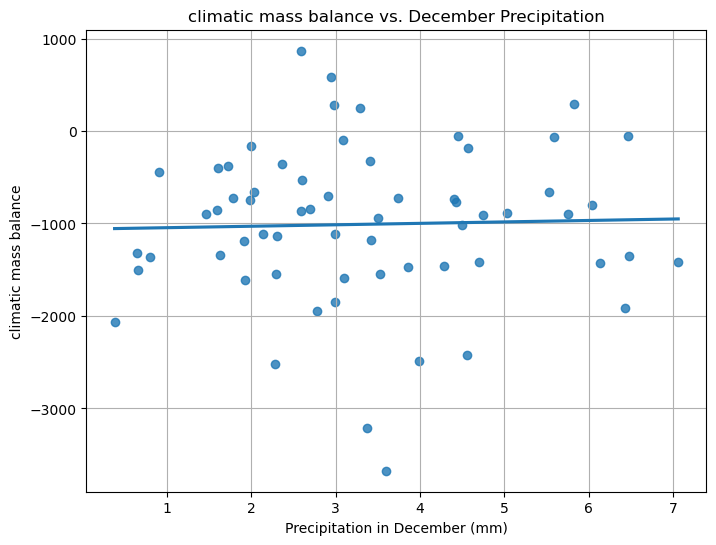

Correlation between climatic mass balance and December precipitation: 0.031


In [72]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Open the NetCDF file
ds = xr.open_dataset('/home/pcuser/hef/era5_data/a75b0cf7dd4e88d2dd2e966e05a762d7/data_1.nc')  # Update file path

# Target latitude and longitude
lat_target = 46.8
lon_target = 10.8

# Get the latitudes and longitudes as numpy arrays
lat = ds['latitude'].values
lon = ds['longitude'].values

# Find the exact index for the specified location
lat_idx = (lat == lat_target).argmax()
lon_idx = (lon == lon_target).argmax()

# Extract time and precipitation data
time_data = pd.to_datetime(ds['valid_time'].values)
tp_data_mm = ds['tp'][:, lat_idx, lon_idx].values * 1000  # Convert meters to mm

# Create a DataFrame
df = pd.DataFrame({'time': time_data, 'tp_mm': tp_data_mm})
df.set_index('time', inplace=True)

# Define hydrological year
df['calendar_year'] = df.index.year + (df.index.month >= 9)

# Load mass balance data
df_hef_MB = pd.read_pickle("hef_MB.pkl")

# Iterate over each month and create a scatter plot
for month in range(1, 13):
    # Filter precipitation data for the given month
    df_month = df[df.index.month == month]
    
    # Resample by hydrological year and sum precipitation for that month
    df_month_precip = df_month.resample('AS-SEP').agg({
        'tp_mm': 'sum',
        'calendar_year': 'mean'
    })

    # Merge with mass balance data
    df_merged = pd.merge(df_hef_MB, df_month_precip, on="calendar_year", how="inner")

    # Create scatter plots for different mass balance components
    for balance_type in ["climatic mass balance", "winter balance", "summer balance"]:  # Adjust column names as needed
        if balance_type in df_merged.columns:
            plt.figure(figsize=(8, 6))
            sns.regplot(x=df_merged["tp_mm"], y=df_merged[balance_type], ci=None)  # ci=None removes confidence interval
            plt.xlabel(f"Precipitation in {pd.to_datetime(month, format='%m').strftime('%B')} (mm)")
            plt.ylabel(f"{balance_type}")
            plt.title(f"{balance_type} vs. {pd.to_datetime(month, format='%m').strftime('%B')} Precipitation")
            plt.grid(True)
            plt.show()

            # Calculate and print correlation
            correlation = df_merged["tp_mm"].corr(df_merged[balance_type])
            print(f"Correlation between {balance_type} and {pd.to_datetime(month, format='%m').strftime('%B')} precipitation: {correlation:.3f}")


/tmp/ipykernel_1777/4076862136.py:41: FutureWarning: 'AS-JAN' is deprecated and will be removed in a future version, please use 'YS-JAN' instead.
  df_monthly_precip = df_month.resample('AS-JAN').agg({'tp_mm': 'sum', 'calendar_year': 'mean'})


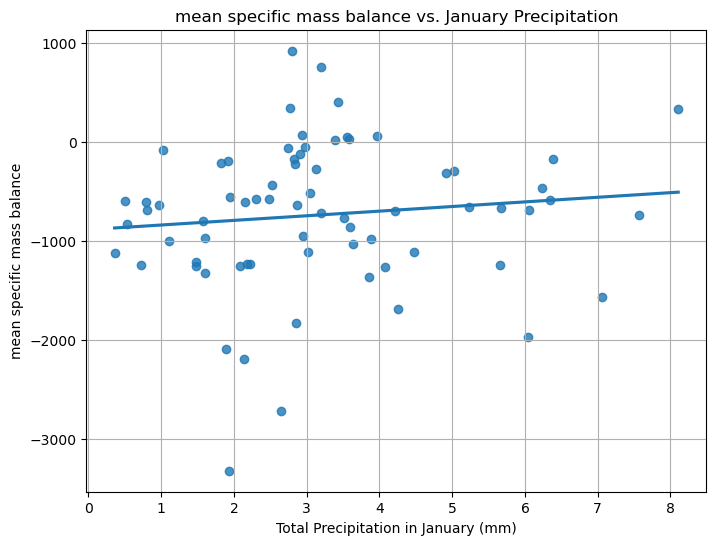

Correlation between mean specific mass balance and January precipitation: 0.111


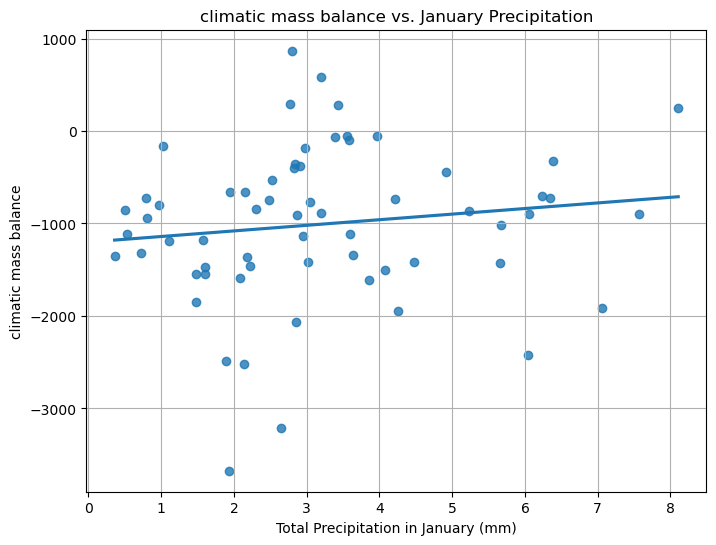

Correlation between climatic mass balance and January precipitation: 0.132


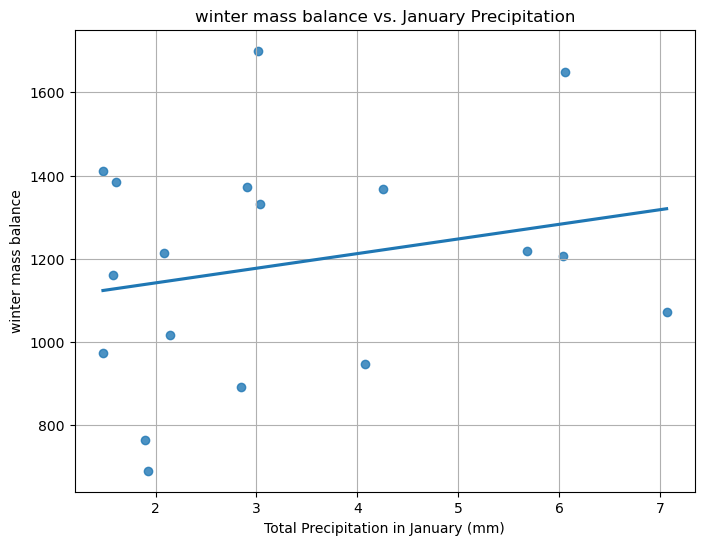

Correlation between winter mass balance and January precipitation: 0.230


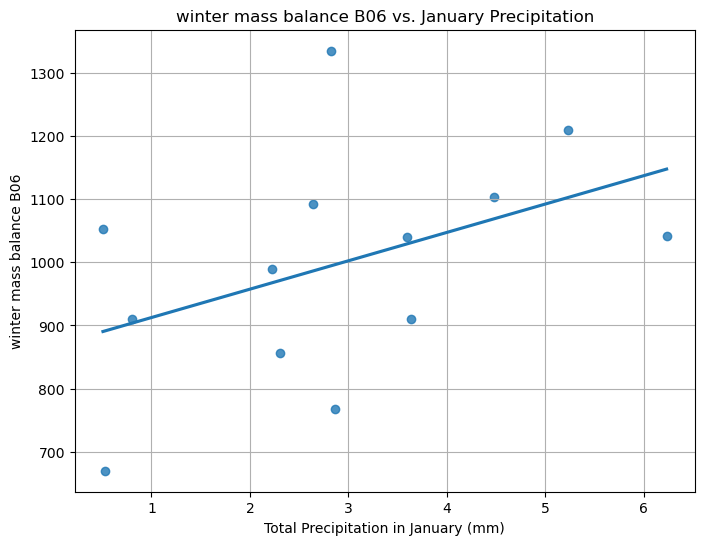

Correlation between winter mass balance B06 and January precipitation: 0.441


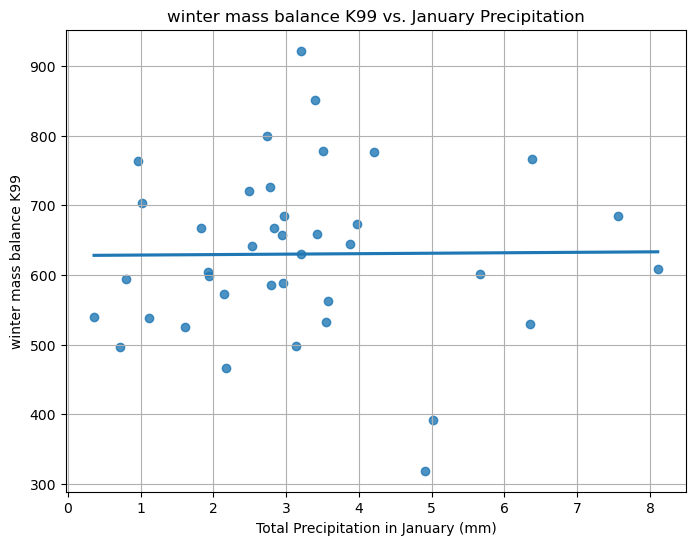

Correlation between winter mass balance K99 and January precipitation: 0.010


/tmp/ipykernel_1777/4076862136.py:41: FutureWarning: 'AS-JAN' is deprecated and will be removed in a future version, please use 'YS-JAN' instead.
  df_monthly_precip = df_month.resample('AS-JAN').agg({'tp_mm': 'sum', 'calendar_year': 'mean'})


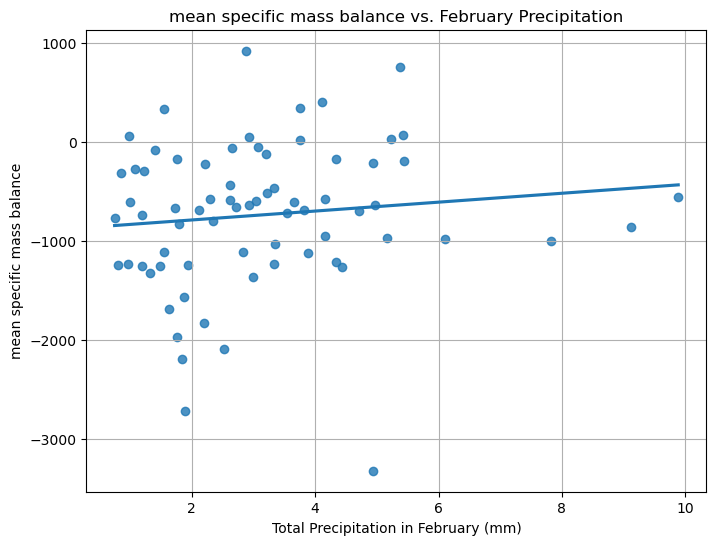

Correlation between mean specific mass balance and February precipitation: 0.113


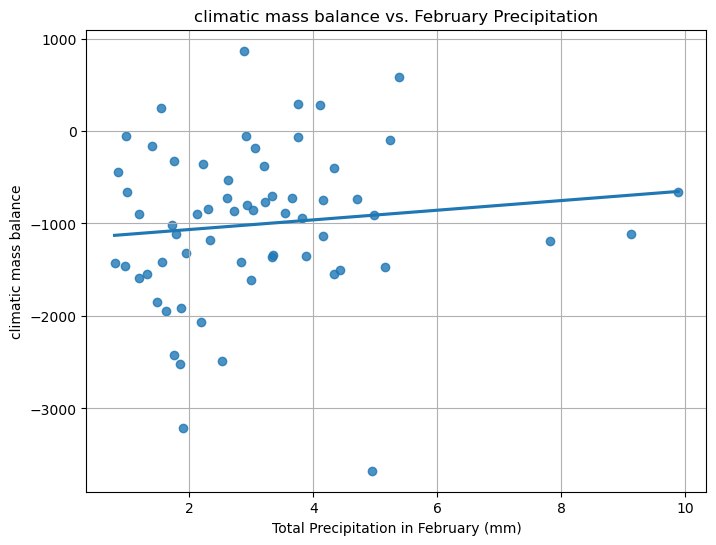

Correlation between climatic mass balance and February precipitation: 0.112


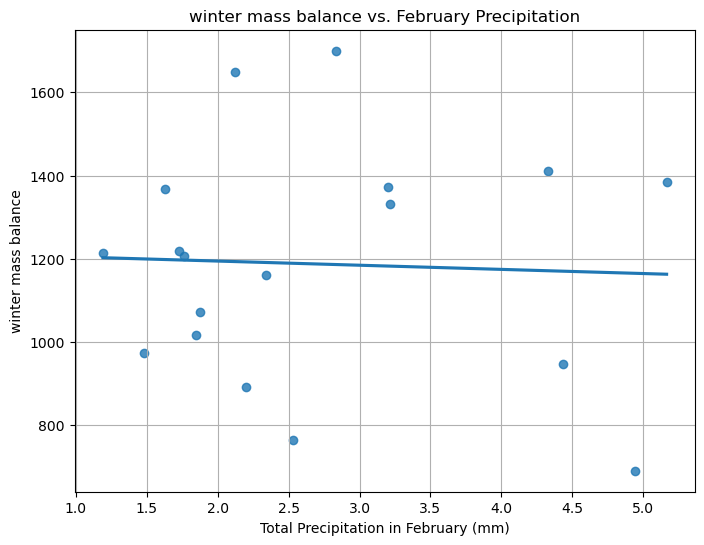

Correlation between winter mass balance and February precipitation: -0.045


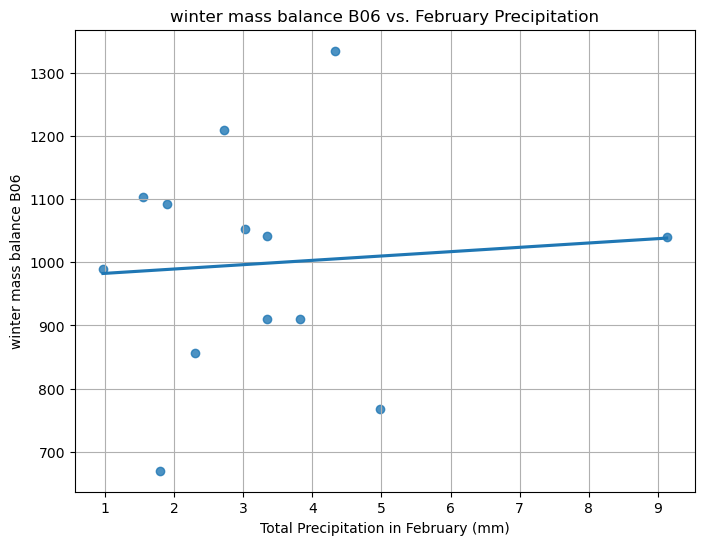

Correlation between winter mass balance B06 and February precipitation: 0.080


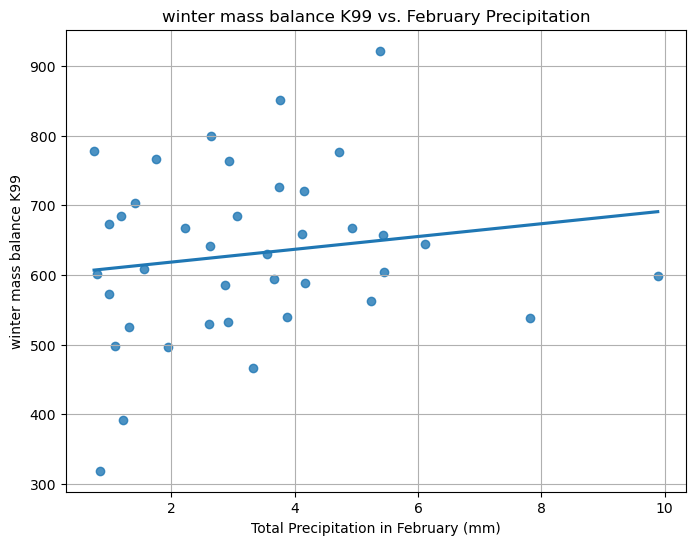

Correlation between winter mass balance K99 and February precipitation: 0.154


/tmp/ipykernel_1777/4076862136.py:41: FutureWarning: 'AS-JAN' is deprecated and will be removed in a future version, please use 'YS-JAN' instead.
  df_monthly_precip = df_month.resample('AS-JAN').agg({'tp_mm': 'sum', 'calendar_year': 'mean'})


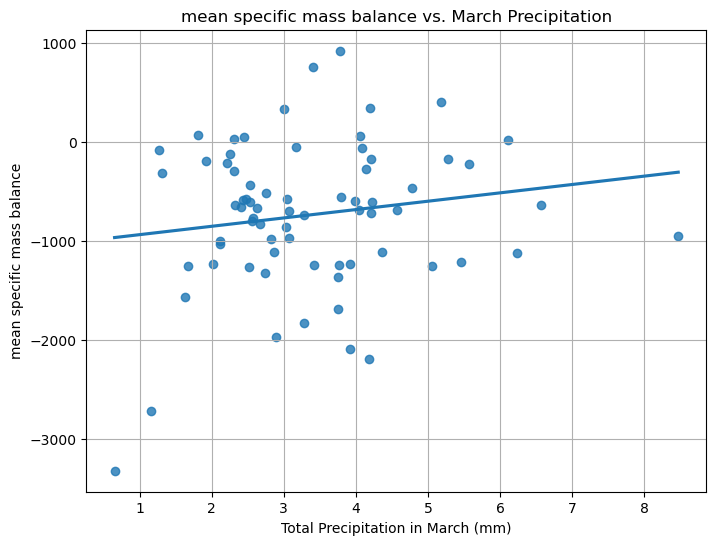

Correlation between mean specific mass balance and March precipitation: 0.159


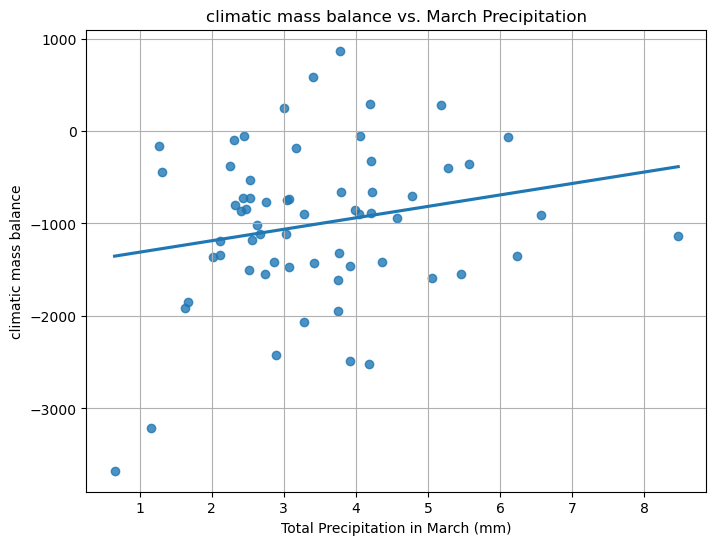

Correlation between climatic mass balance and March precipitation: 0.209


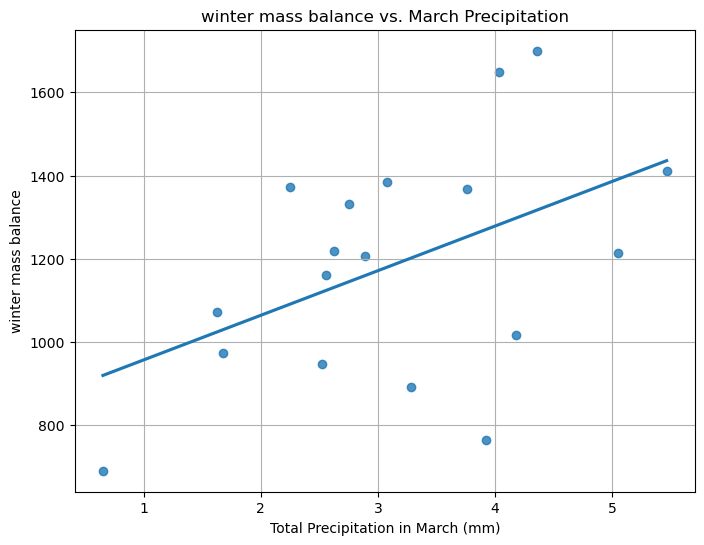

Correlation between winter mass balance and March precipitation: 0.478


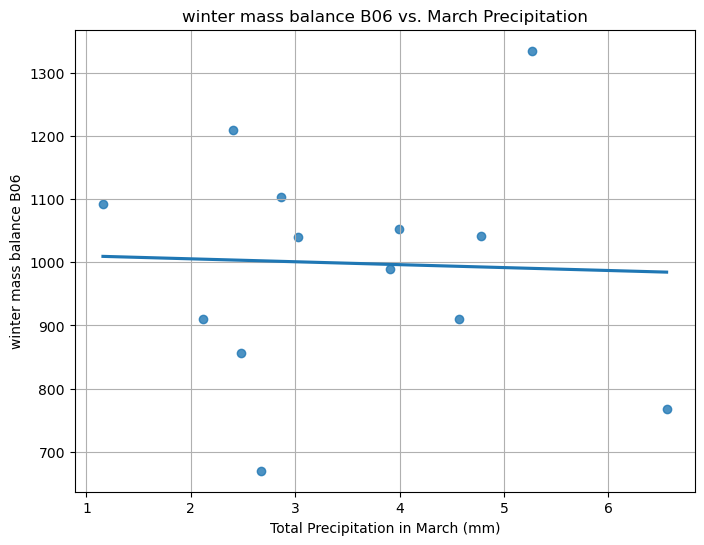

Correlation between winter mass balance B06 and March precipitation: -0.039


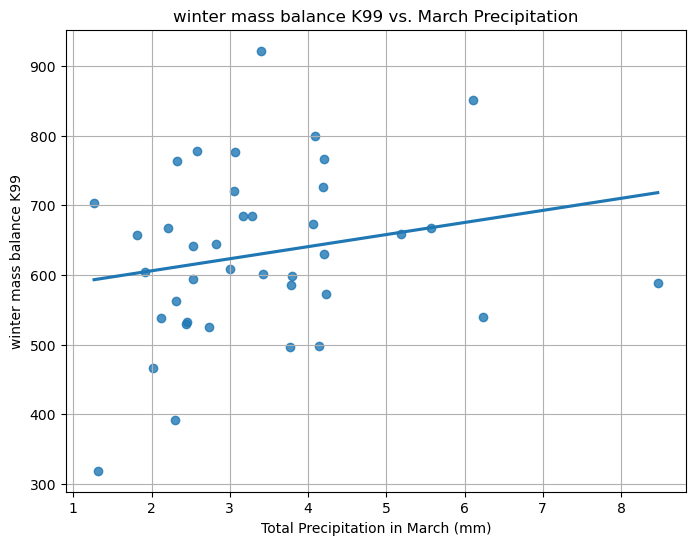

Correlation between winter mass balance K99 and March precipitation: 0.209


/tmp/ipykernel_1777/4076862136.py:41: FutureWarning: 'AS-JAN' is deprecated and will be removed in a future version, please use 'YS-JAN' instead.
  df_monthly_precip = df_month.resample('AS-JAN').agg({'tp_mm': 'sum', 'calendar_year': 'mean'})


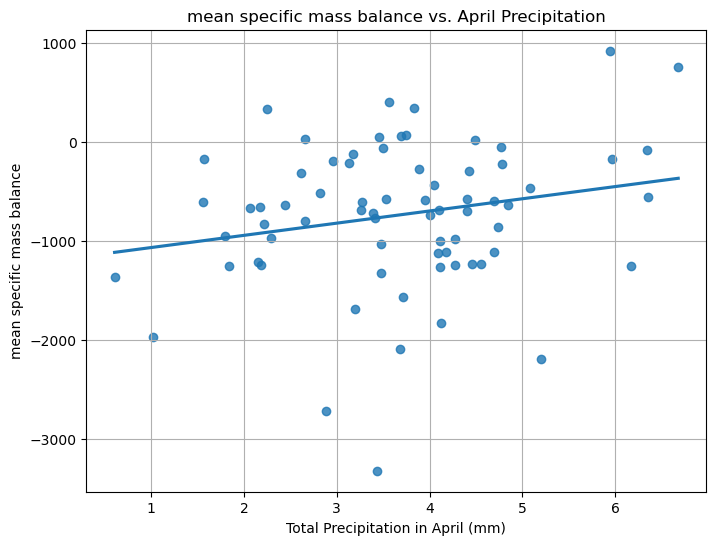

Correlation between mean specific mass balance and April precipitation: 0.212


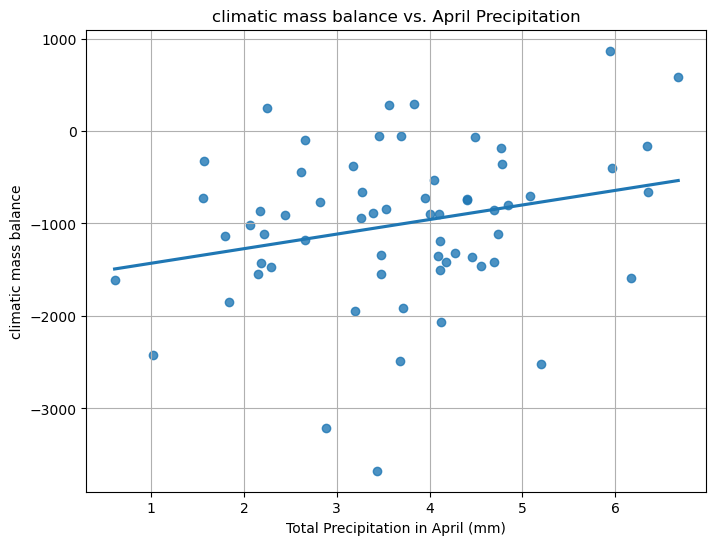

Correlation between climatic mass balance and April precipitation: 0.251


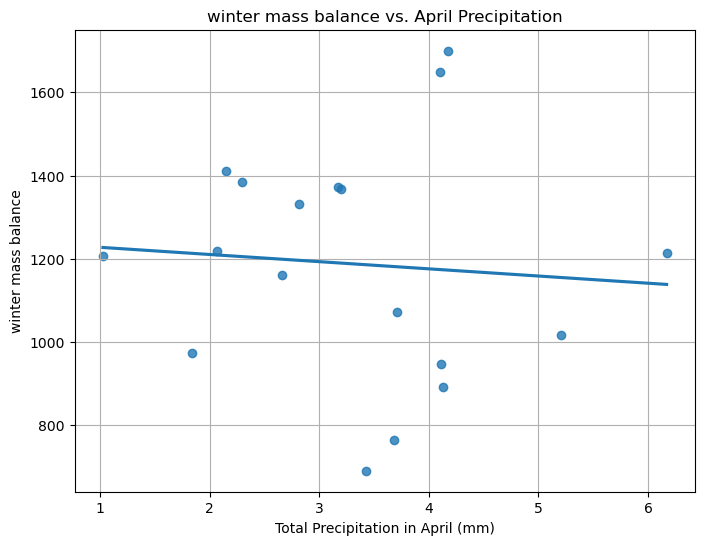

Correlation between winter mass balance and April precipitation: -0.078


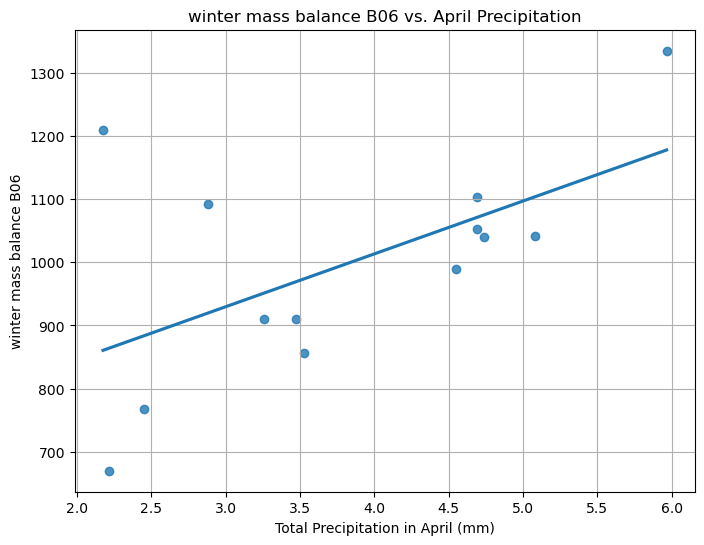

Correlation between winter mass balance B06 and April precipitation: 0.569


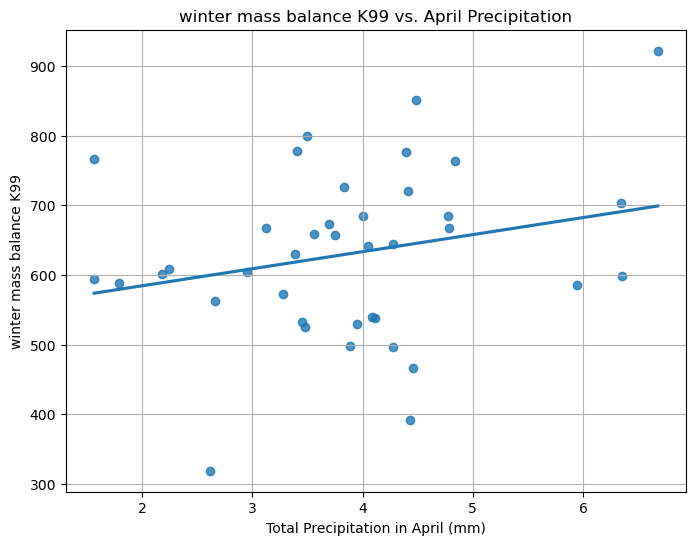

Correlation between winter mass balance K99 and April precipitation: 0.244


/tmp/ipykernel_1777/4076862136.py:41: FutureWarning: 'AS-JAN' is deprecated and will be removed in a future version, please use 'YS-JAN' instead.
  df_monthly_precip = df_month.resample('AS-JAN').agg({'tp_mm': 'sum', 'calendar_year': 'mean'})


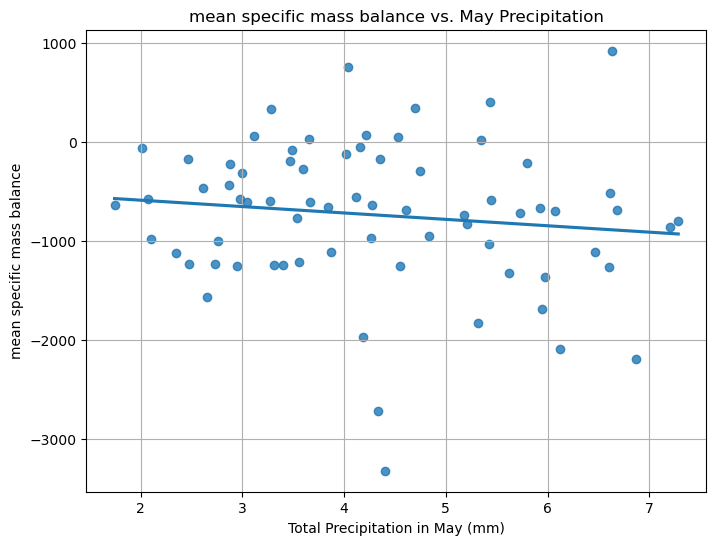

Correlation between mean specific mass balance and May precipitation: -0.125


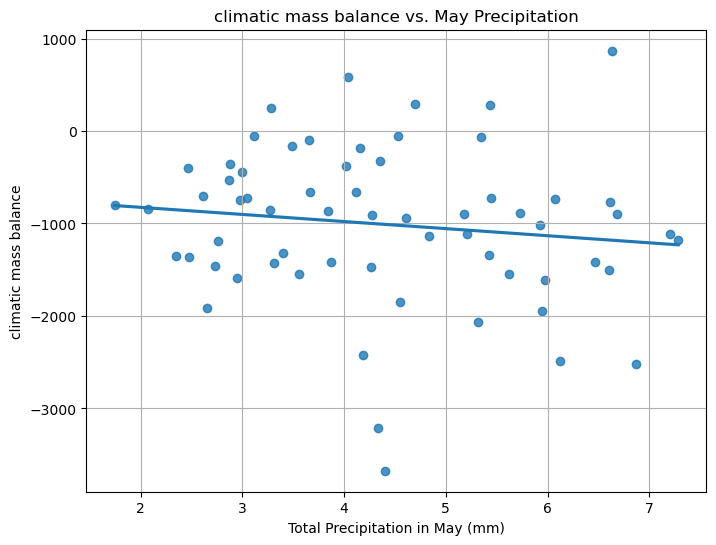

Correlation between climatic mass balance and May precipitation: -0.131


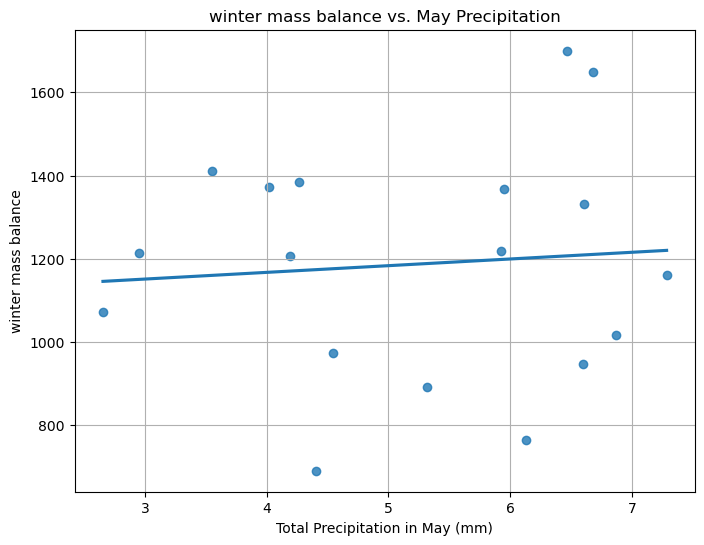

Correlation between winter mass balance and May precipitation: 0.083


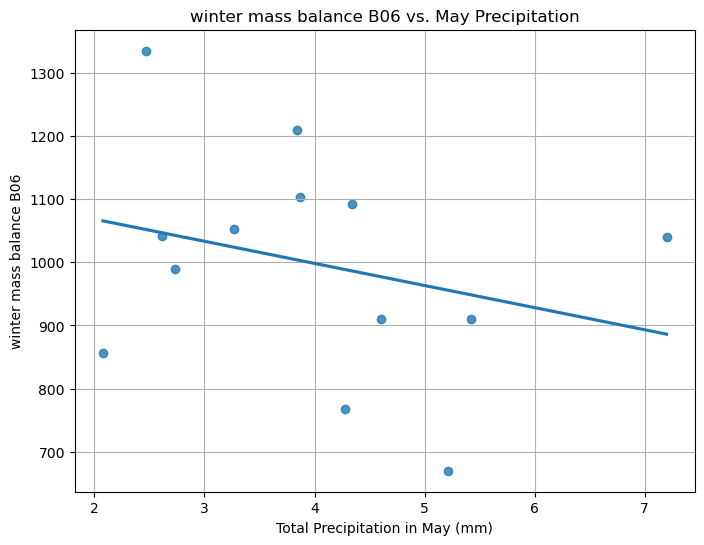

Correlation between winter mass balance B06 and May precipitation: -0.280


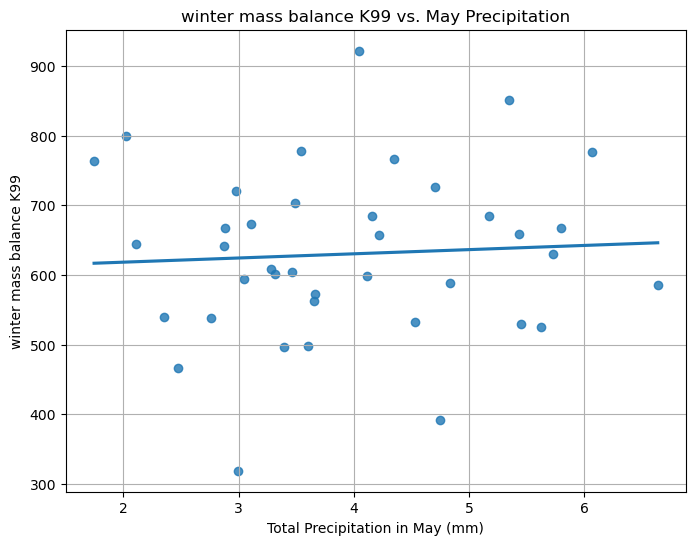

Correlation between winter mass balance K99 and May precipitation: 0.061


/tmp/ipykernel_1777/4076862136.py:41: FutureWarning: 'AS-JAN' is deprecated and will be removed in a future version, please use 'YS-JAN' instead.
  df_monthly_precip = df_month.resample('AS-JAN').agg({'tp_mm': 'sum', 'calendar_year': 'mean'})


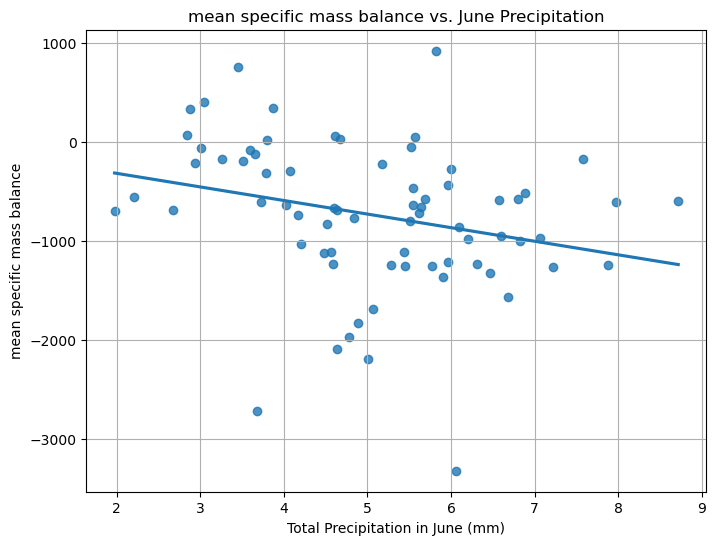

Correlation between mean specific mass balance and June precipitation: -0.269


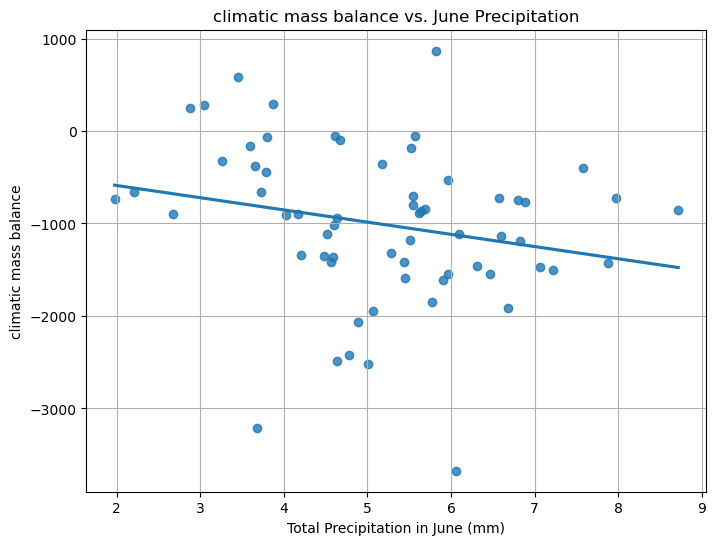

Correlation between climatic mass balance and June precipitation: -0.225


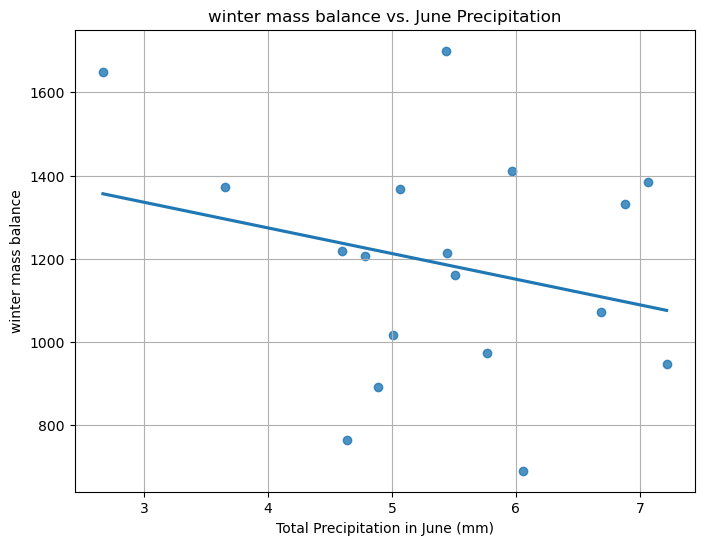

Correlation between winter mass balance and June precipitation: -0.261


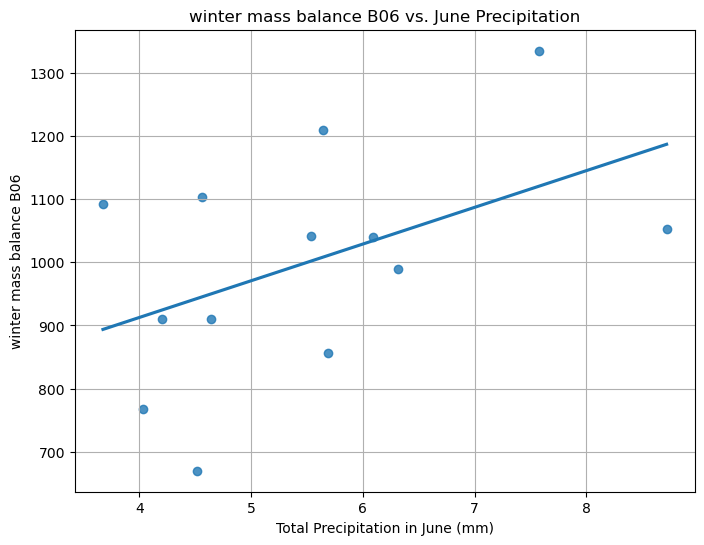

Correlation between winter mass balance B06 and June precipitation: 0.475


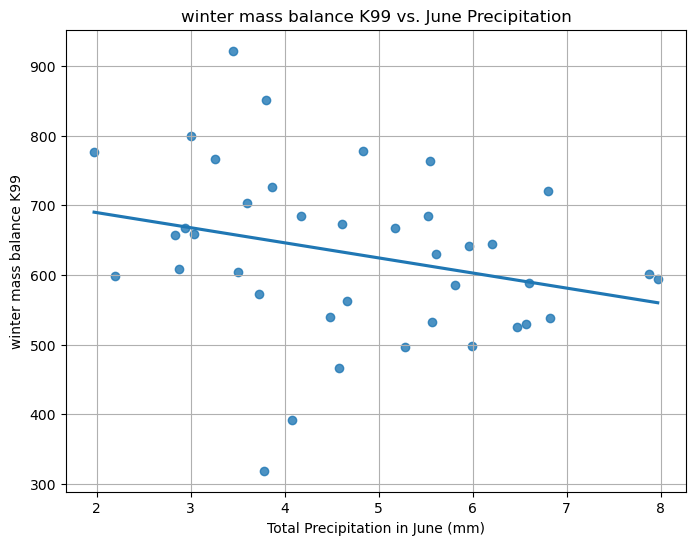

Correlation between winter mass balance K99 and June precipitation: -0.275


/tmp/ipykernel_1777/4076862136.py:41: FutureWarning: 'AS-JAN' is deprecated and will be removed in a future version, please use 'YS-JAN' instead.
  df_monthly_precip = df_month.resample('AS-JAN').agg({'tp_mm': 'sum', 'calendar_year': 'mean'})


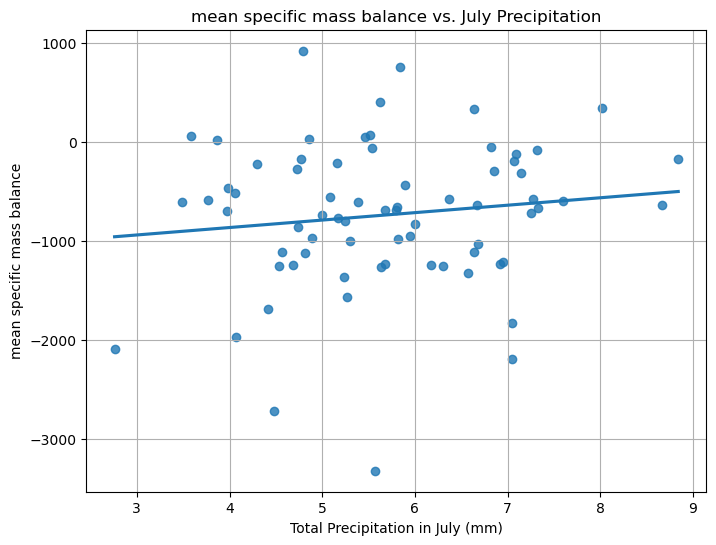

Correlation between mean specific mass balance and July precipitation: 0.129


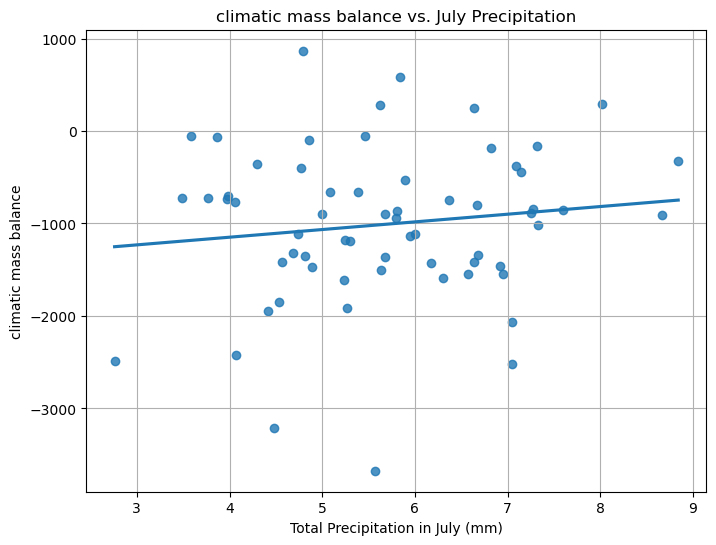

Correlation between climatic mass balance and July precipitation: 0.129


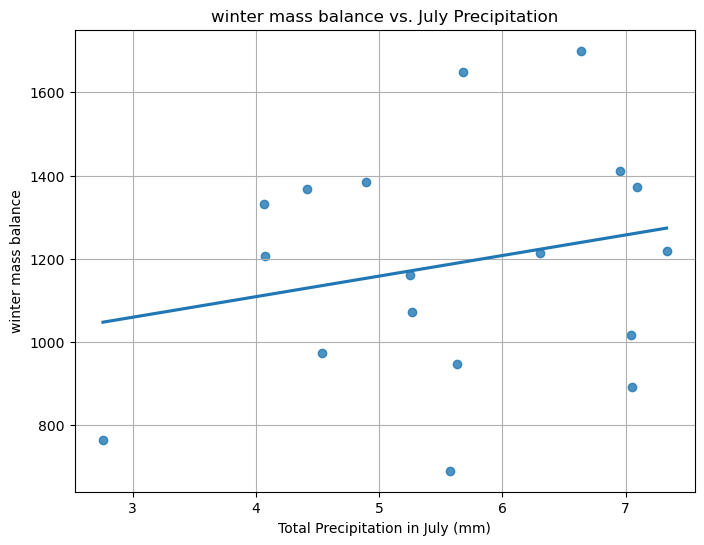

Correlation between winter mass balance and July precipitation: 0.232


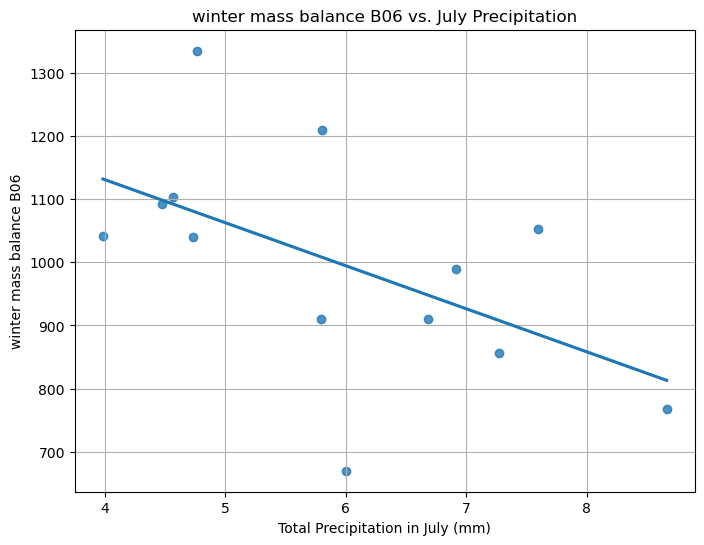

Correlation between winter mass balance B06 and July precipitation: -0.542


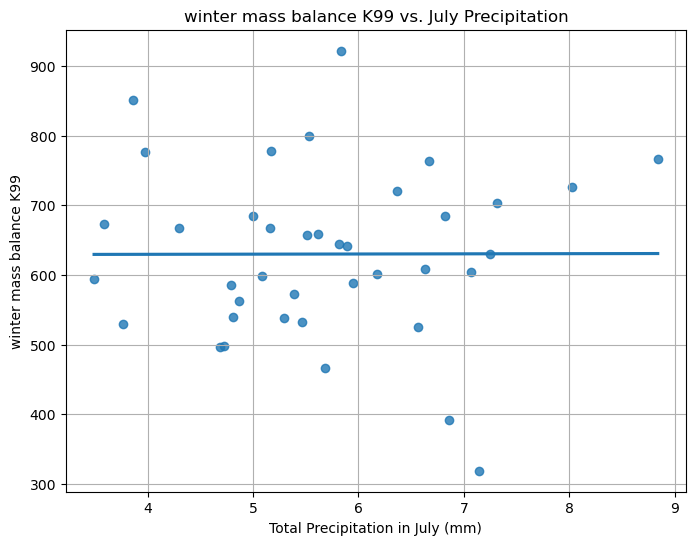

Correlation between winter mass balance K99 and July precipitation: 0.002


/tmp/ipykernel_1777/4076862136.py:41: FutureWarning: 'AS-JAN' is deprecated and will be removed in a future version, please use 'YS-JAN' instead.
  df_monthly_precip = df_month.resample('AS-JAN').agg({'tp_mm': 'sum', 'calendar_year': 'mean'})


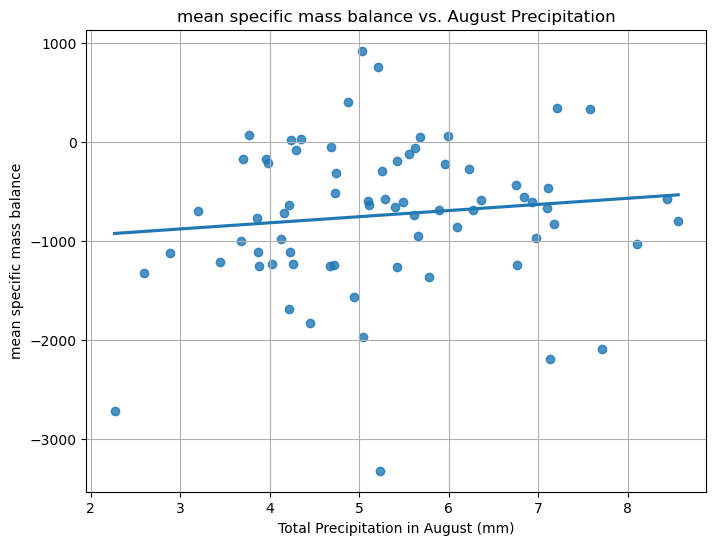

Correlation between mean specific mass balance and August precipitation: 0.117


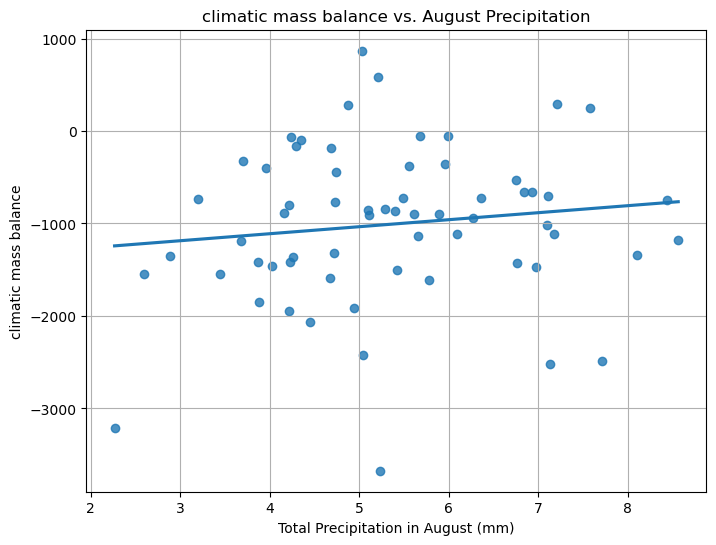

Correlation between climatic mass balance and August precipitation: 0.129


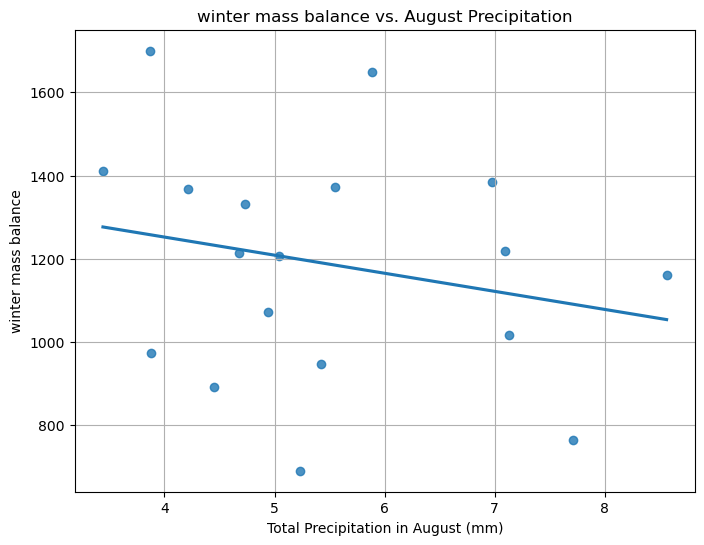

Correlation between winter mass balance and August precipitation: -0.227


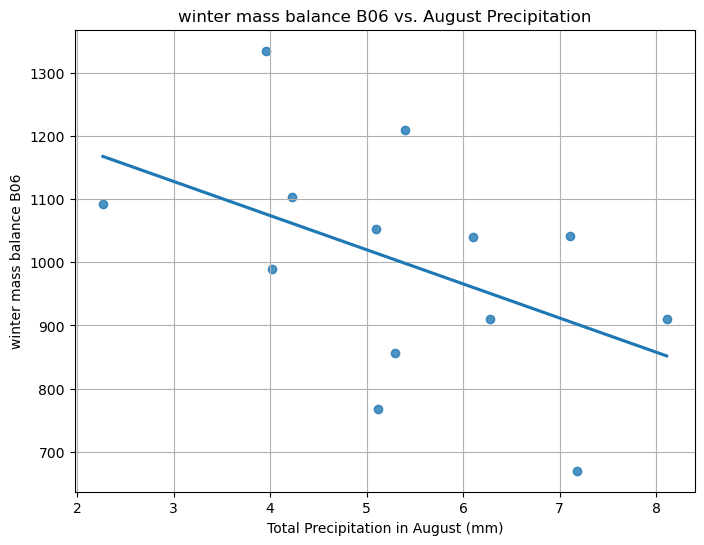

Correlation between winter mass balance B06 and August precipitation: -0.480


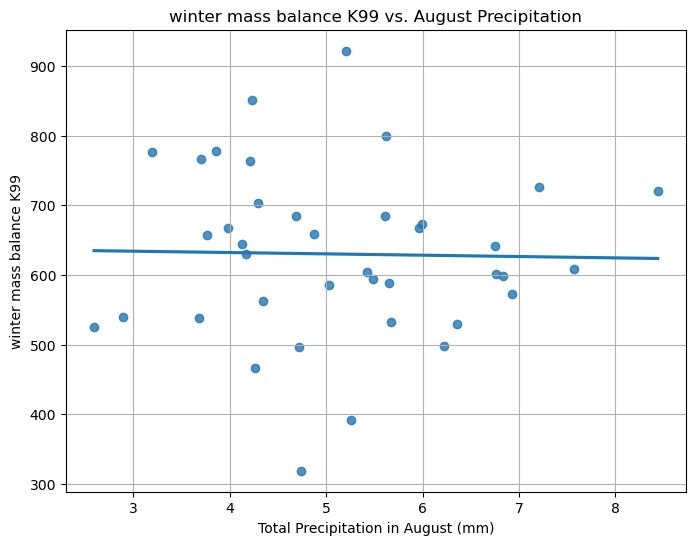

Correlation between winter mass balance K99 and August precipitation: -0.021


/tmp/ipykernel_1777/4076862136.py:41: FutureWarning: 'AS-JAN' is deprecated and will be removed in a future version, please use 'YS-JAN' instead.
  df_monthly_precip = df_month.resample('AS-JAN').agg({'tp_mm': 'sum', 'calendar_year': 'mean'})


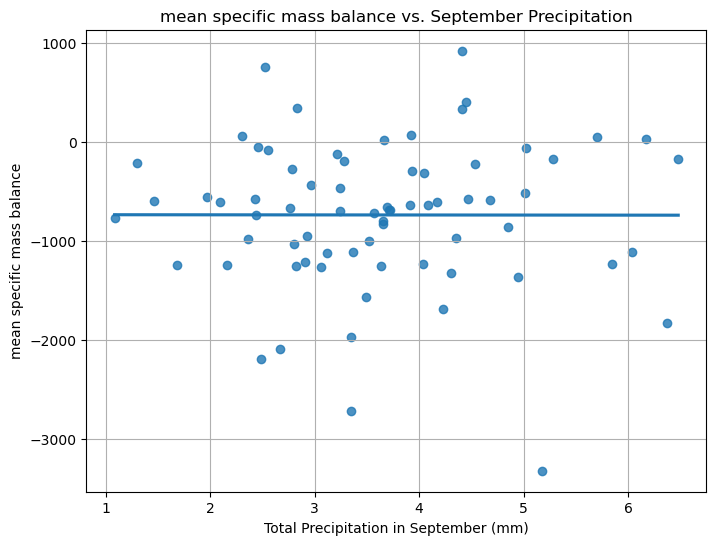

Correlation between mean specific mass balance and September precipitation: -0.001


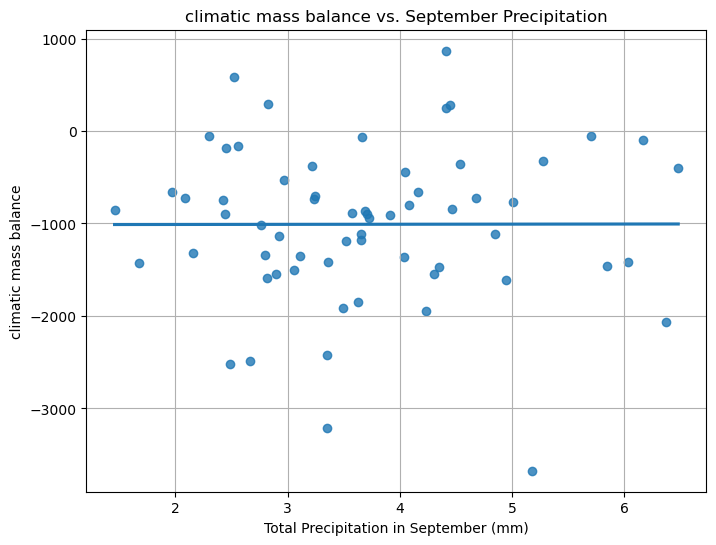

Correlation between climatic mass balance and September precipitation: 0.002


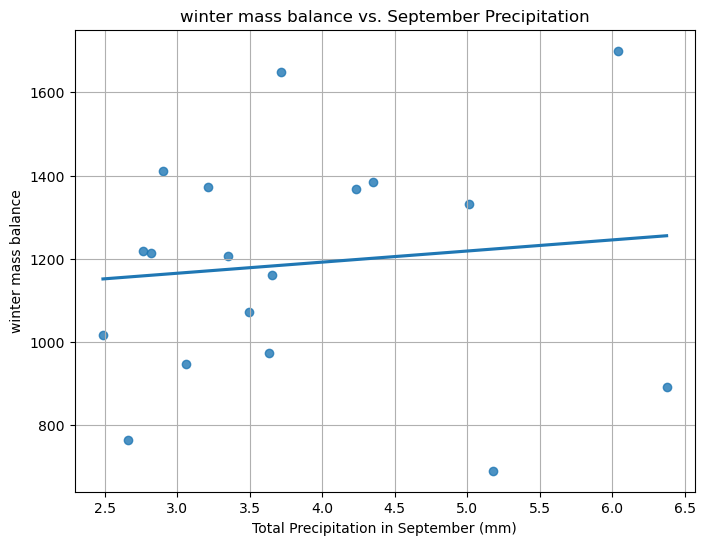

Correlation between winter mass balance and September precipitation: 0.111


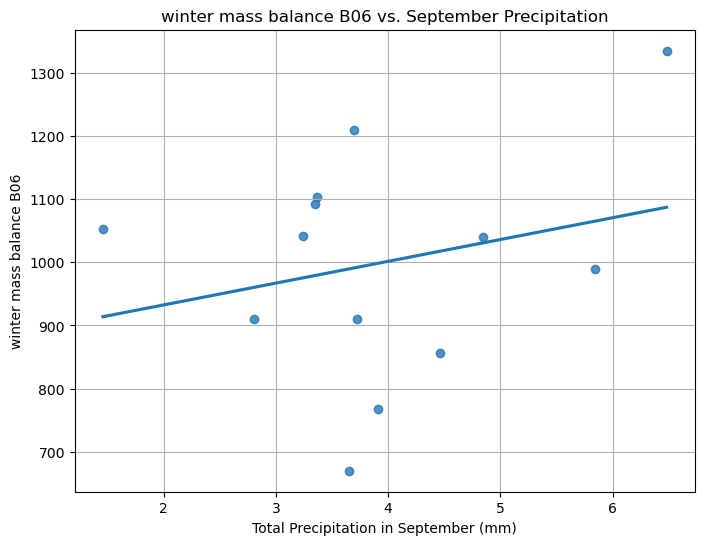

Correlation between winter mass balance B06 and September precipitation: 0.250


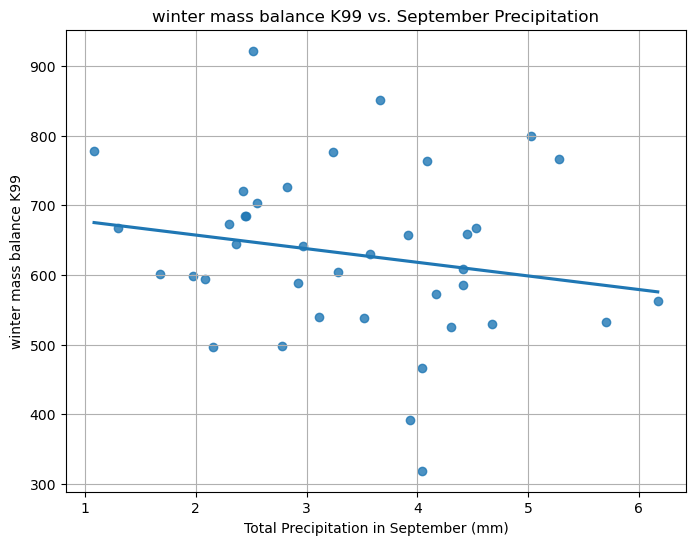

Correlation between winter mass balance K99 and September precipitation: -0.193


/tmp/ipykernel_1777/4076862136.py:41: FutureWarning: 'AS-JAN' is deprecated and will be removed in a future version, please use 'YS-JAN' instead.
  df_monthly_precip = df_month.resample('AS-JAN').agg({'tp_mm': 'sum', 'calendar_year': 'mean'})


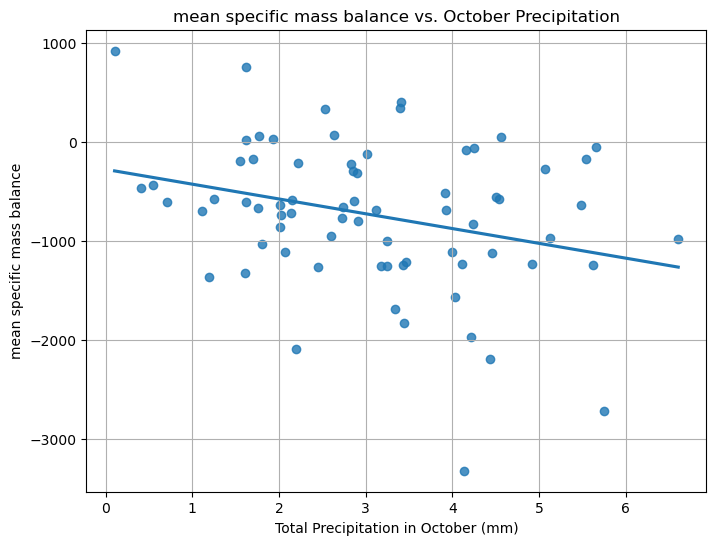

Correlation between mean specific mass balance and October precipitation: -0.291


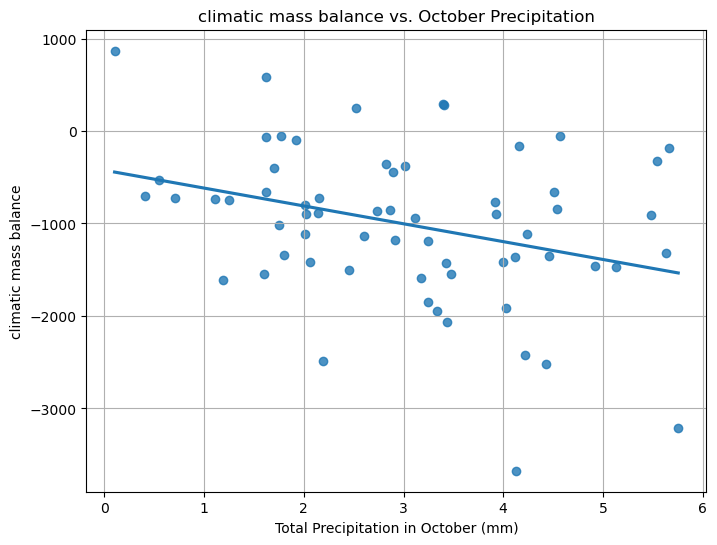

Correlation between climatic mass balance and October precipitation: -0.324


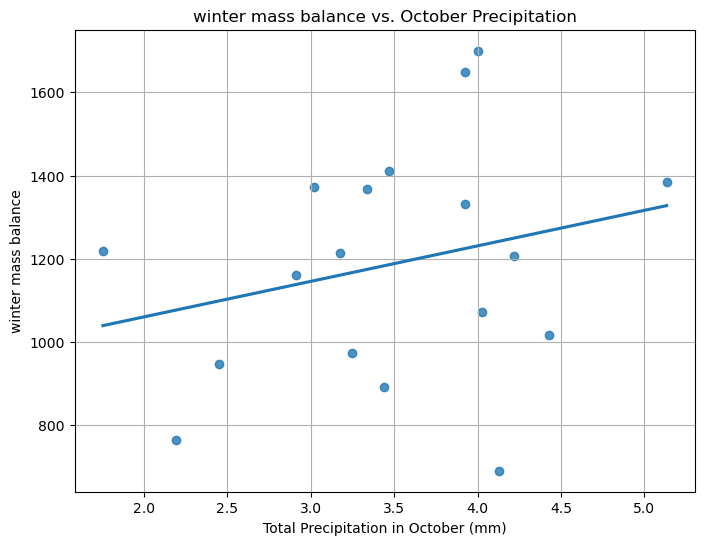

Correlation between winter mass balance and October precipitation: 0.258


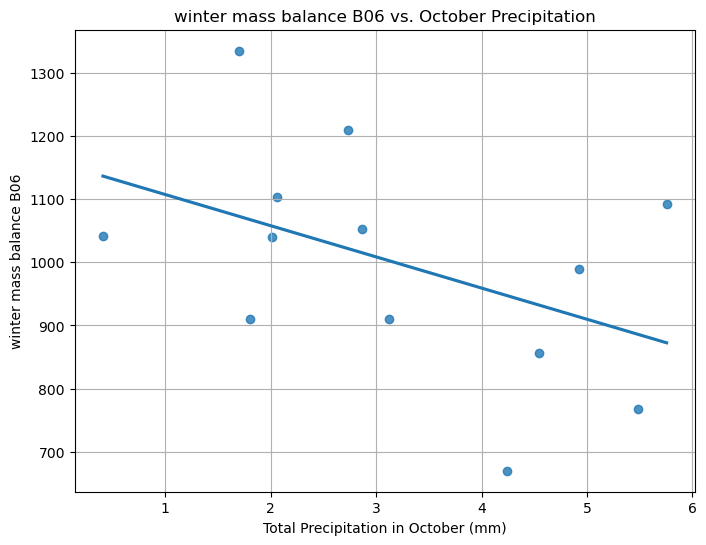

Correlation between winter mass balance B06 and October precipitation: -0.457


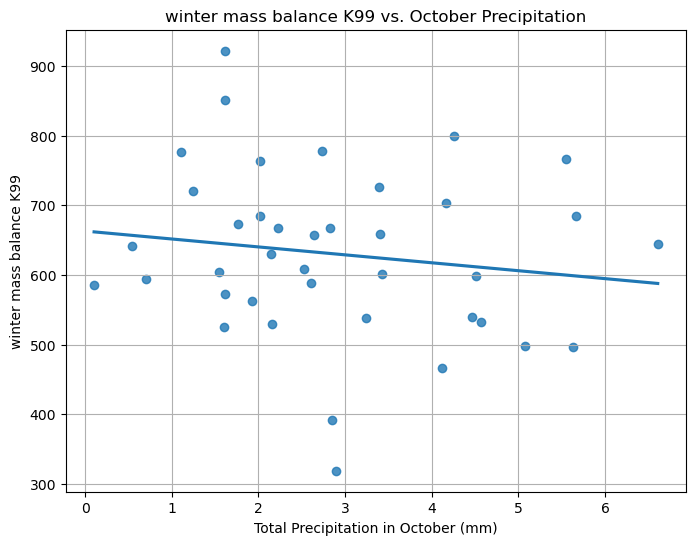

Correlation between winter mass balance K99 and October precipitation: -0.147


/tmp/ipykernel_1777/4076862136.py:41: FutureWarning: 'AS-JAN' is deprecated and will be removed in a future version, please use 'YS-JAN' instead.
  df_monthly_precip = df_month.resample('AS-JAN').agg({'tp_mm': 'sum', 'calendar_year': 'mean'})


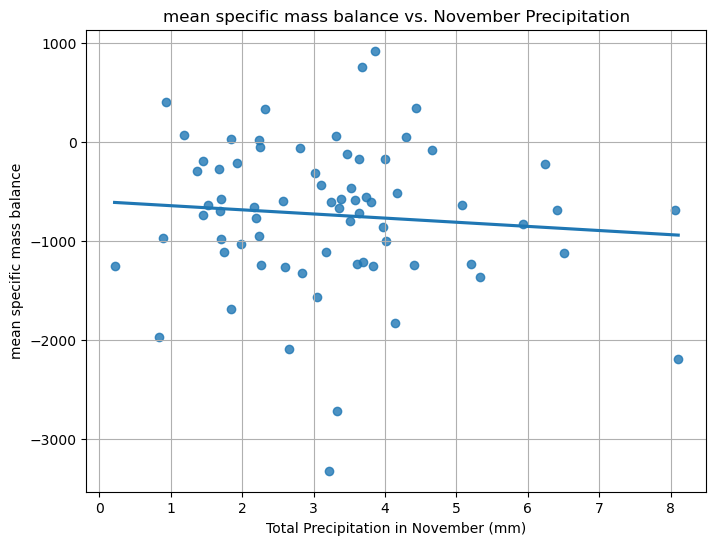

Correlation between mean specific mass balance and November precipitation: -0.090


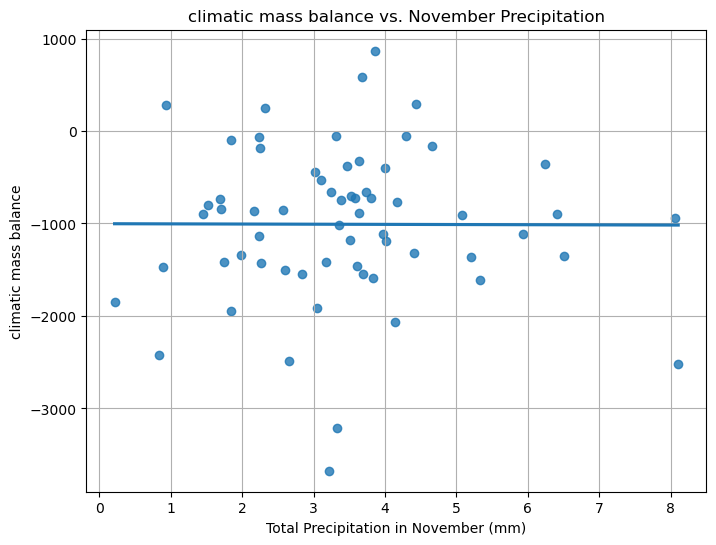

Correlation between climatic mass balance and November precipitation: -0.003


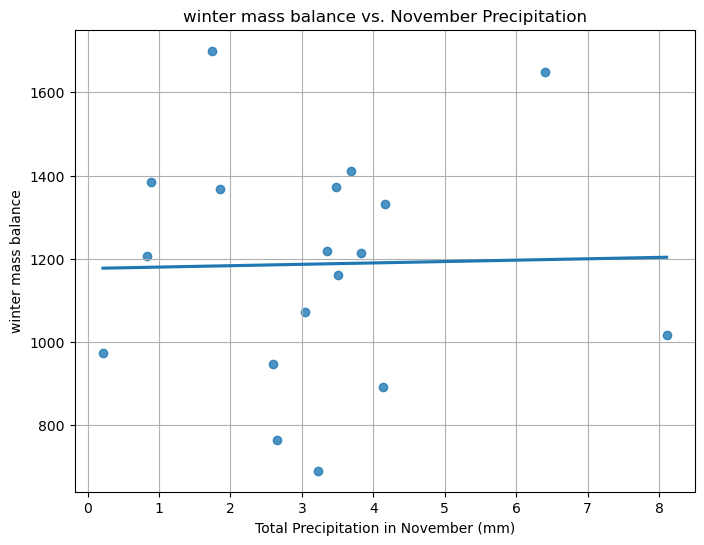

Correlation between winter mass balance and November precipitation: 0.023


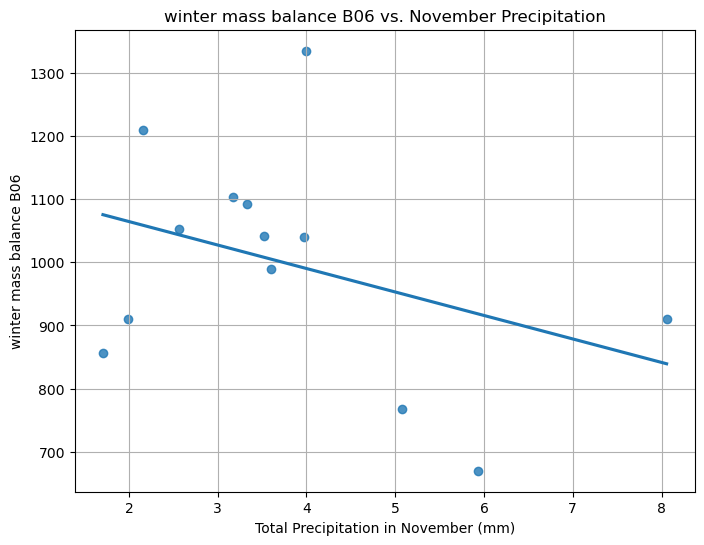

Correlation between winter mass balance B06 and November precipitation: -0.366


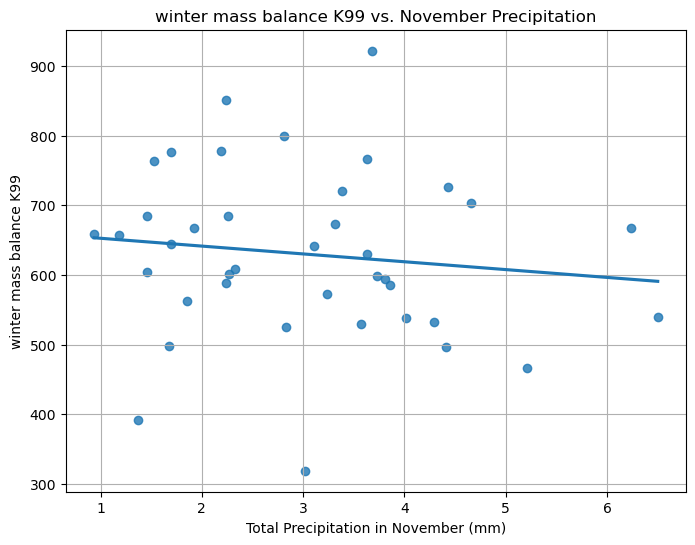

Correlation between winter mass balance K99 and November precipitation: -0.125


/tmp/ipykernel_1777/4076862136.py:41: FutureWarning: 'AS-JAN' is deprecated and will be removed in a future version, please use 'YS-JAN' instead.
  df_monthly_precip = df_month.resample('AS-JAN').agg({'tp_mm': 'sum', 'calendar_year': 'mean'})


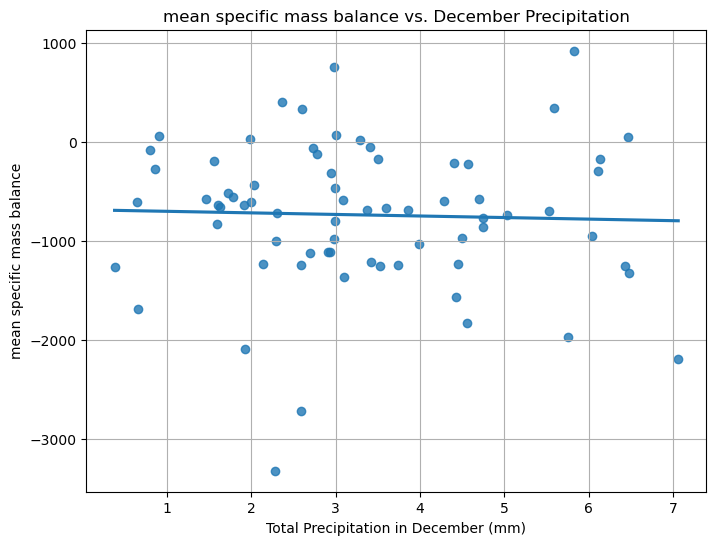

Correlation between mean specific mass balance and December precipitation: -0.035


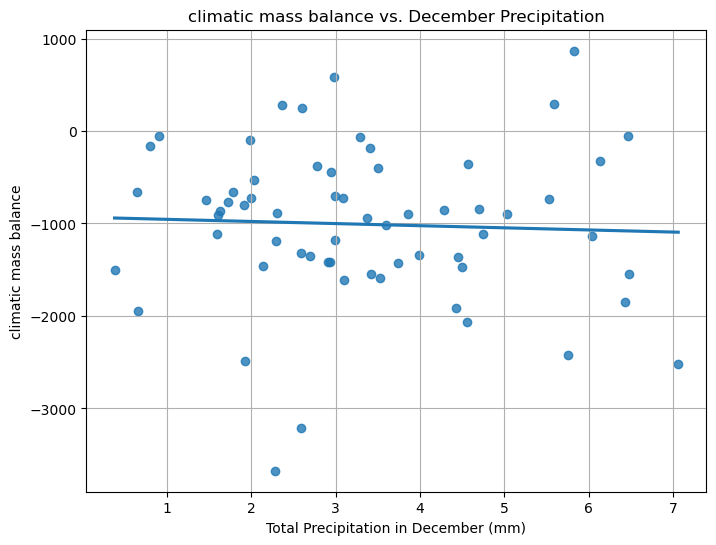

Correlation between climatic mass balance and December precipitation: -0.045


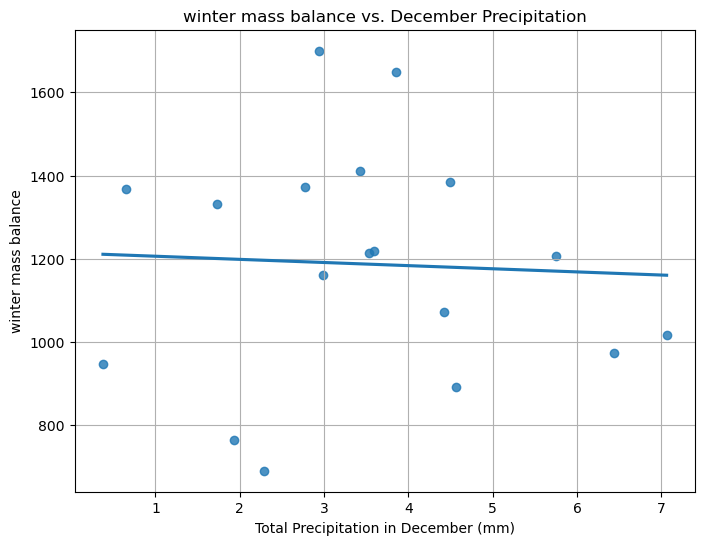

Correlation between winter mass balance and December precipitation: -0.049


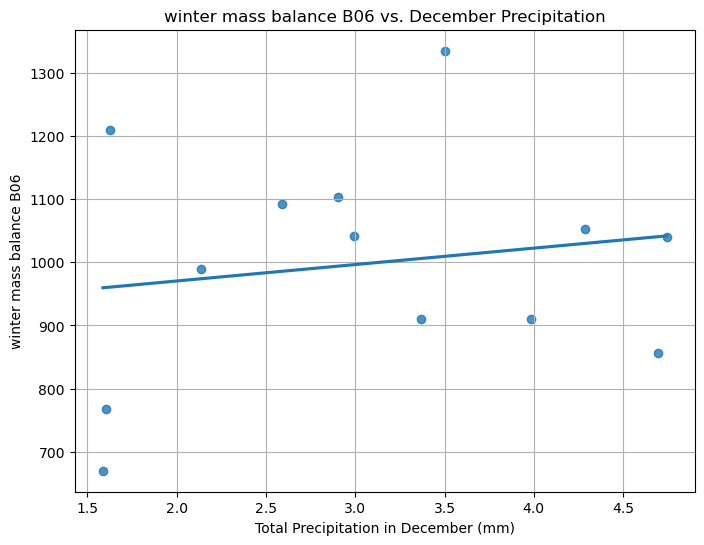

Correlation between winter mass balance B06 and December precipitation: 0.166


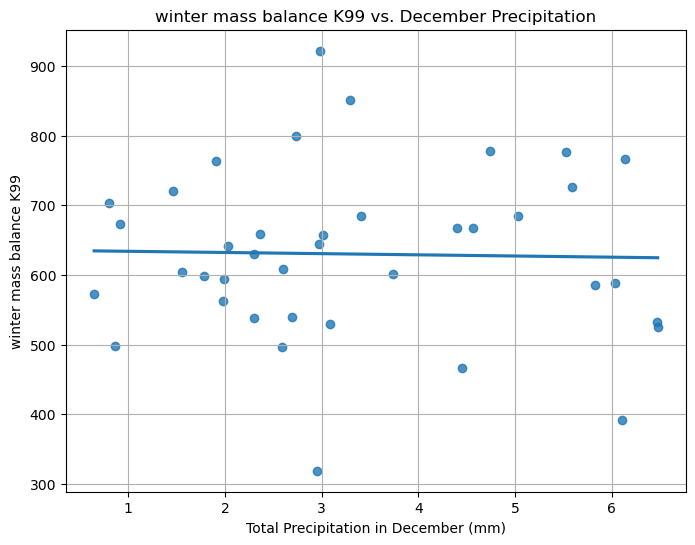

Correlation between winter mass balance K99 and December precipitation: -0.024


In [73]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Open the NetCDF file (Update file path as needed)
ds = xr.open_dataset('/home/pcuser/hef/era5_data/a75b0cf7dd4e88d2dd2e966e05a762d7/data_1.nc')

# Target latitude and longitude
lat_target = 46.8
lon_target = 10.8

# Get latitude and longitude arrays
lat = ds['latitude'].values
lon = ds['longitude'].values

# Find the index for the exact location
lat_idx = (lat == lat_target).argmax()
lon_idx = (lon == lon_target).argmax()

# Extract time and precipitation data
time_data = pd.to_datetime(ds['valid_time'].values)
tp_data_mm = ds['tp'][:, lat_idx, lon_idx].values * 1000  # Convert to mm

# Create DataFrame
df_climate = pd.DataFrame({'time': time_data, 'tp_mm': tp_data_mm})
df_climate.set_index('time', inplace=True)

# Define 'calendar_year' (January–December)
df_climate['calendar_year'] = df_climate.index.year

# Read in mass balance data
df_hef_MB = pd.read_pickle("hef_MB.pkl")

# Iterate through months and create plots
for month in range(1, 13):  # Loop from January (1) to December (12)
    # Filter precipitation for the given month
    df_month = df_climate[df_climate.index.month == month]

    # Sum precipitation by calendar year
    df_monthly_precip = df_month.resample('AS-JAN').agg({'tp_mm': 'sum', 'calendar_year': 'mean'})

    # Merge with mass balance data
    df_merged = pd.merge(df_hef_MB, df_monthly_precip, on="calendar_year", how="inner")

    # Define mass balance variables to compare
    mass_balance_vars = [
        "mean specific mass balance",
        "climatic mass balance",
        "winter mass balance",
        "winter mass balance B06",
        "winter mass balance K99"
    ]

    # Create scatter plots for each mass balance variable
    for var in mass_balance_vars:
        plt.figure(figsize=(8, 6))
        sns.regplot(x=df_merged["tp_mm"], y=df_merged[var], ci=None)
        plt.xlabel(f"Total Precipitation in {pd.to_datetime(month, format='%m').strftime('%B')} (mm)")
        plt.ylabel(var)
        plt.title(f"{var} vs. {pd.to_datetime(month, format='%m').strftime('%B')} Precipitation")
        plt.grid(True)
        plt.show()

        # Calculate correlation coefficient
        correlation = df_merged["tp_mm"].corr(df_merged[var])
        print(f"Correlation between {var} and {pd.to_datetime(month, format='%m').strftime('%B')} precipitation: {correlation:.3f}")


## Now try for MSLP to see any correlation? - I dont know if this makes any sense to use because an average MSL is sort of meaningless?


               tp_mm
time                
1952-01-01  3.280640
1952-02-01  3.852844
1952-03-01  4.407883
1952-04-01  1.707077
1952-05-01  2.250671
...              ...
2024-10-01  4.001617
2024-11-01  1.742363
2024-12-01  2.933502
2025-01-01  2.578735
2025-02-01  0.799179

[878 rows x 1 columns]


## I would also like to try for some climate indexes, e,g, NAO


/tmp/ipykernel_1777/1649969041.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_nao = pd.read_csv(nao_file, delim_whitespace=True, header=None, names=["calendar_year", "month", "NAO_index"])


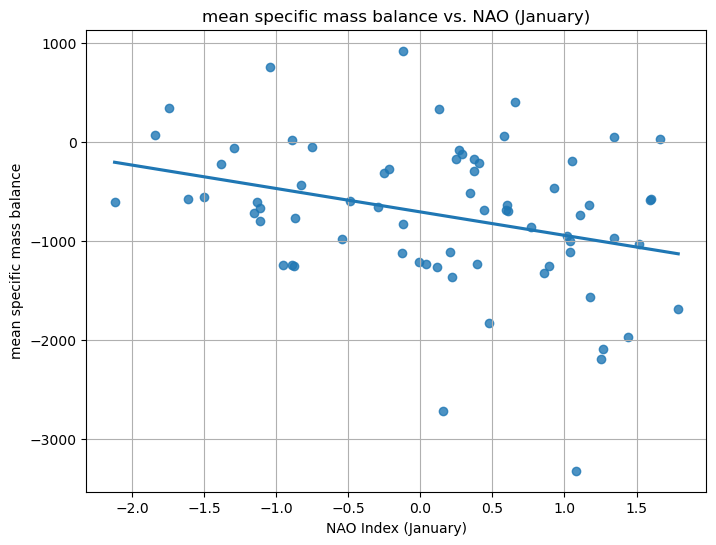

Correlation between mean specific mass balance and NAO (January): -0.316


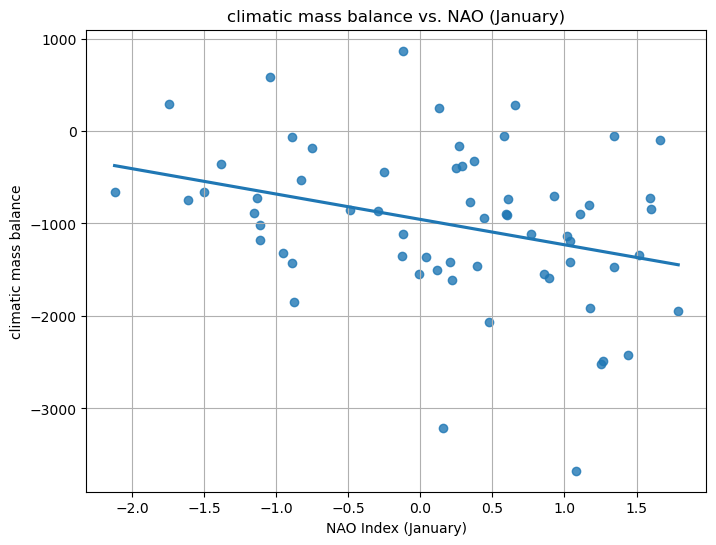

Correlation between climatic mass balance and NAO (January): -0.320


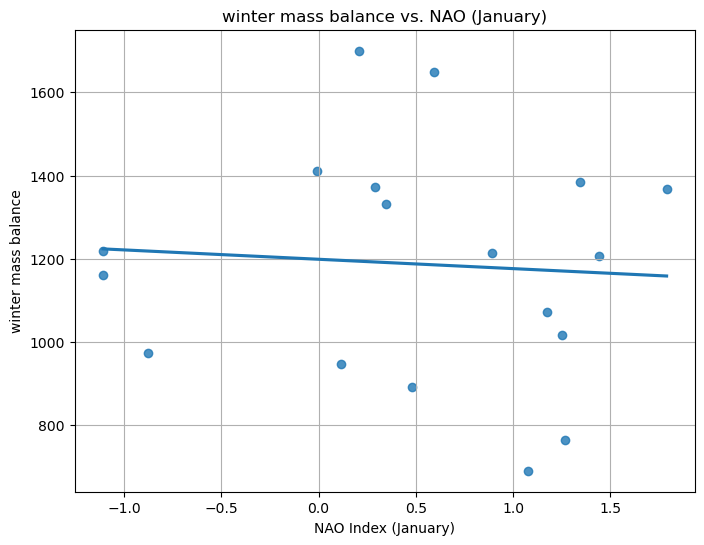

Correlation between winter mass balance and NAO (January): -0.071


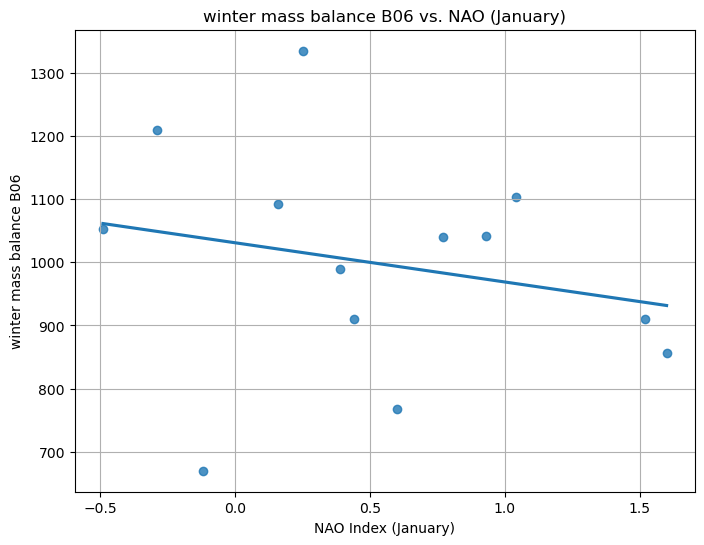

Correlation between winter mass balance B06 and NAO (January): -0.225


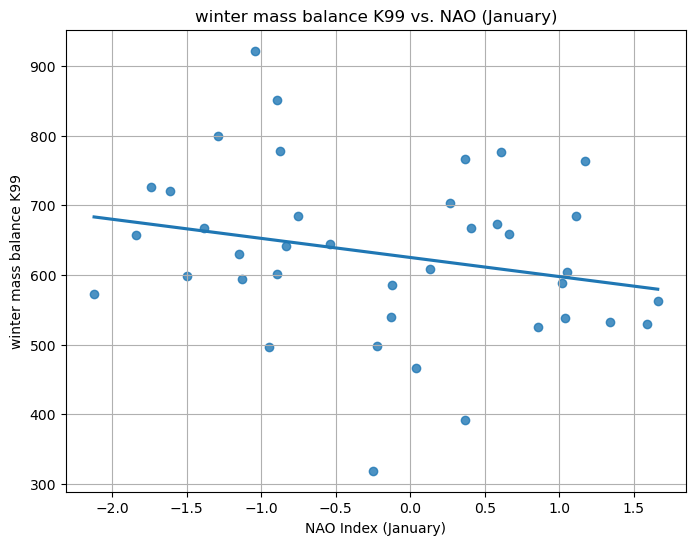

Correlation between winter mass balance K99 and NAO (January): -0.239


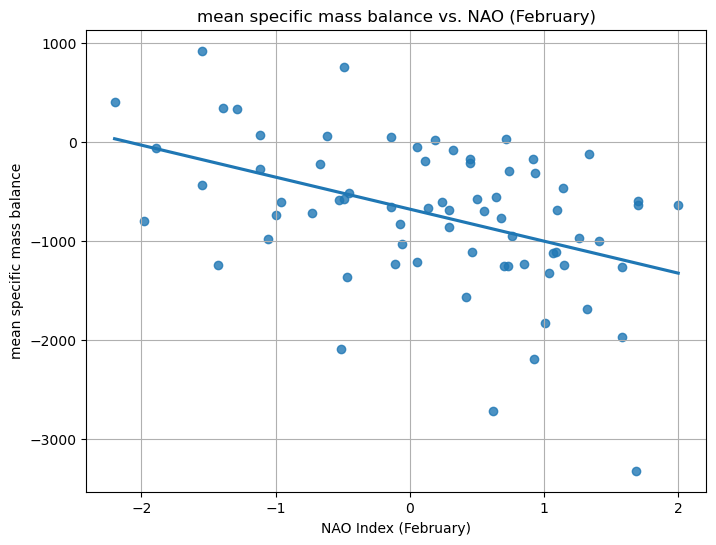

Correlation between mean specific mass balance and NAO (February): -0.440


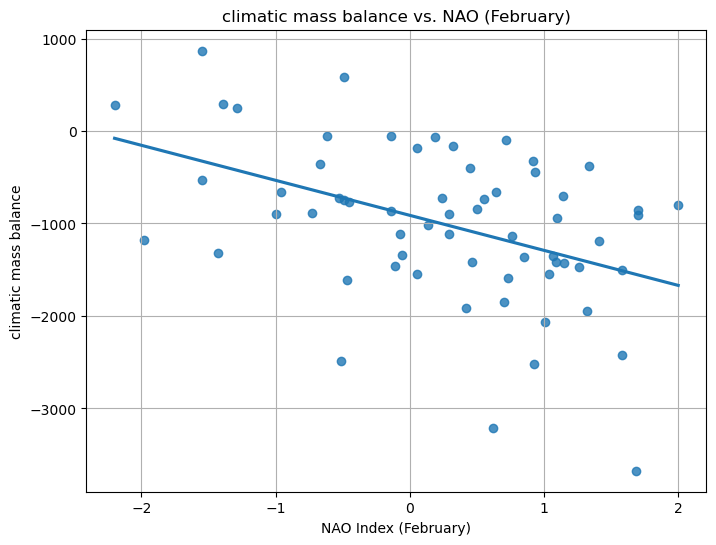

Correlation between climatic mass balance and NAO (February): -0.445


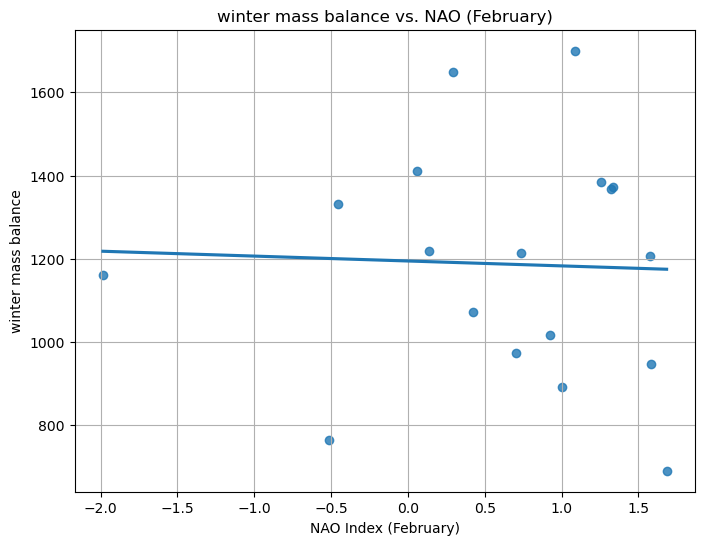

Correlation between winter mass balance and NAO (February): -0.040


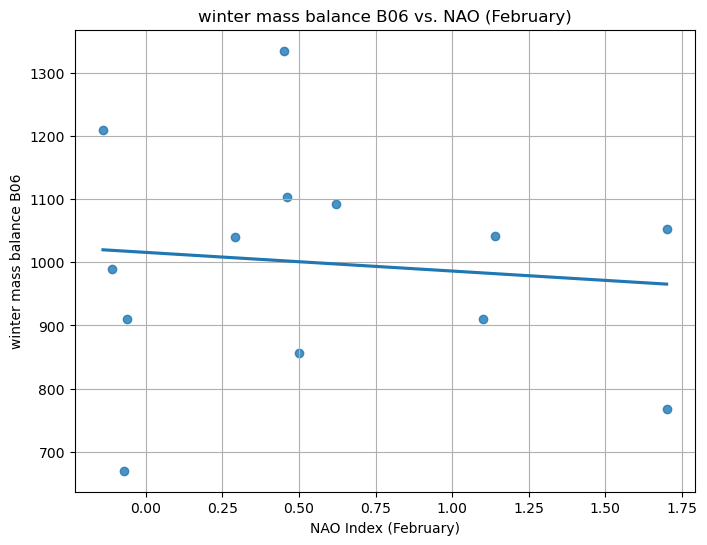

Correlation between winter mass balance B06 and NAO (February): -0.107


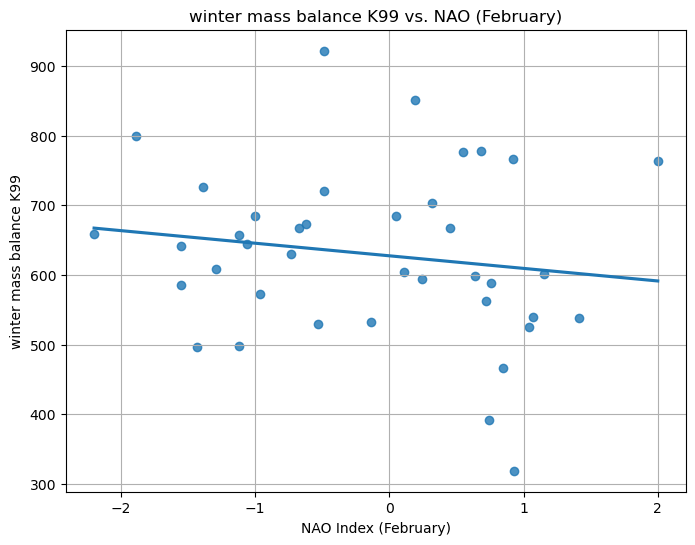

Correlation between winter mass balance K99 and NAO (February): -0.155


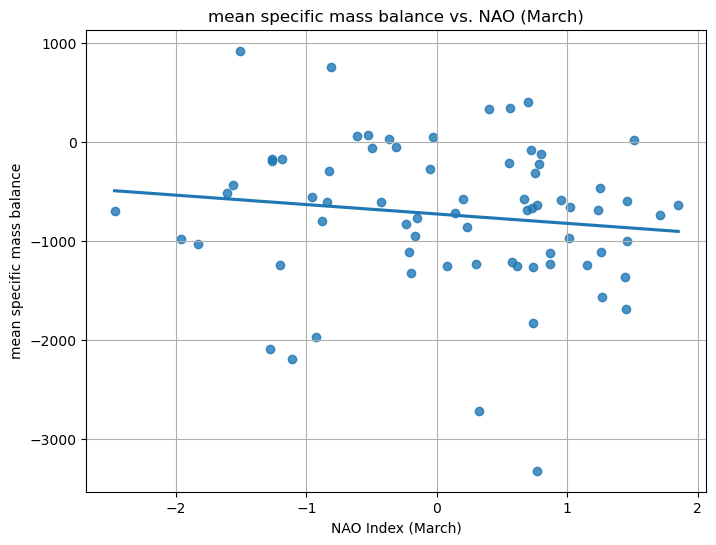

Correlation between mean specific mass balance and NAO (March): -0.131


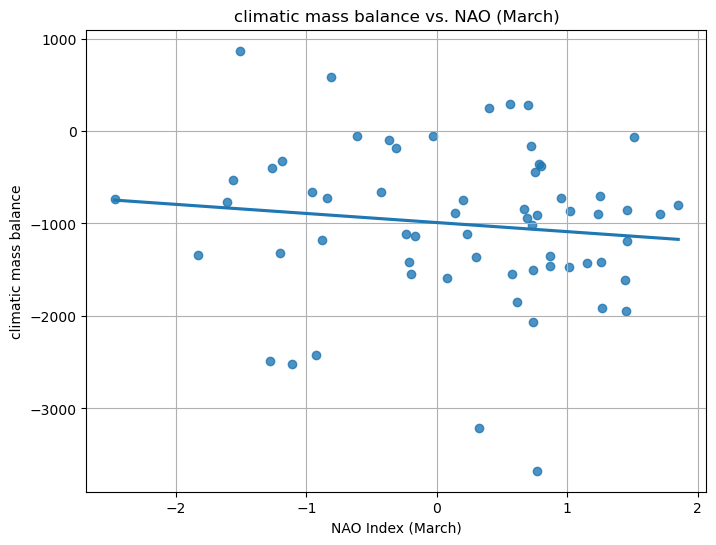

Correlation between climatic mass balance and NAO (March): -0.118


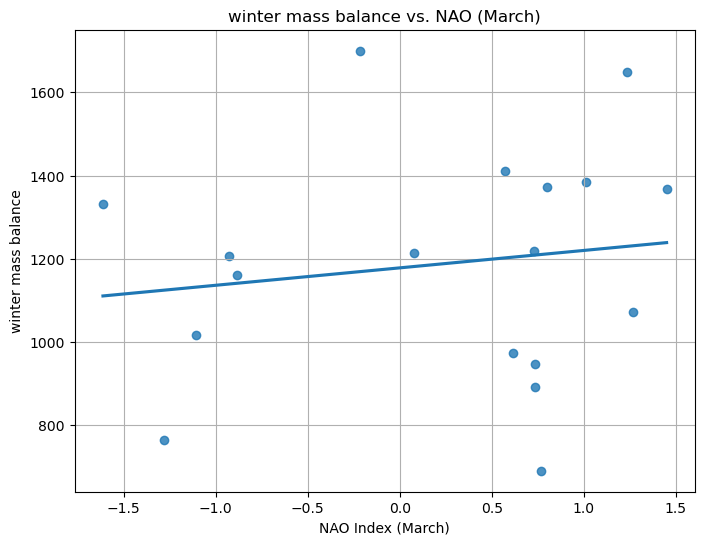

Correlation between winter mass balance and NAO (March): 0.146


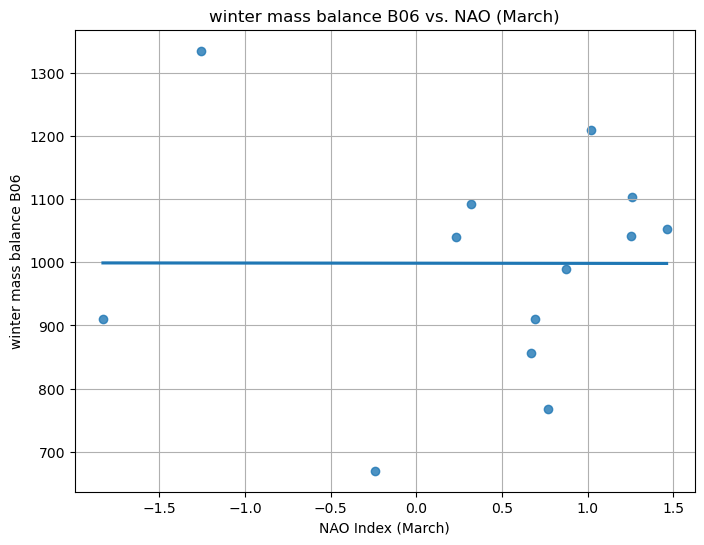

Correlation between winter mass balance B06 and NAO (March): -0.001


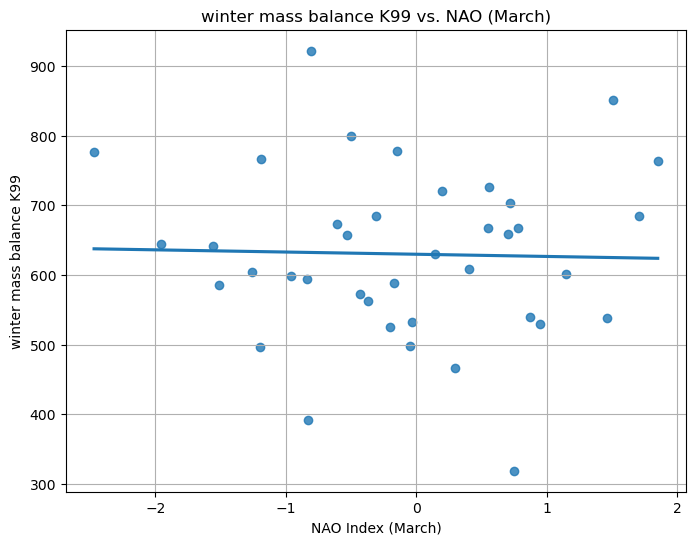

Correlation between winter mass balance K99 and NAO (March): -0.027


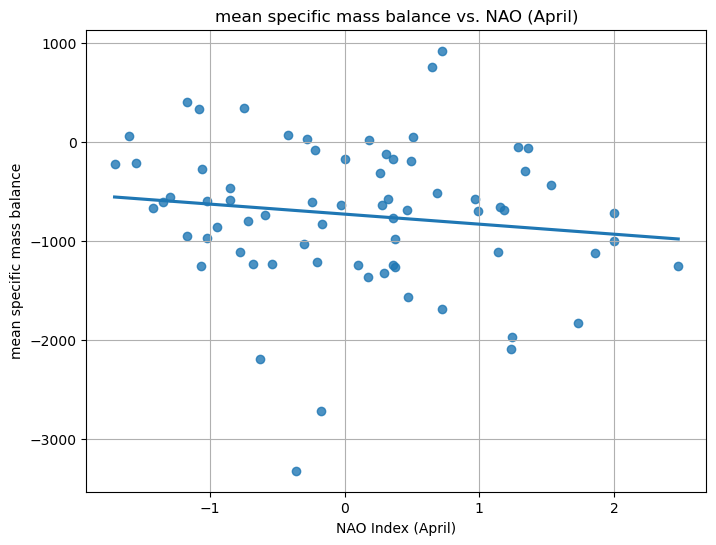

Correlation between mean specific mass balance and NAO (April): -0.136


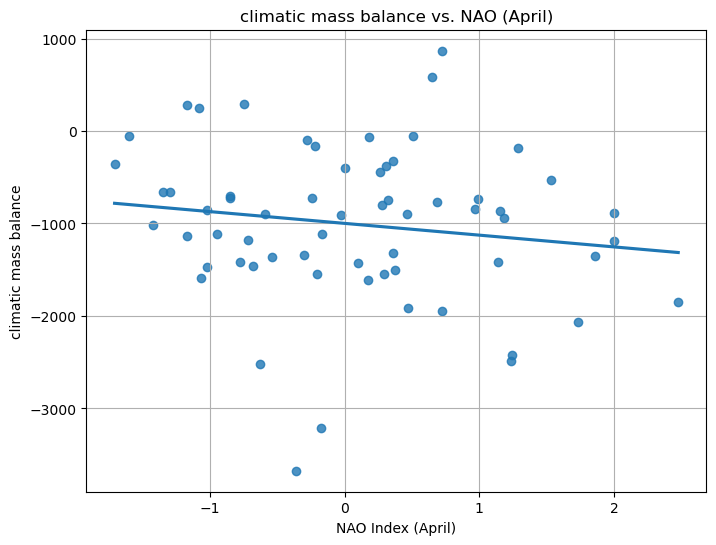

Correlation between climatic mass balance and NAO (April): -0.150


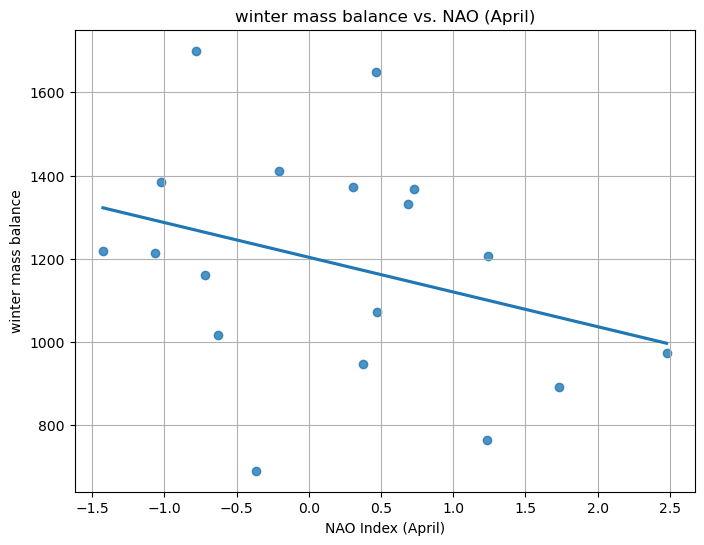

Correlation between winter mass balance and NAO (April): -0.318


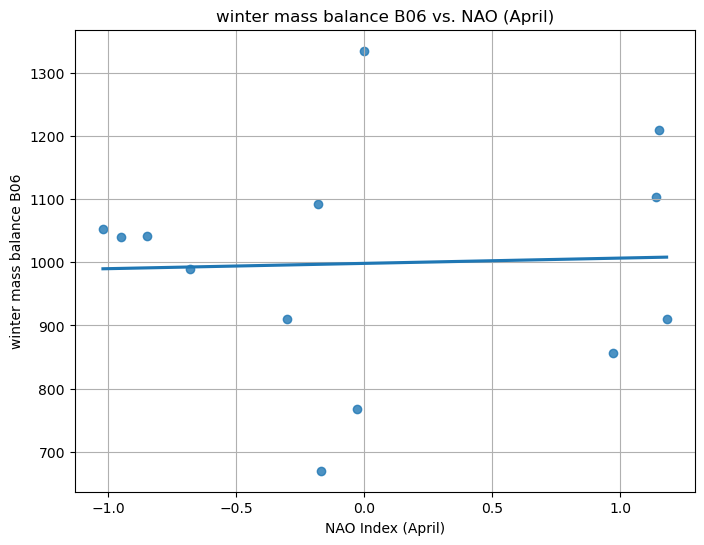

Correlation between winter mass balance B06 and NAO (April): 0.039


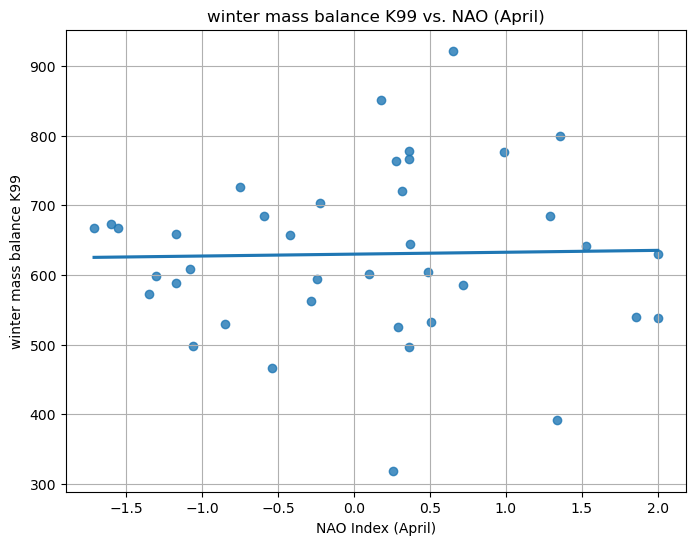

Correlation between winter mass balance K99 and NAO (April): 0.023


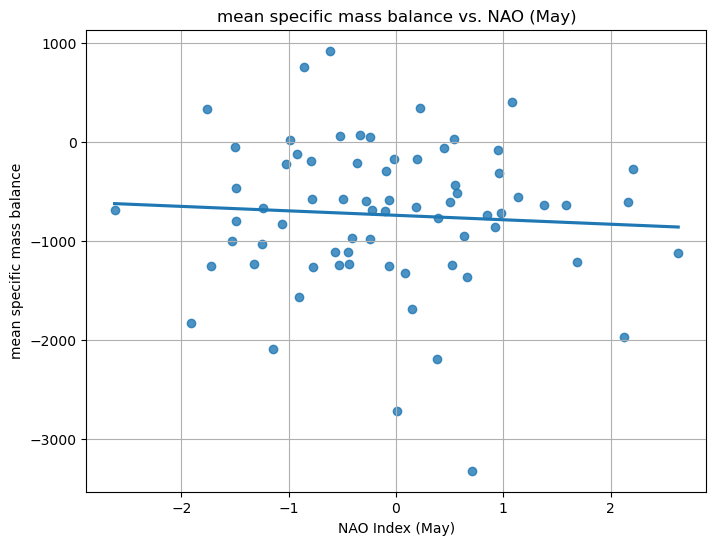

Correlation between mean specific mass balance and NAO (May): -0.065


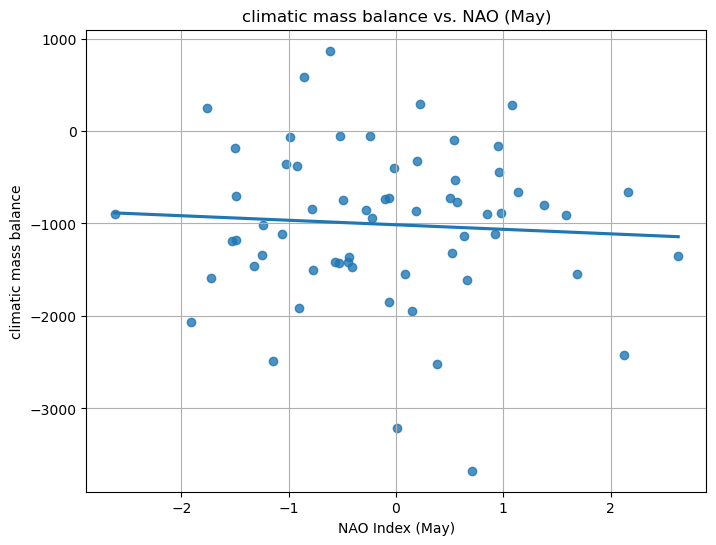

Correlation between climatic mass balance and NAO (May): -0.063


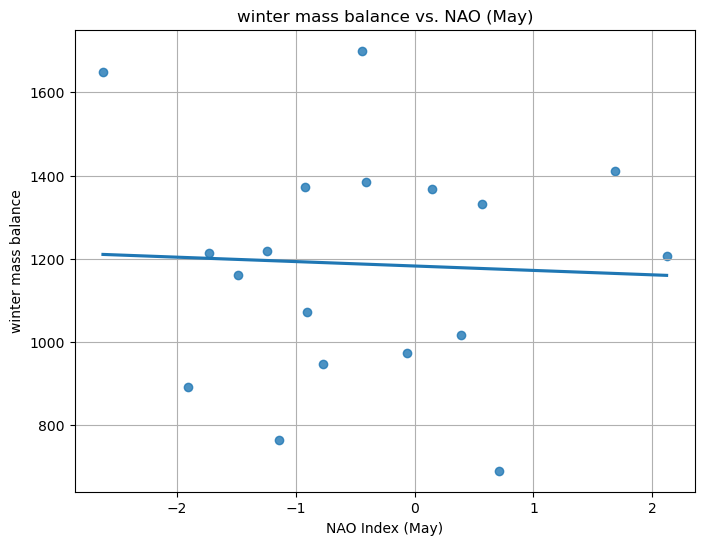

Correlation between winter mass balance and NAO (May): -0.047


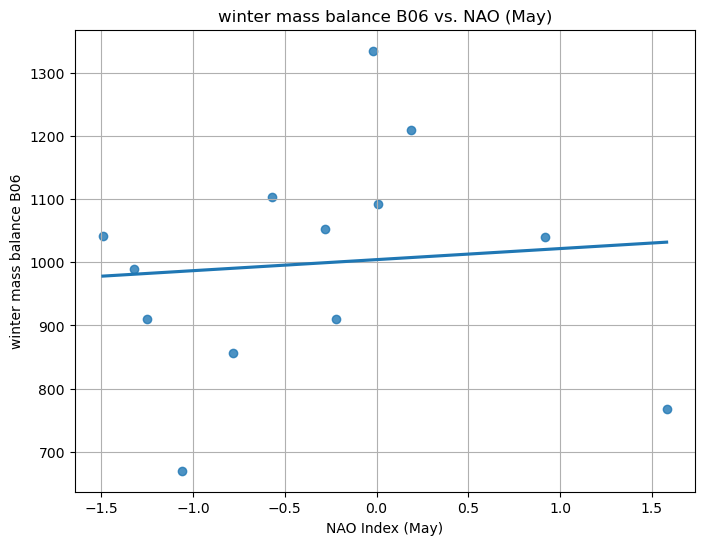

Correlation between winter mass balance B06 and NAO (May): 0.088


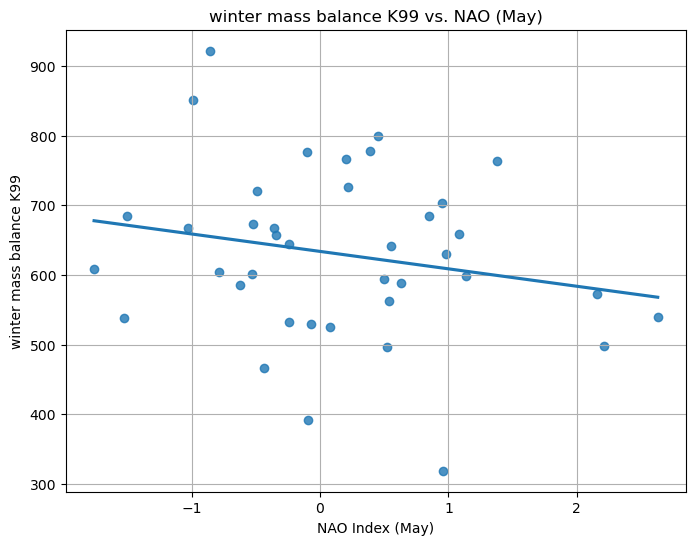

Correlation between winter mass balance K99 and NAO (May): -0.207


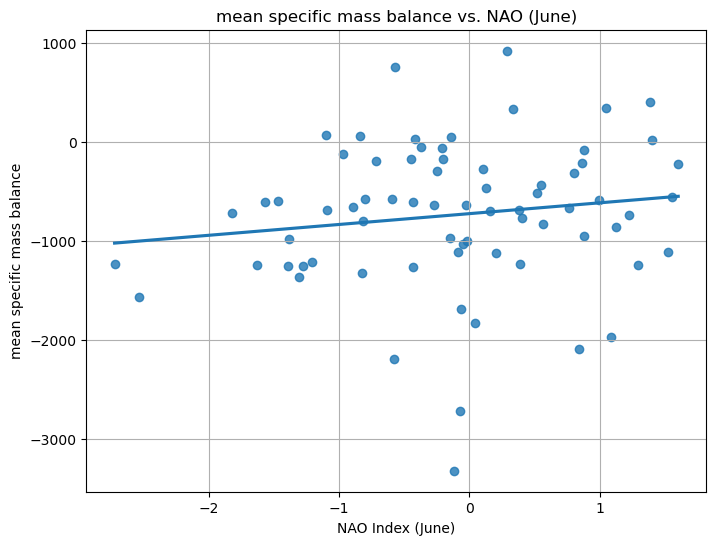

Correlation between mean specific mass balance and NAO (June): 0.144


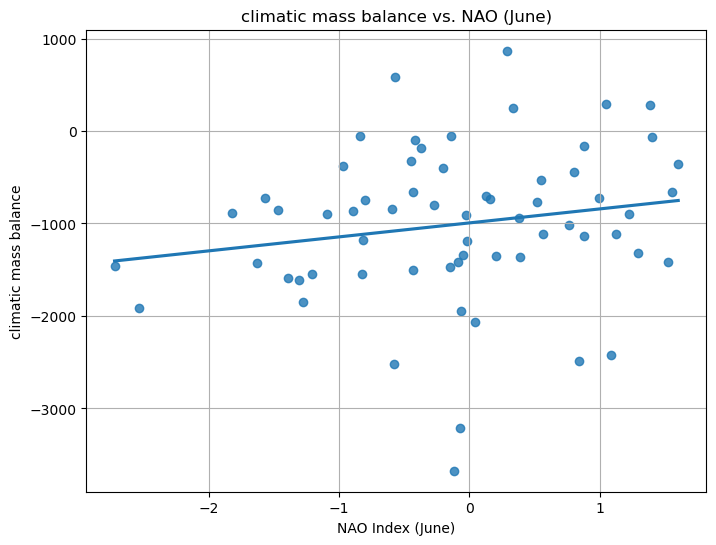

Correlation between climatic mass balance and NAO (June): 0.180


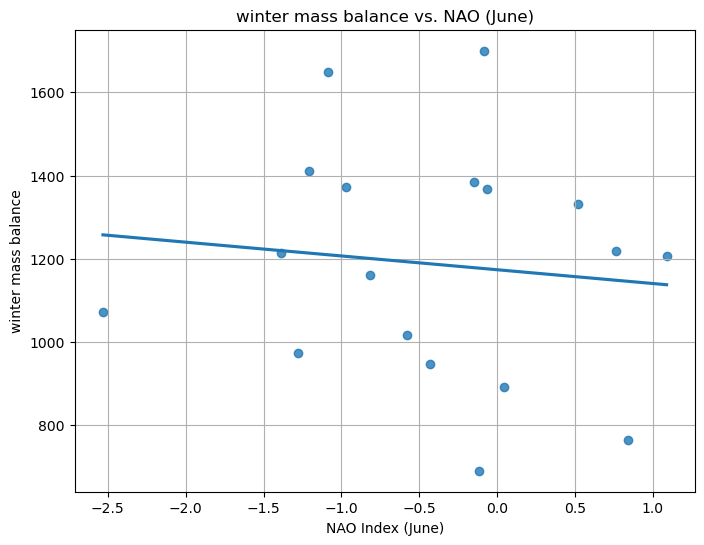

Correlation between winter mass balance and NAO (June): -0.110


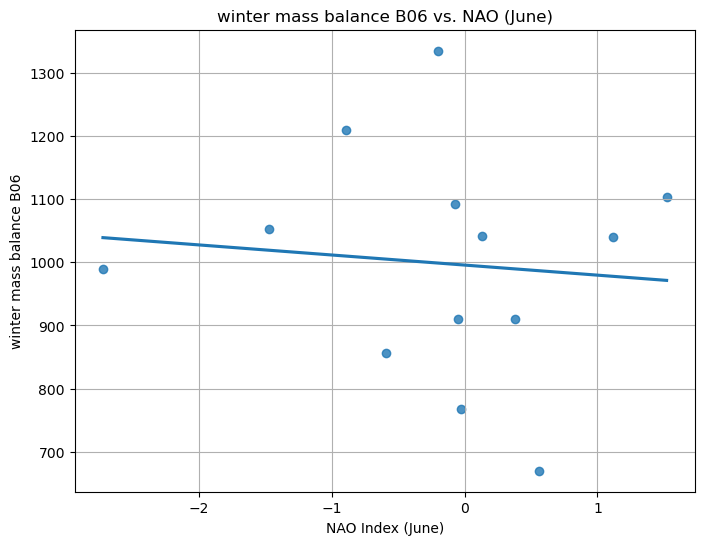

Correlation between winter mass balance B06 and NAO (June): -0.098


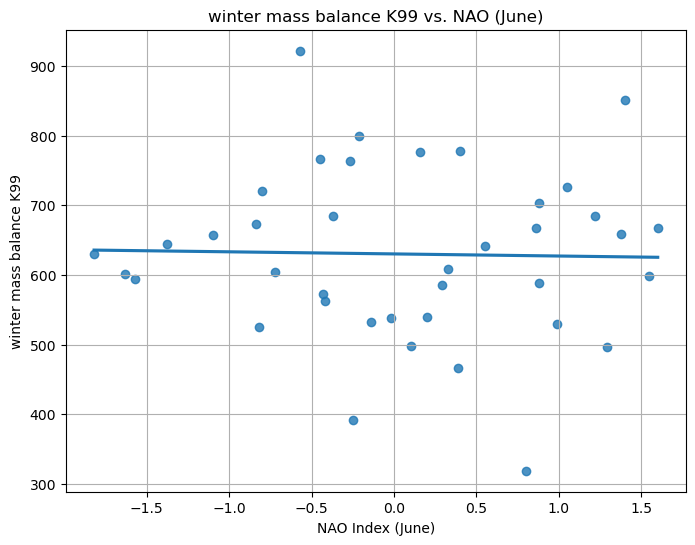

Correlation between winter mass balance K99 and NAO (June): -0.023


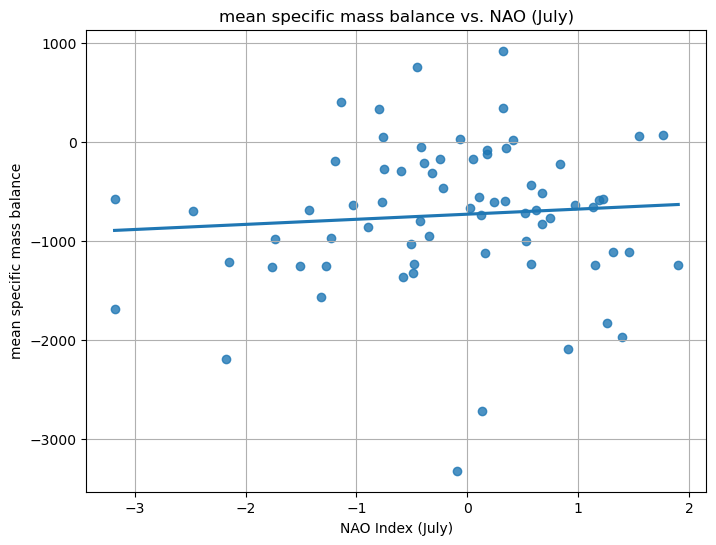

Correlation between mean specific mass balance and NAO (July): 0.078


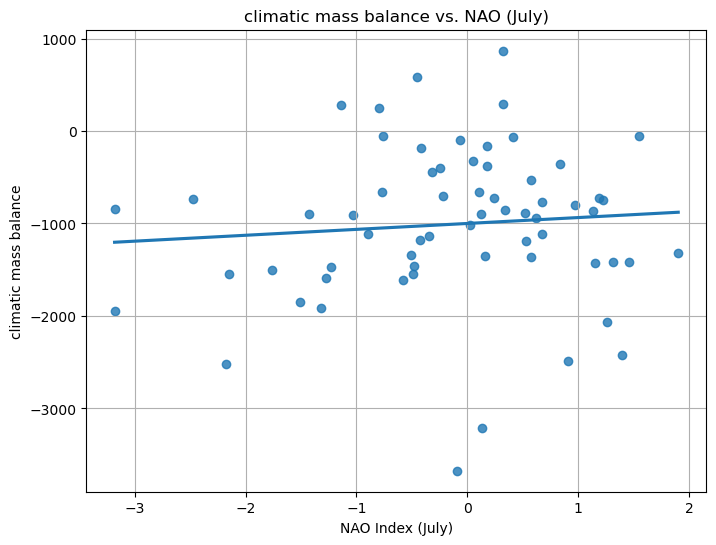

Correlation between climatic mass balance and NAO (July): 0.085


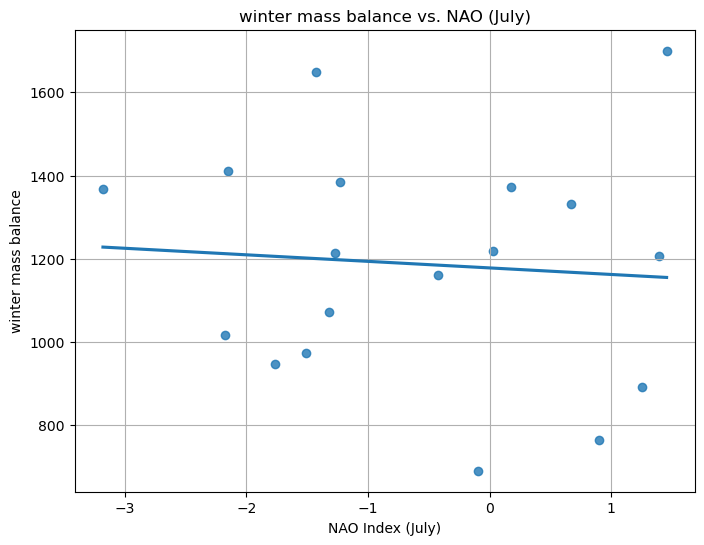

Correlation between winter mass balance and NAO (July): -0.078


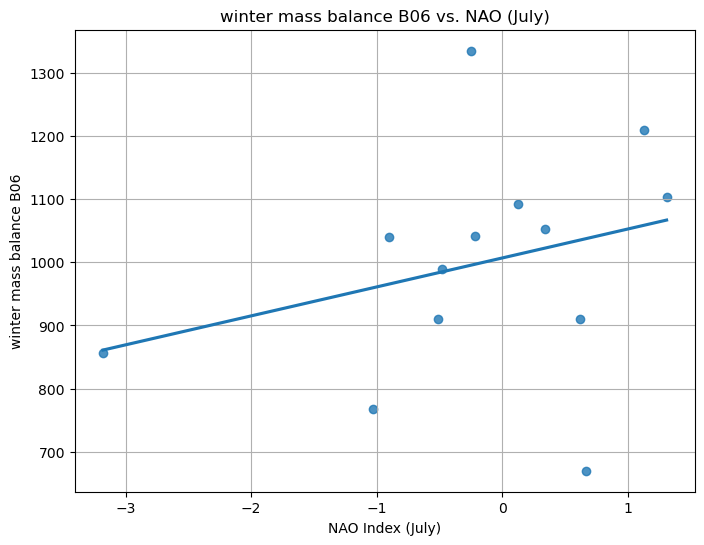

Correlation between winter mass balance B06 and NAO (July): 0.298


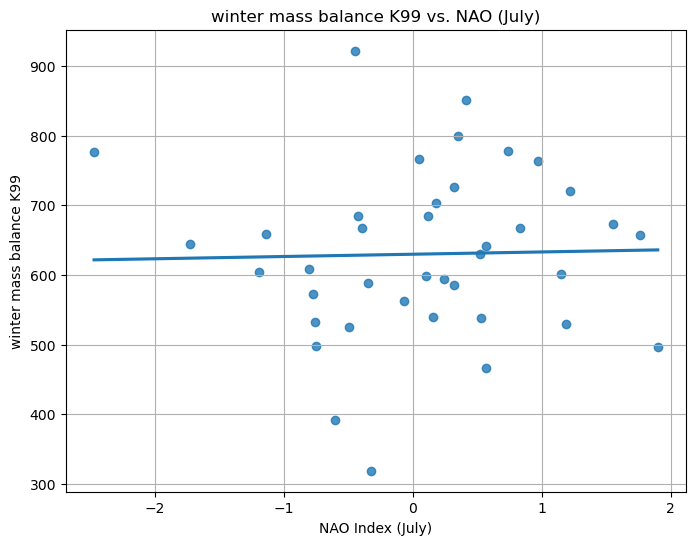

Correlation between winter mass balance K99 and NAO (July): 0.025


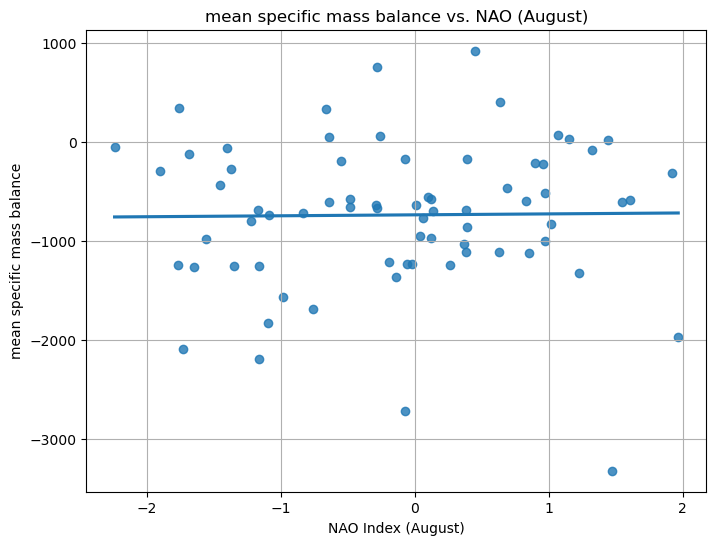

Correlation between mean specific mass balance and NAO (August): 0.013


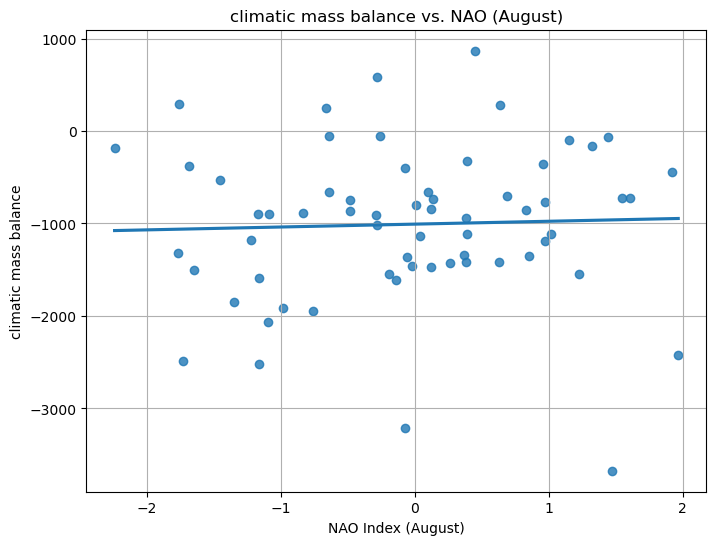

Correlation between climatic mass balance and NAO (August): 0.038


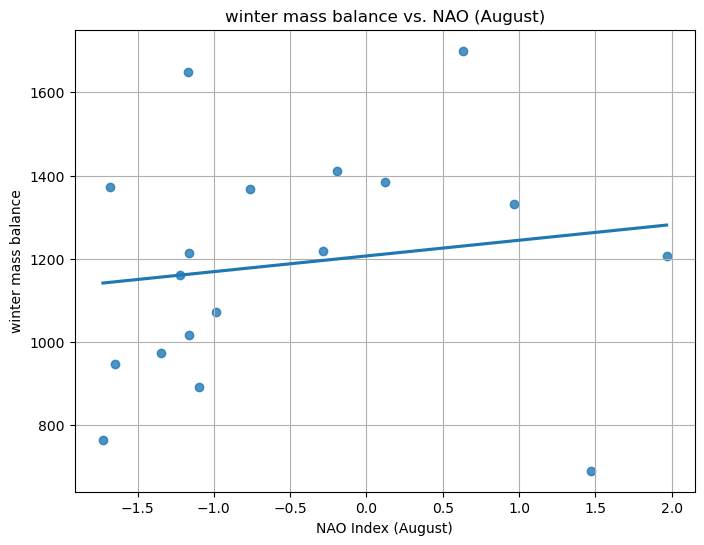

Correlation between winter mass balance and NAO (August): 0.152


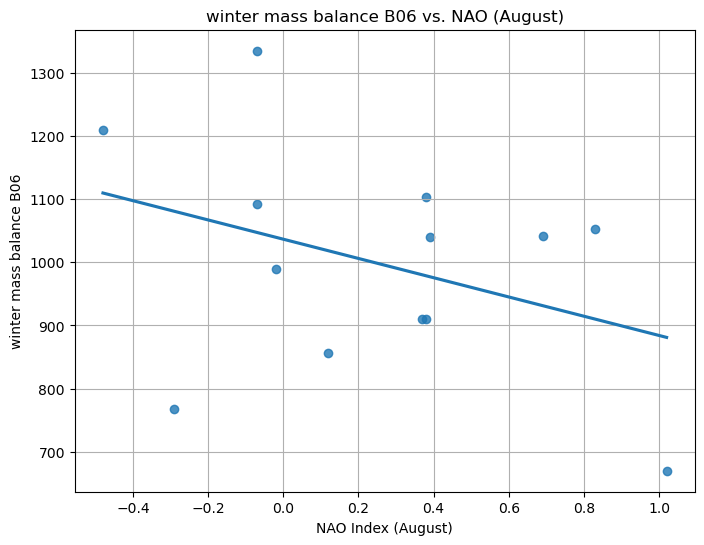

Correlation between winter mass balance B06 and NAO (August): -0.375


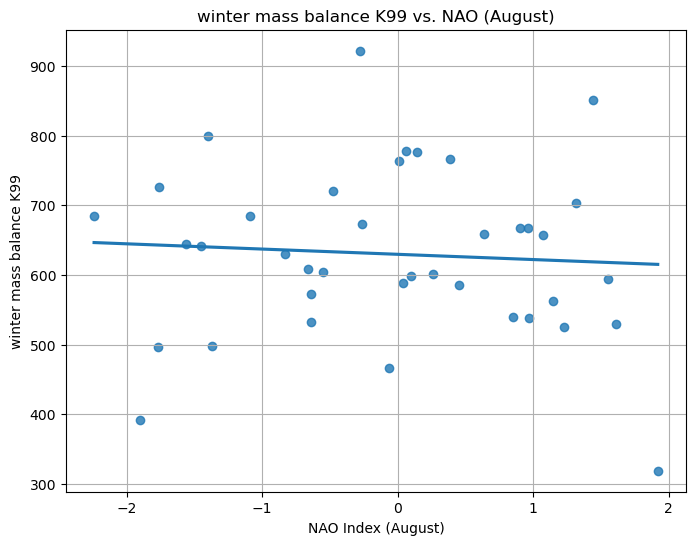

Correlation between winter mass balance K99 and NAO (August): -0.070


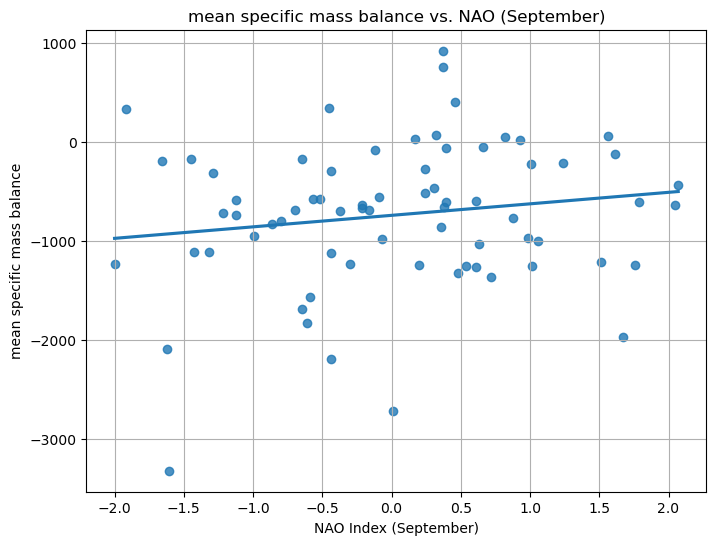

Correlation between mean specific mass balance and NAO (September): 0.157


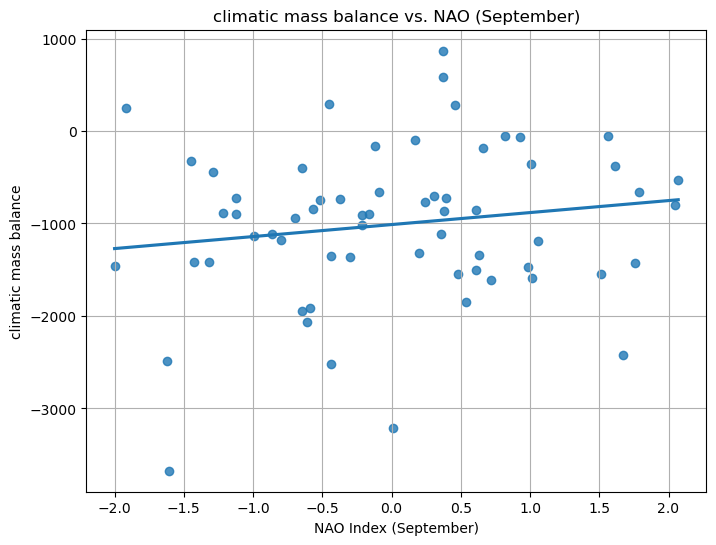

Correlation between climatic mass balance and NAO (September): 0.158


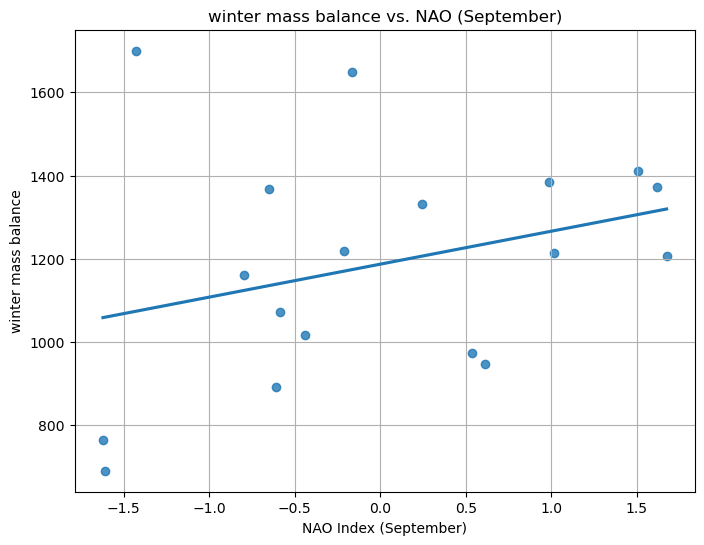

Correlation between winter mass balance and NAO (September): 0.307


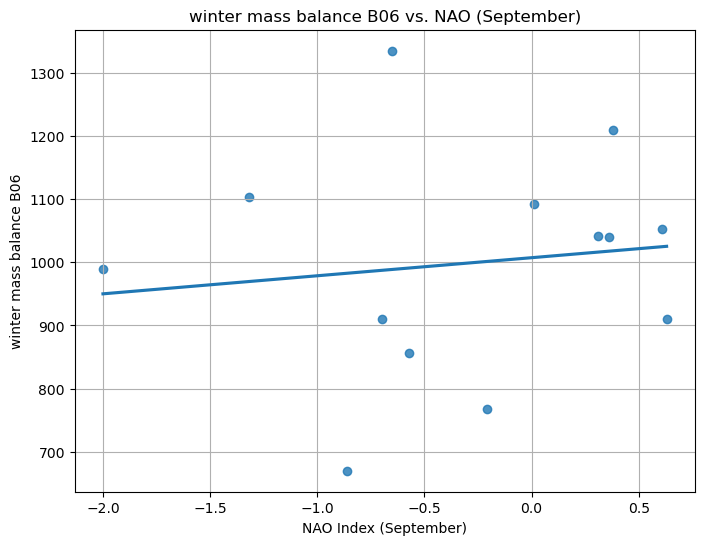

Correlation between winter mass balance B06 and NAO (September): 0.128


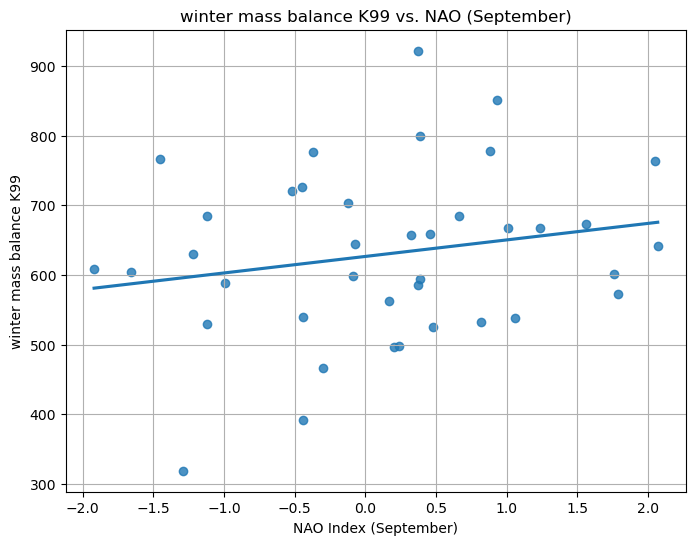

Correlation between winter mass balance K99 and NAO (September): 0.202


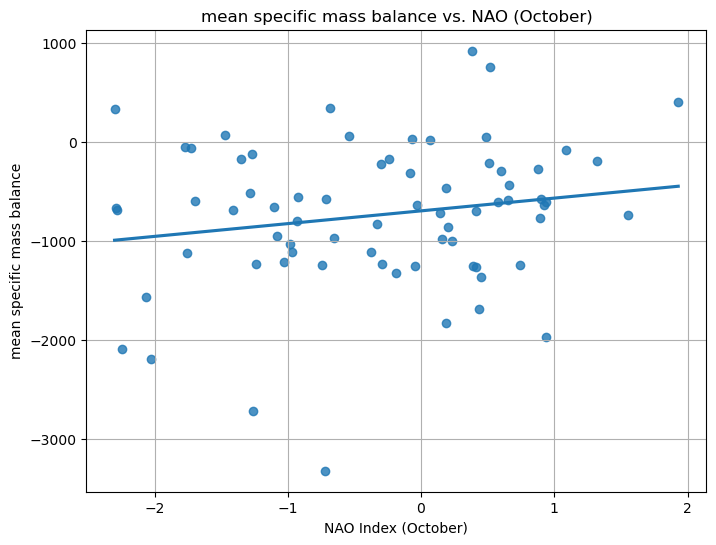

Correlation between mean specific mass balance and NAO (October): 0.180


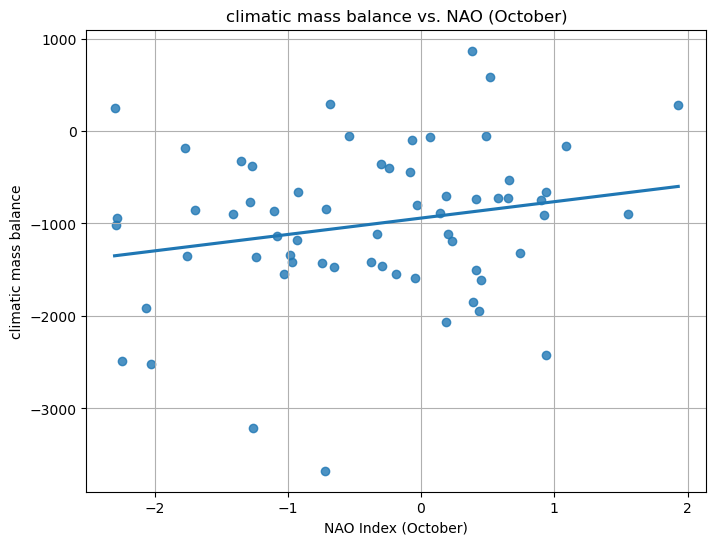

Correlation between climatic mass balance and NAO (October): 0.214


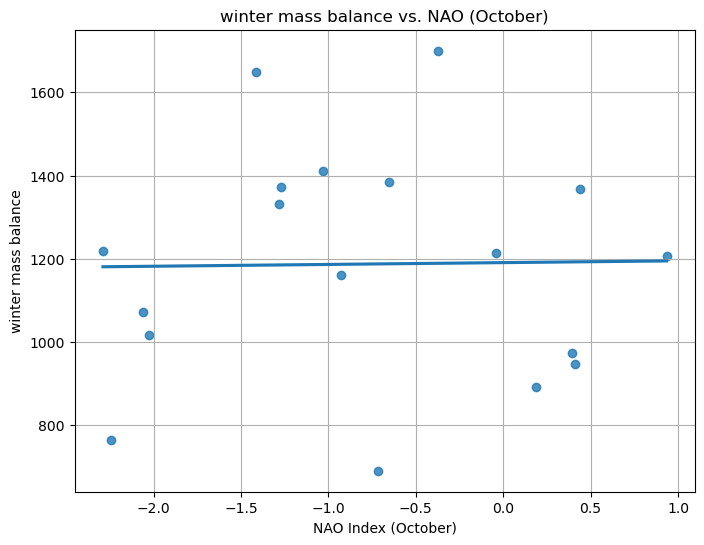

Correlation between winter mass balance and NAO (October): 0.016


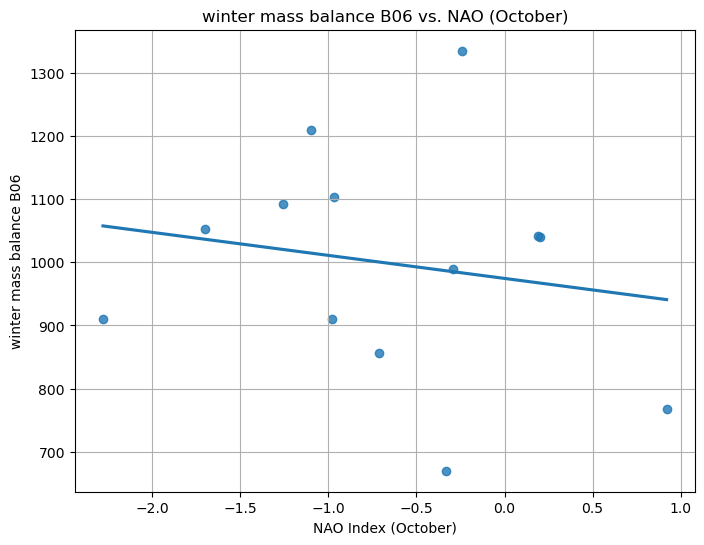

Correlation between winter mass balance B06 and NAO (October): -0.176


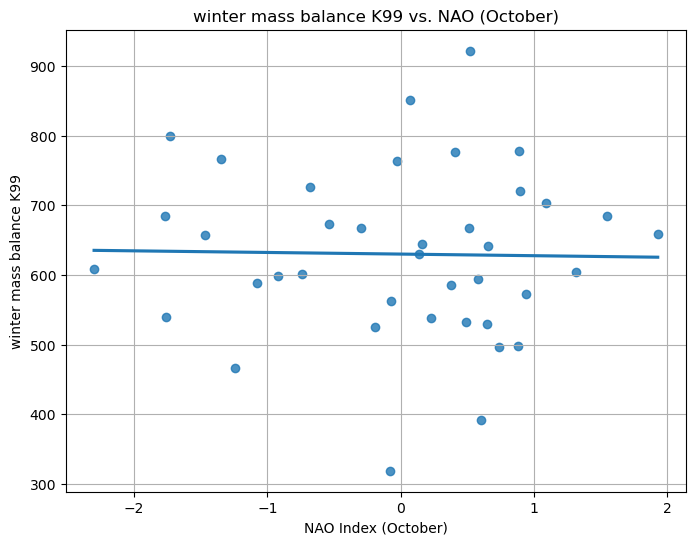

Correlation between winter mass balance K99 and NAO (October): -0.019


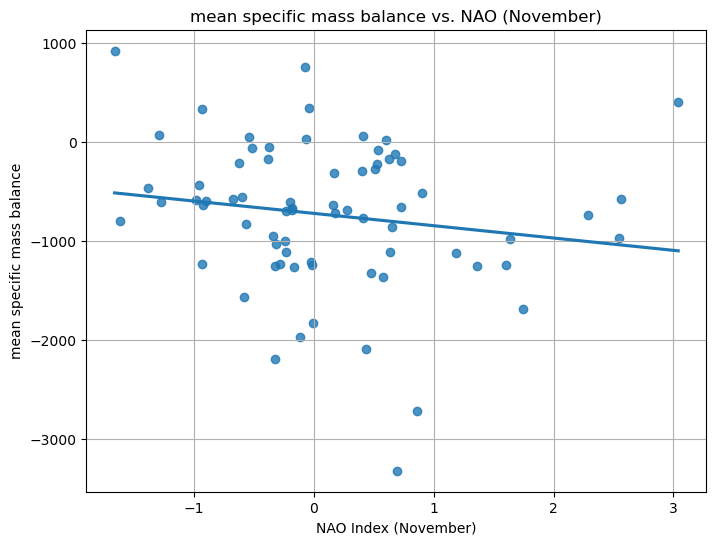

Correlation between mean specific mass balance and NAO (November): -0.162


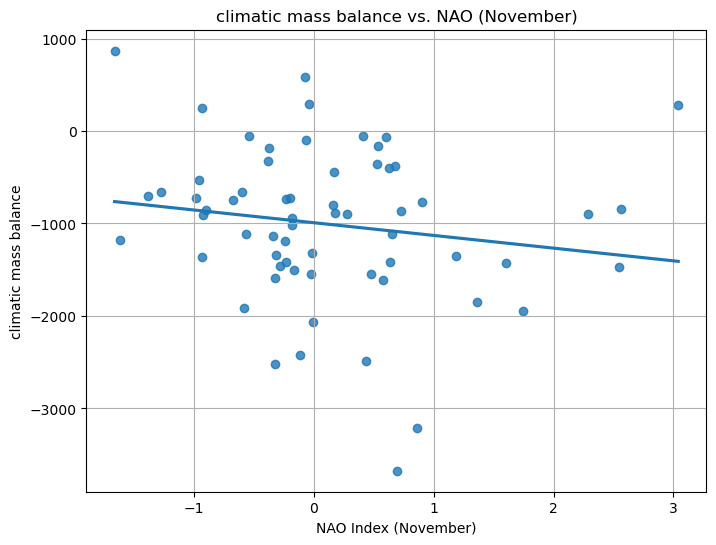

Correlation between climatic mass balance and NAO (November): -0.159


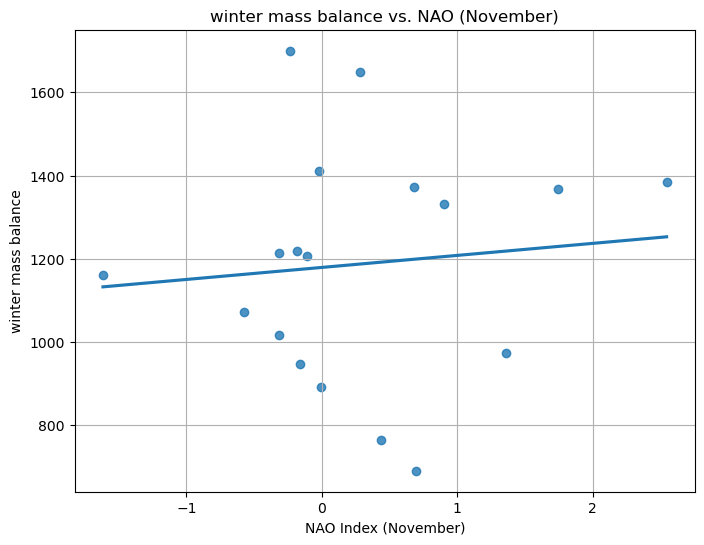

Correlation between winter mass balance and NAO (November): 0.098


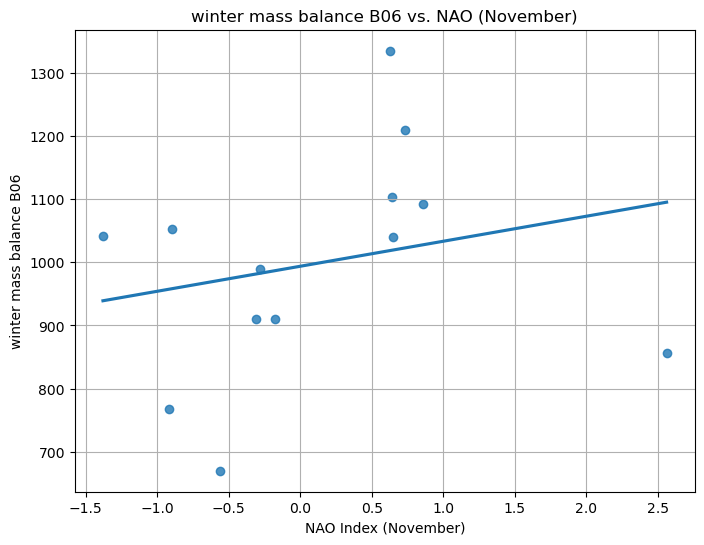

Correlation between winter mass balance B06 and NAO (November): 0.231


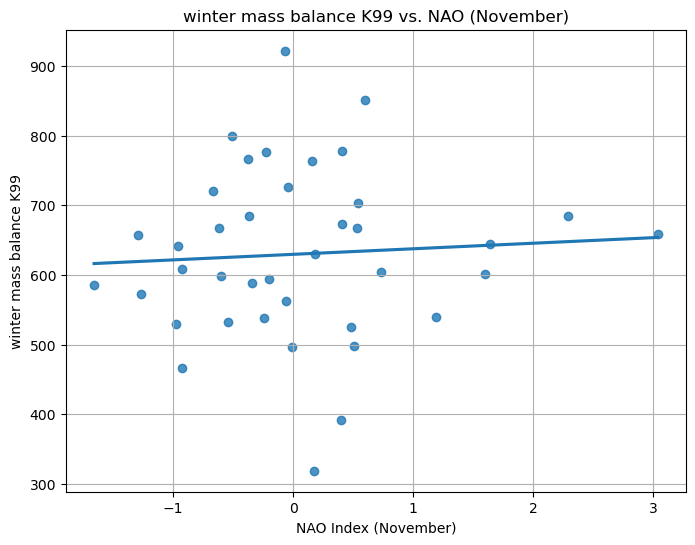

Correlation between winter mass balance K99 and NAO (November): 0.064


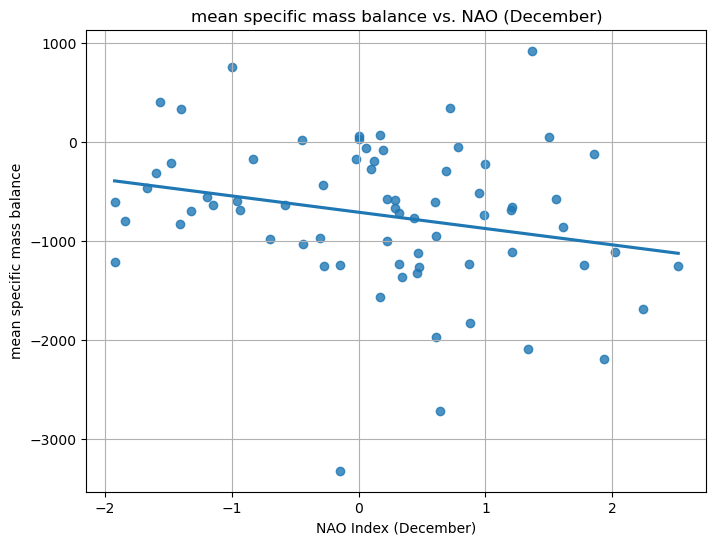

Correlation between mean specific mass balance and NAO (December): -0.242


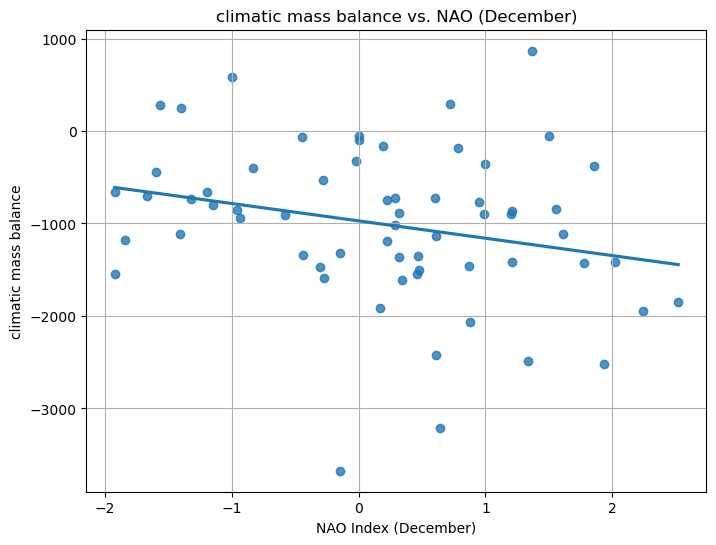

Correlation between climatic mass balance and NAO (December): -0.251


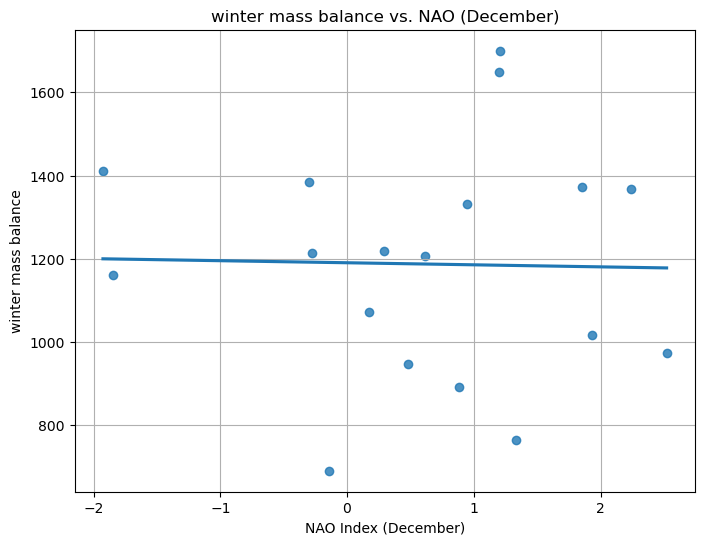

Correlation between winter mass balance and NAO (December): -0.022


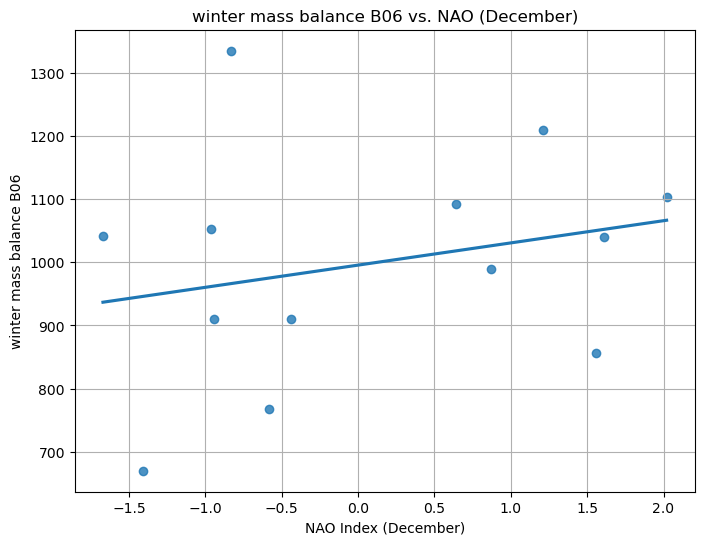

Correlation between winter mass balance B06 and NAO (December): 0.251


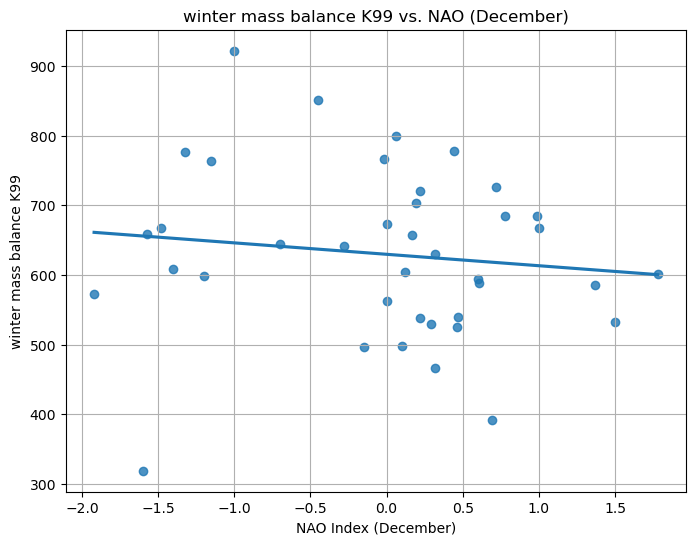

Correlation between winter mass balance K99 and NAO (December): -0.124


In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load NAO index data from text file
nao_file = "/home/pcuser/hef/norm.nao.monthly.b5001.current.ascii.txt"
df_nao = pd.read_csv(nao_file, delim_whitespace=True, header=None, names=["calendar_year", "month", "NAO_index"])

# Read in mass balance data
df_hef_MB = pd.read_pickle("hef_MB.pkl")

# Iterate through months and create plots
for month in range(1, 13):  # Loop from January (1) to December (12)
    # Filter NAO index for the given month
    df_nao_month = df_nao[df_nao["month"] == month].drop(columns=["month"])

    # Merge NAO data with mass balance data
    df_merged = pd.merge(df_hef_MB, df_nao_month, on="calendar_year", how="inner")

    # Define mass balance variables to compare
    mass_balance_vars = [
        "mean specific mass balance",
        "climatic mass balance",
        "winter mass balance",
        "winter mass balance B06",
        "winter mass balance K99"
    ]

    # Create scatter plots for each mass balance variable
    for var in mass_balance_vars:
        plt.figure(figsize=(8, 6))
        sns.regplot(x=df_merged["NAO_index"], y=df_merged[var], ci=None)
        plt.xlabel(f"NAO Index ({pd.to_datetime(month, format='%m').strftime('%B')})")
        plt.ylabel(var)
        plt.title(f"{var} vs. NAO ({pd.to_datetime(month, format='%m').strftime('%B')})")
        plt.grid(True)
        plt.show()

        # Calculate correlation coefficient
        correlation = df_merged["NAO_index"].corr(df_merged[var])
        print(f"Correlation between {var} and NAO ({pd.to_datetime(month, format='%m').strftime('%B')}): {correlation:.3f}")


/tmp/ipykernel_1777/3692465809.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  nao_df = pd.read_csv('norm.nao.monthly.b5001.current.ascii.txt', delim_whitespace=True, header=None, names=['Year', 'Month', 'NAO'])


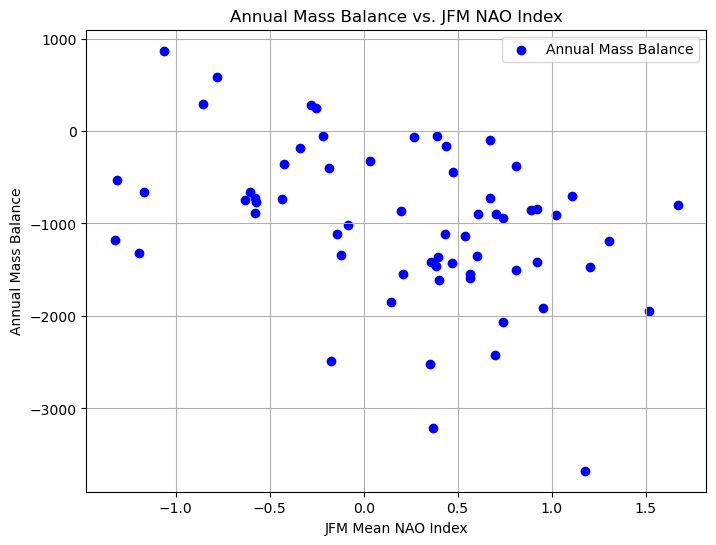

Correlation between climatic mass balance and NAO: -0.4071344919673479


In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the NAO data from the .txt file
nao_df = pd.read_csv('norm.nao.monthly.b5001.current.ascii.txt', delim_whitespace=True, header=None, names=['Year', 'Month', 'NAO'])

# Step 2: Filter for JFM (January, February, March) months
nao_jfm = nao_df[nao_df['Month'].isin([1, 2, 3])]

# Step 3: Calculate the mean NAO index for JFM by year
nao_jfm_mean = nao_jfm.groupby('Year')['NAO'].mean().reset_index()
nao_jfm_mean = nao_jfm_mean.rename(columns={'NAO': 'NAO_JFM'})

# Step 4: Load the mass balance data (assuming it's already in df_hef_MB)
df_hef_MB = pd.read_pickle("hef_MB.pkl")  # Assuming this DataFrame is already available

# Step 5: Merge the NAO JFM data with mass balance data using 'calendar_year'
df_merged = pd.merge(df_hef_MB, nao_jfm_mean, left_on='calendar_year', right_on='Year', how='inner')

# Step 6: Plot the JFM NAO against the mass balances

# Plot against the annual mass balance
plt.figure(figsize=(8, 6))
plt.scatter(df_merged['NAO_JFM'], df_merged['climatic mass balance'], label='Annual Mass Balance', color='b')
plt.xlabel('JFM Mean NAO Index')
plt.ylabel('Annual Mass Balance')
plt.title('Annual Mass Balance vs. JFM NAO Index')
plt.grid(True)
plt.legend()
plt.show()

correlation = df_merged['NAO_JFM'].corr(df_merged['climatic mass balance'])
print(f"Correlation between climatic mass balance and NAO: {correlation:}")
# You can also create similar plots for other winter mass balances if available


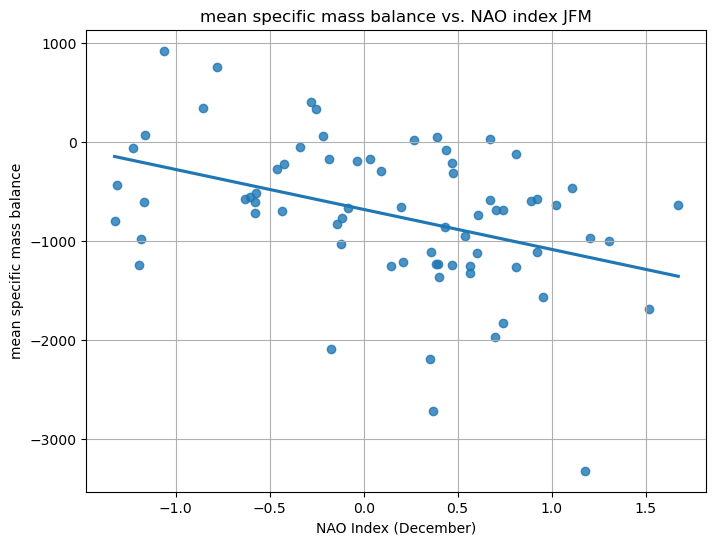

Correlation between mean specific mass balance and NAO JFM: -0.402


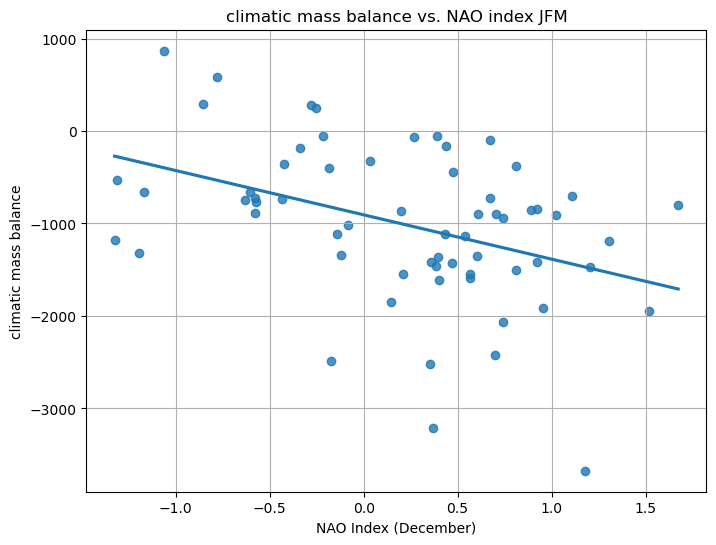

Correlation between climatic mass balance and NAO JFM: -0.407


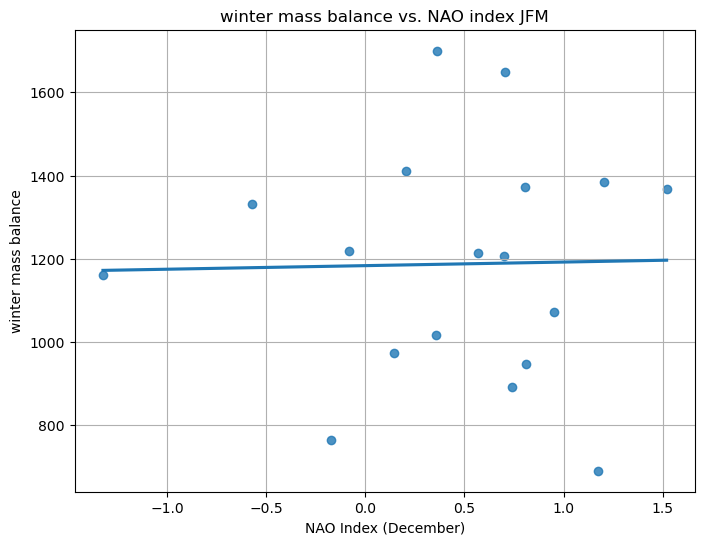

Correlation between winter mass balance and NAO JFM: 0.021


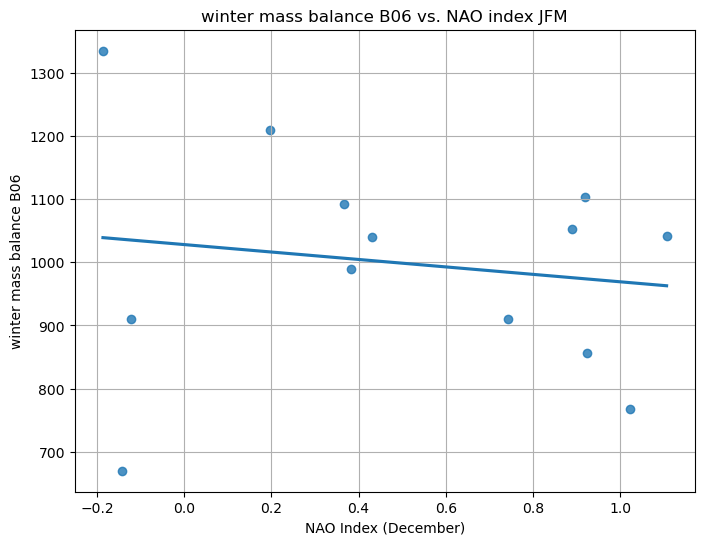

Correlation between winter mass balance B06 and NAO JFM: -0.154


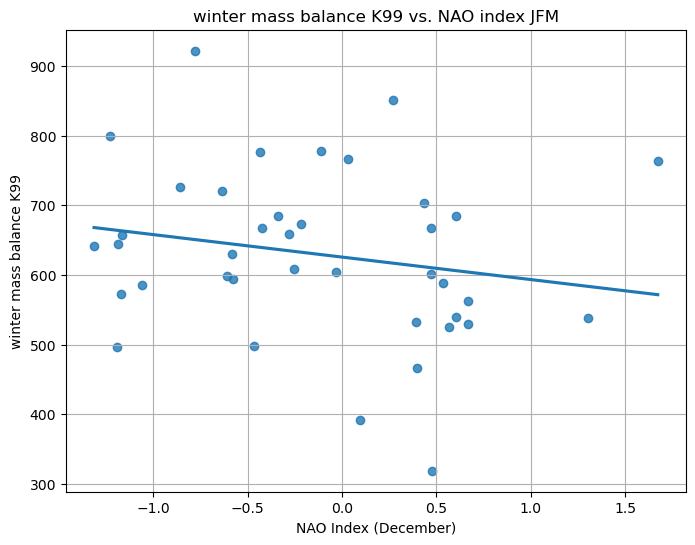

Correlation between winter mass balance K99 and NAO JFM: -0.198


In [87]:
# Define mass balance variables to compare
mass_balance_vars = [
    "mean specific mass balance",
    "climatic mass balance",
    "winter mass balance",
    "winter mass balance B06",
    "winter mass balance K99"
]

# Create scatter plots for each mass balance variable
for var in mass_balance_vars:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=df_merged["NAO_JFM"], y=df_merged[var], ci=None)
    plt.xlabel(f"NAO Index ({pd.to_datetime(month, format='%m').strftime('%B')})")
    plt.ylabel(var)
    plt.title(f"{var} vs. NAO index JFM")
    plt.grid(True)
    plt.show()

    # Calculate correlation coefficient
    correlation = df_merged["NAO_JFM"].corr(df_merged[var])
    print(f"Correlation between {var} and NAO JFM: {correlation:.3f}")